In [108]:
!pip install geopandas
# Import external libraries used:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import warnings

# Constants
MONTHS_PER_YEAR = 12
UN_AFFORDABILITY_TARGET = 0.02

# file names for the fixed broadband dataset
fh_gniFixedData = "ITU_fixed-broadband-internet-basket (2017-2023).csv"
fh_gniFixedAfrica = "ITU_fixed-broadband-Africa (2022).csv"
fh_gniFixedArabStates = "ITU_fixed-broadband-ArabStates (2022).csv"
fh_gniFixedAsiaPac = "ITU_fixed-broadband-AsiaPac (2022).csv"
fh_gniFixedEurasia = "ITU_fixed-broadband-Eurasia (2022).csv"
fh_gniFixedEurope = "ITU_fixed-broadband-Europe (2022).csv"
fh_gniFixedAmericas = "ITU_fixed-broadband-Americas (2022).csv"

# file names for the mobile broadband dataset
fh_gniMobileData = "ITU_mobile-broadband-basket (2017-2023).csv"
fh_gniMobileAfrica = "ITU_mobile-broadband-Africa (2022).csv"
fh_gniMobileArabStates = "ITU_mobile-broadband-ArabStates (2022).csv"
fh_gniMobileAsiaPac = "ITU_mobile-broadband-AsiaPac (2022).csv"
fh_gniMobileEurasia = "ITU_mobile-broadband-Eurasia (2022).csv"
fh_gniMobileEurope = "ITU_mobile-broadband-Europe (2022).csv"
fh_gniMobileAmericas = "ITU_mobile-broadband-Americas (2022).csv"

# file names for the Internet Users dataset
fh_worldInternetUsers = "ITU_internet-users-global (2017-2023).csv"

# file names for data used in ARPU calculations
fh_worldBankGNI = "WB-GNI-per-capita.csv"
fh_worldPopulation = "UN_population-data (2022).csv"

# ignore warning category exceptions
# Citation: https://docs.python.org/3/library/warnings.html
warnings.filterwarnings("ignore")

You should consider upgrading via the 'c:\users\nf312c\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Creating BarPlot of Broadband Internet Access data for Africa region


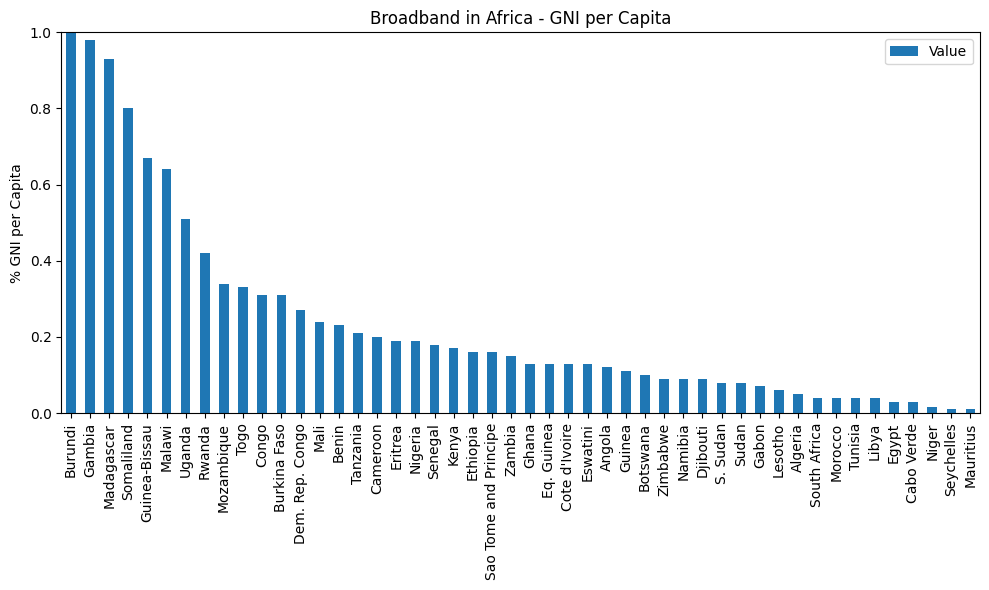

In [109]:
# load the internet access % based on per-capita GNI from the ITU Africa region dataset
# Note: ITU-T csv file uses unicode encoding
# Citation: https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.read_csv.html
df_gniFixedAfrica = pd.read_csv(fh_gniFixedAfrica, encoding="utf-8")


print("Creating BarPlot of Broadband Internet Access data for Africa region")
df_gniFixedAfrica = df_gniFixedAfrica.sort_values(by=["Value"], ascending=False)
ax = df_gniFixedAfrica.plot.bar(x="Economy", xlabel="", ylabel="% GNI per Capita", figsize=(10,6))
ax.set_ylim((0,1.0))
plt.title("Broadband in Africa - GNI per Capita")
plt.tight_layout()

Creating BarPlot of Broadband Internet Access data for Arab State region


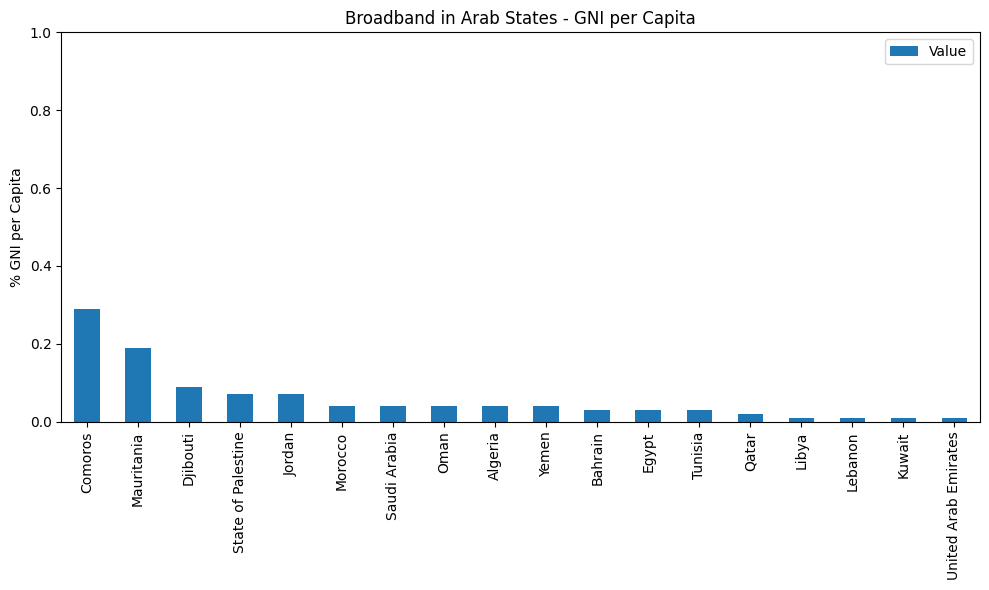

In [110]:
# load the internet access % based on per-capita GNI from the ITU Arab States region dataset
# Note: ITU-T csv file uses unicode encoding
# Citation: https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.read_csv.html
try:
    df_gniFixedArabStates = pd.read_csv(fh_gniFixedArabStates, encoding="utf-8")
except:
    print("\nUnable to load data from file: ", fh_gniFixedArabStates)

print("Creating BarPlot of Broadband Internet Access data for Arab State region")
df_gniFixedArabStates = df_gniFixedArabStates.sort_values(by=["Value"], ascending=False)
ax = df_gniFixedArabStates.plot.bar(x="Economy", xlabel="", ylabel="% GNI per Capita", figsize=(10,6))
ax.set_ylim((0,1.0))
plt.title("Broadband in Arab States - GNI per Capita")
plt.tight_layout()

Creating BarPlot of Broadband Internet Access data for Asia Pacific region


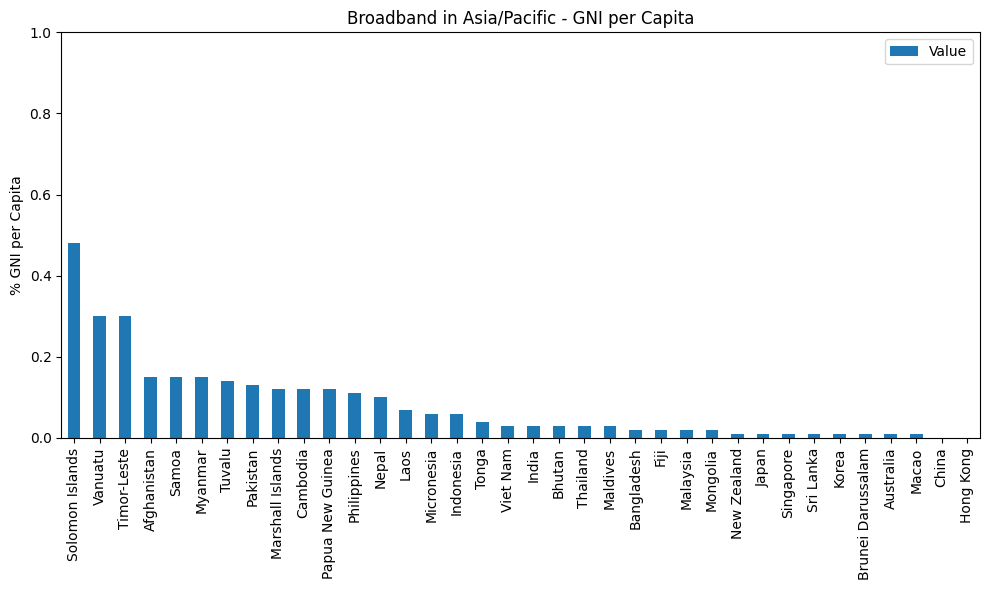

In [111]:
# load the internet access % based on per-capita GNI from the ITU Asia/Pacific region dataset
# Note: ITU-T csv file uses unicode encoding
# Citation: https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.read_csv.html
try:
    df_gniFixedAsiaPac = pd.read_csv(fh_gniFixedAsiaPac, encoding="utf-8")
except:
    print("\nUnable to load data from file: ", fh_gniFixedAsiaPac)

print("Creating BarPlot of Broadband Internet Access data for Asia Pacific region")
df_gniFixedAsiaPac = df_gniFixedAsiaPac.sort_values(by=["Value"], ascending=False)
ax = df_gniFixedAsiaPac.plot.bar(x="Economy", xlabel="", ylabel="% GNI per Capita", figsize=(10,6))
ax.set_ylim((0,1.0))
plt.title("Broadband in Asia/Pacific - GNI per Capita")
plt.tight_layout()

Creating BarPlot of Broadband Internet Access data for Eurasia region


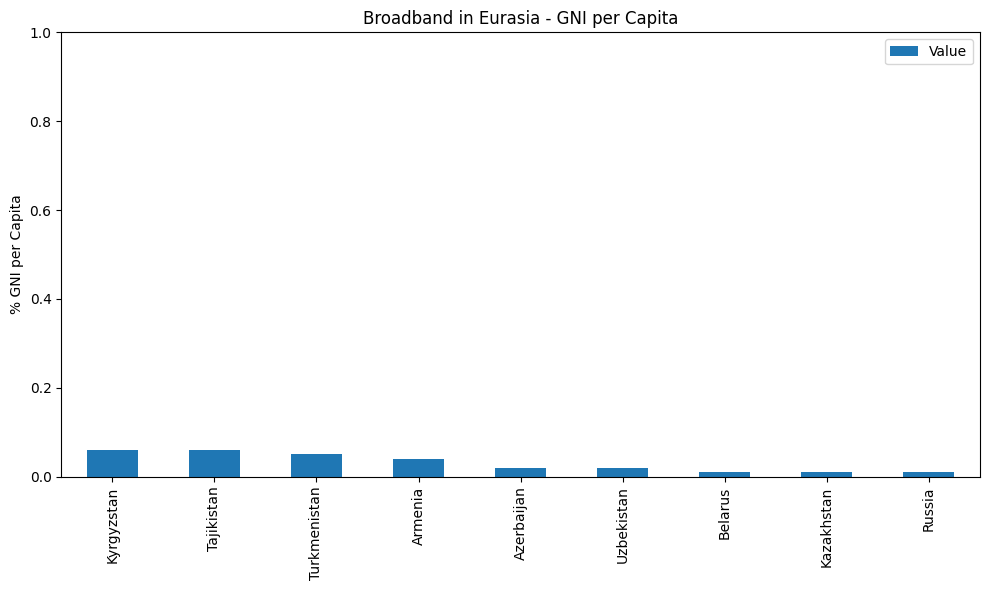

In [112]:
# load the internet access % based on per-capita GNI from the ITU Eurasia region dataset
# Note: ITU-T csv file uses unicode encoding
# Citation: https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.read_csv.html
try:
    df_gniFixedEurasia = pd.read_csv(fh_gniFixedEurasia, encoding="utf-8")
except:
    print("\nUnable to load data from file: ", fh_gniFixedEurasia)

print("Creating BarPlot of Broadband Internet Access data for Eurasia region")
df_gniFixedEurasia = df_gniFixedEurasia.sort_values(by=["Value"], ascending=False)
ax = df_gniFixedEurasia.plot.bar(x="Economy", xlabel="", ylabel="% GNI per Capita", figsize=(10,6))
ax.set_ylim((0,1.0))
plt.title("Broadband in Eurasia - GNI per Capita")
plt.tight_layout()

Creating BarPlot of Broadband Internet Access data for Europe region


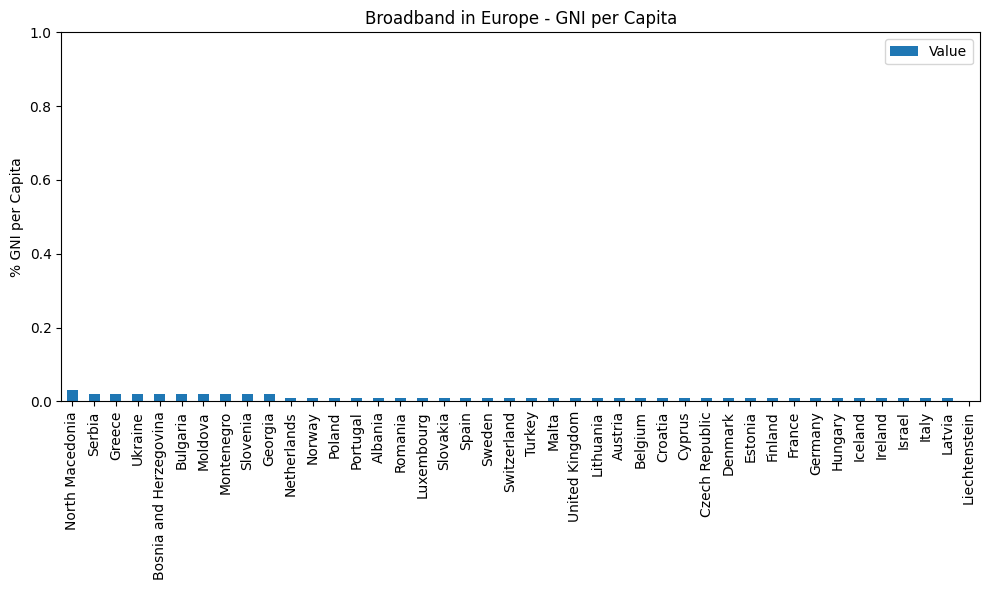

In [113]:
# load the internet access % based on per-capita GNI from the ITU Europe region dataset
# Note: ITU-T csv file uses unicode encoding
# Citation: https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.read_csv.html
try:
    df_gniFixedEurope = pd.read_csv(fh_gniFixedEurope, encoding="utf-8")
except:
    print("\nUnable to load data from file: ", fh_gniFixedEurope)

print("Creating BarPlot of Broadband Internet Access data for Europe region")
df_gniFixedEurope = df_gniFixedEurope.sort_values(by=["Value"], ascending=False)
ax = df_gniFixedEurope.plot.bar(x="Economy", xlabel="", ylabel="% GNI per Capita", figsize=(10,6))
ax.set_ylim((0,1.0))
plt.title("Broadband in Europe - GNI per Capita")
plt.tight_layout()

Creating BarPlot of Broadband Internet Access data for Americas region


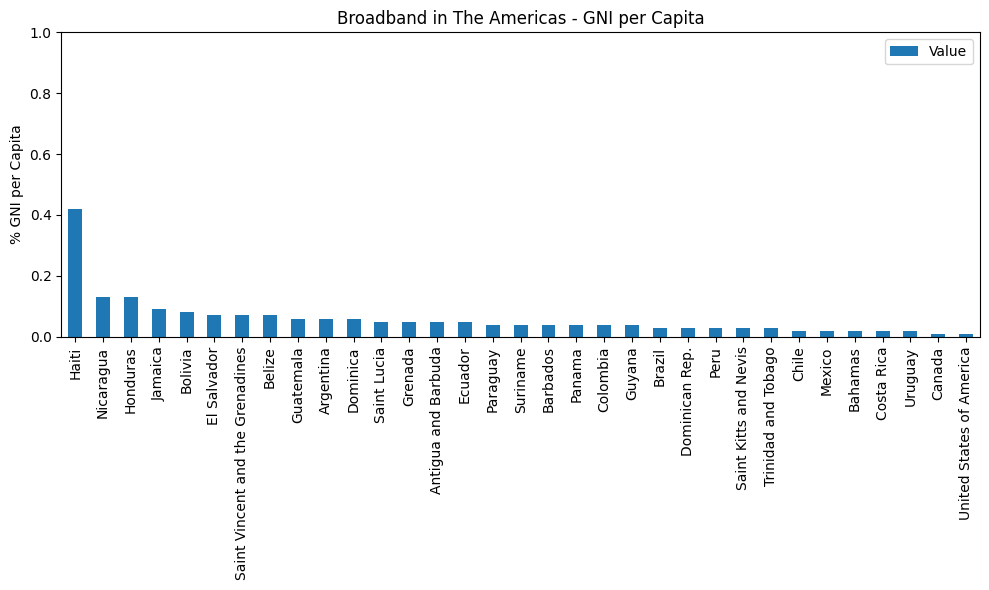

In [114]:
# load the internet access % based on per-capita GNI from the ITU Americas region dataset
# Note: ITU-T csv file uses unicode encoding
# Citation: https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.read_csv.html
try:
    df_gniFixedAmericas = pd.read_csv(fh_gniFixedAmericas, encoding="utf-8")
except:
    print("\nUnable to load data from file: ", fh_gniFixedAmericas)

print("Creating BarPlot of Broadband Internet Access data for Americas region")
df_gniFixedAmericas = df_gniFixedAmericas.sort_values(by=["Value"], ascending=False)
ax = df_gniFixedAmericas.plot.bar(x="Economy", xlabel="", ylabel="% GNI per Capita", figsize=(10,6))
ax.set_ylim((0,1.0))
plt.title("Broadband in The Americas - GNI per Capita")
plt.tight_layout()

Creating BarPlot of Mobile Broadband Internet Access data for Africa region


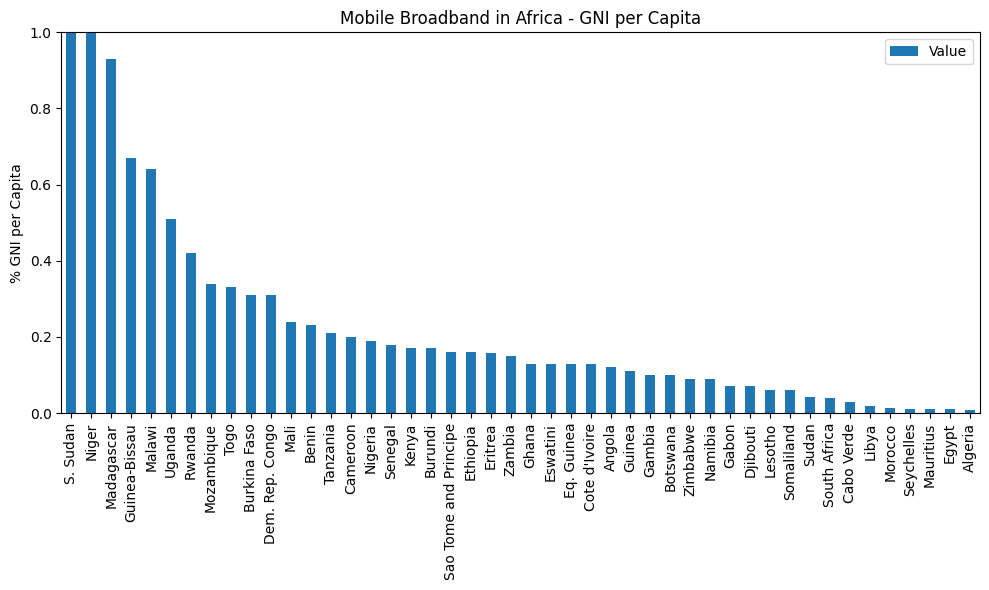

In [115]:
# load the mobile broadband % based on per-capita GNI from the ITU Africa region dataset
# Note: ITU-T csv file uses unicode encoding
# Citation: https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.read_csv.html
try:
    df_gniMobileAfrica = pd.read_csv(fh_gniMobileAfrica, encoding="utf-8")
except:
    print("\nUnable to load data from file: ", fh_gniMobileAfrica)

print("Creating BarPlot of Mobile Broadband Internet Access data for Africa region")
df_gniMobileAfrica = df_gniMobileAfrica.sort_values(by=["Value"], ascending=False)
ax = df_gniMobileAfrica.plot.bar(x="Economy", xlabel="", ylabel="% GNI per Capita", figsize=(10,6))
ax.set_ylim((0,1.0))
plt.title("Mobile Broadband in Africa - GNI per Capita")
plt.tight_layout()

Creating BarPlot of Mobile Broadband Internet Access data for Arab States region


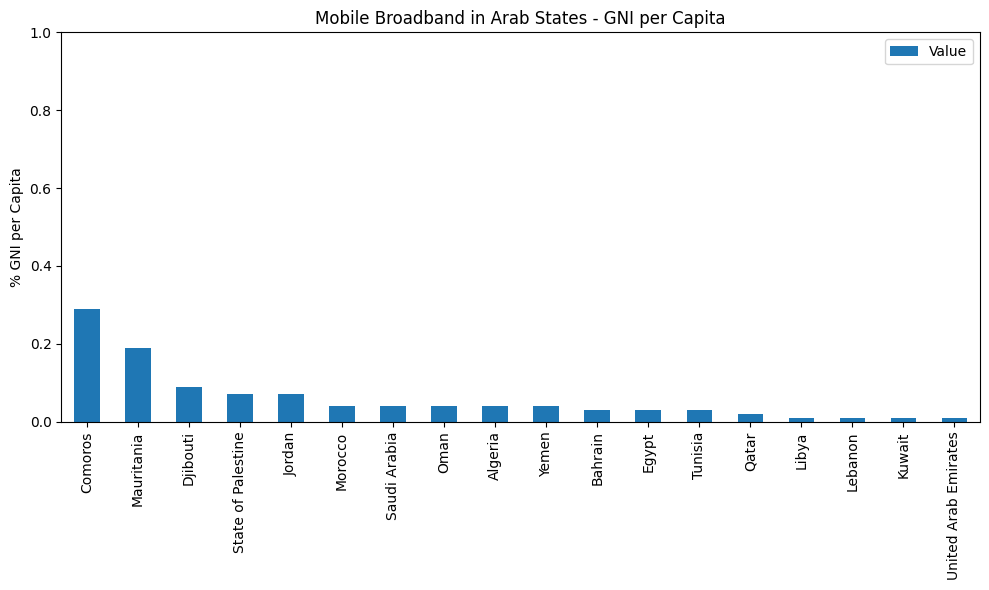

In [116]:
# load the mobile broadband % based on per-capita GNI from the ITU Arab States region dataset
# Note: ITU-T csv file uses unicode encoding
# Citation: https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.read_csv.html
try:
    df_gniMobileArabStates = pd.read_csv(fh_gniMobileArabStates, encoding="utf-8")
except:
    print("\nUnable to load data from file: ", fh_gniMobileArabStates)

print("Creating BarPlot of Mobile Broadband Internet Access data for Arab States region")
df_gniMobileArabStates = df_gniMobileArabStates.sort_values(by=["Value"], ascending=False)
ax = df_gniMobileArabStates.plot.bar(x="Economy", xlabel="", ylabel="% GNI per Capita", figsize=(10,6))
ax.set_ylim((0,1.0))
plt.title("Mobile Broadband in Arab States - GNI per Capita")
plt.tight_layout()

Creating BarPlot of Mobile Broadband Internet Access data for Asia Pacific region


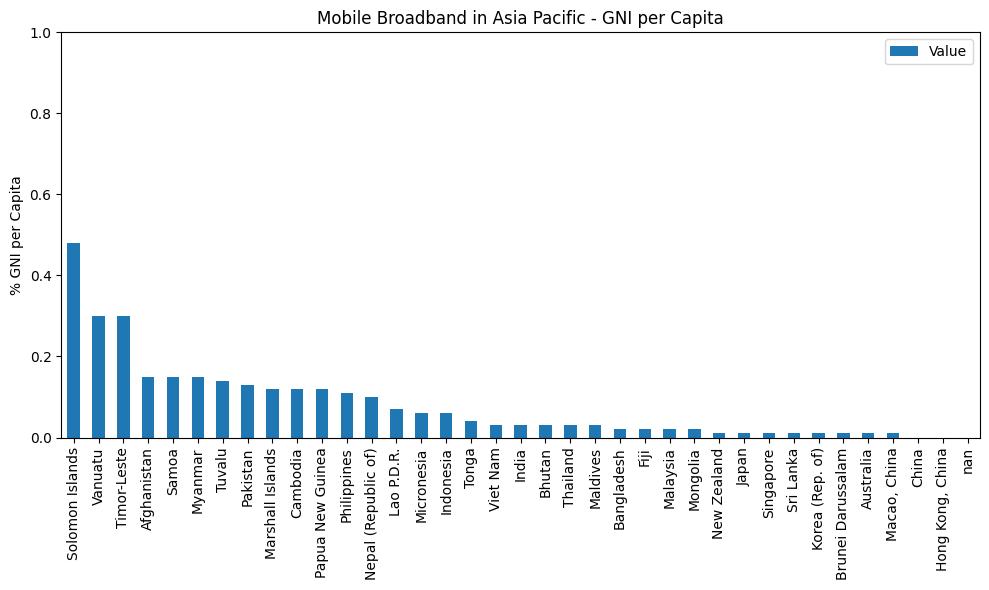

In [117]:
# load the mobile broadband % based on per-capita GNI from the ITU Asia/Pacific region dataset
# Note: ITU-T csv file uses unicode encoding
# Citation: https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.read_csv.html
try:
    df_gniMobileAsiaPac = pd.read_csv(fh_gniMobileAsiaPac, encoding="utf-8")
except:
    print("\nUnable to load data from file: ", fh_gniMobileAsiaPac)

print("Creating BarPlot of Mobile Broadband Internet Access data for Asia Pacific region")
df_gniMobileAsiaPac = df_gniMobileAsiaPac.sort_values(by=["Value"], ascending=False)
ax = df_gniMobileAsiaPac.plot.bar(x="Economy", xlabel="", ylabel="% GNI per Capita", figsize=(10,6))
ax.set_ylim((0,1.0))
plt.title("Mobile Broadband in Asia Pacific - GNI per Capita")
plt.tight_layout()

Creating BarPlot of Mobile Broadband Internet Access data for Eurasia region


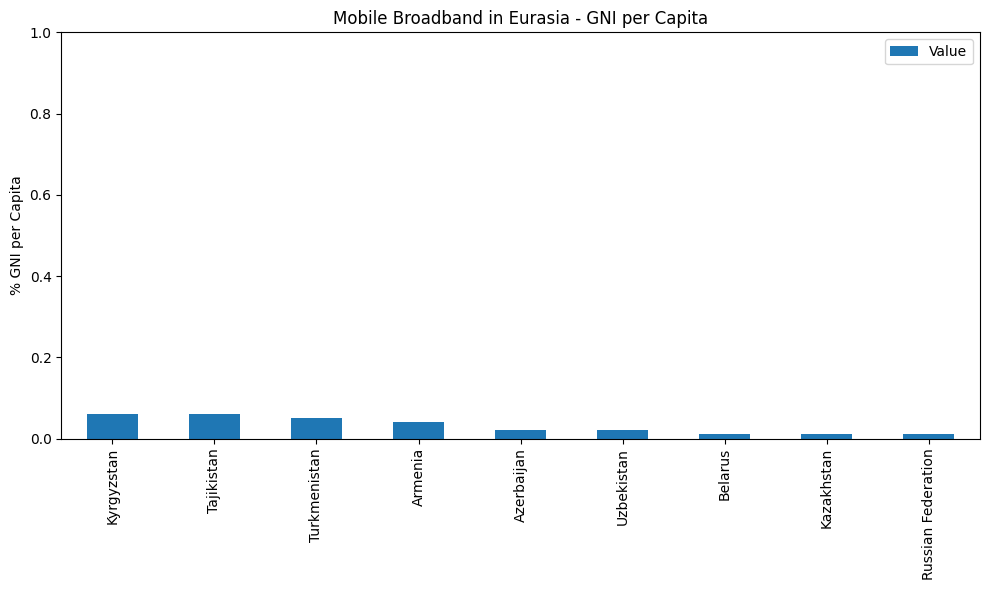

In [118]:
# load the mobile broadband % based on per-capita GNI from the ITU Eurasia region dataset
# Note: ITU-T csv file uses unicode encoding
# Citation: https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.read_csv.html
try:
    df_gniMobileEurasia = pd.read_csv(fh_gniMobileEurasia, encoding="utf-8")
except:
    print("\nUnable to load data from file: ", fh_gniMobileEurasia)

print("Creating BarPlot of Mobile Broadband Internet Access data for Eurasia region")
df_gniMobileEurasia = df_gniMobileEurasia.sort_values(by=["Value"], ascending=False)
ax = df_gniMobileEurasia.plot.bar(x="Economy", xlabel="", ylabel="% GNI per Capita", figsize=(10,6))
ax.set_ylim((0,1.0))
plt.title("Mobile Broadband in Eurasia - GNI per Capita")
plt.tight_layout()

Creating BarPlot of Mobile Broadband Internet Access data for Europe region


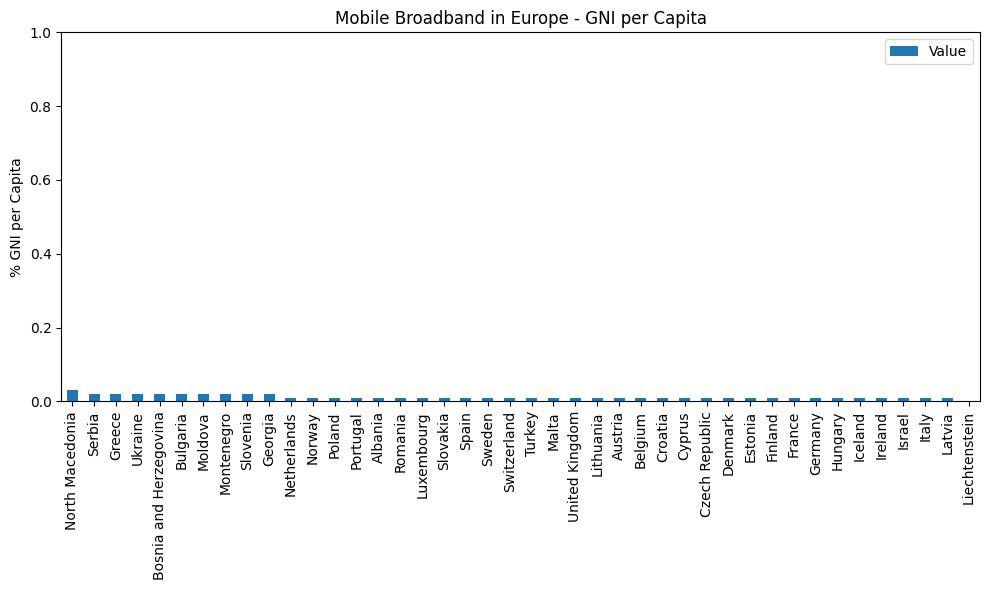

In [119]:
# load the mobile broadband % based on per-capita GNI from the ITU Europe region dataset
# Note: ITU-T csv file uses unicode encoding
# Citation: https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.read_csv.html
try:
    df_gniMobileEurope = pd.read_csv(fh_gniMobileEurope, encoding="utf-8")
except:
    print("\nUnable to load data from file: ", fh_gniMobileEurope)

print("Creating BarPlot of Mobile Broadband Internet Access data for Europe region")
df_gniMobileEurope = df_gniMobileEurope.sort_values(by=["Value"], ascending=False)
ax = df_gniMobileEurope.plot.bar(x="Economy", xlabel="", ylabel="% GNI per Capita", figsize=(10,6))
ax.set_ylim((0,1.0))
plt.title("Mobile Broadband in Europe - GNI per Capita")
plt.tight_layout()

Creating BarPlot of Mobile Broadband Internet Access data for Americas region


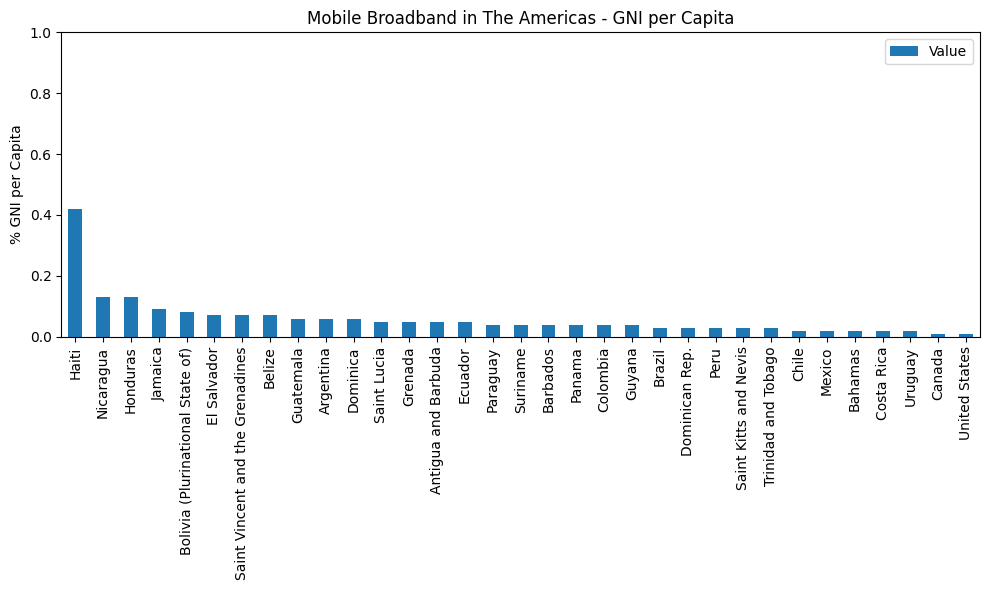

In [120]:
# load the mobile broadband % based on per-capita GNI from the ITU Americas region dataset
# Note: ITU-T csv file uses unicode encoding
# Citation: https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.read_csv.html
try:
    df_gniMobileAmericas = pd.read_csv(fh_gniMobileAmericas, encoding="utf-8")
except:
    print("\nUnable to load data from file: ", fh_gniMobileAmericas)

print("Creating BarPlot of Mobile Broadband Internet Access data for Americas region")
df_gniMobileAmericas = df_gniMobileAmericas.sort_values(by=["Value"], ascending=False)
ax = df_gniMobileAmericas.plot.bar(x="Economy", xlabel="", ylabel="% GNI per Capita", figsize=(10,6))
ax.set_ylim((0,1.0))
plt.title("Mobile Broadband in The Americas - GNI per Capita")
plt.tight_layout()

In [121]:
# load the Global Internet Users dataset from the ITU
try:
    df_rawInternetUsersGlobal = pd.read_csv(fh_worldInternetUsers, encoding="utf-8")
except:
    print("\nUnable to load data from file: ", fh_worldInternetUsers)

df_internetUsersGlobal = df_rawInternetUsersGlobal
df_internetUsersGlobal["Mean"] = df_internetUsersGlobal.mean(axis=1)
df_internetUsersGlobal = df_internetUsersGlobal.drop(columns=["2017","2018","2019","2020","2021","2022","2023"])


In [122]:
print(df_internetUsersGlobal)

            Economy      Mean
0       Afghanistan  0.163333
1           Albania  0.716667
2           Algeria  0.590000
3           Andorra  0.930000
4            Angola  0.335000
..              ...       ...
202        Viet Nam  0.700000
203  Virgin Islands  0.640000
204           Yemen  0.185000
205          Zambia  0.213333
206        Zimbabwe  0.285000

[207 rows x 2 columns]


In [123]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

Creating choropleth map from global Internet Connectivity data


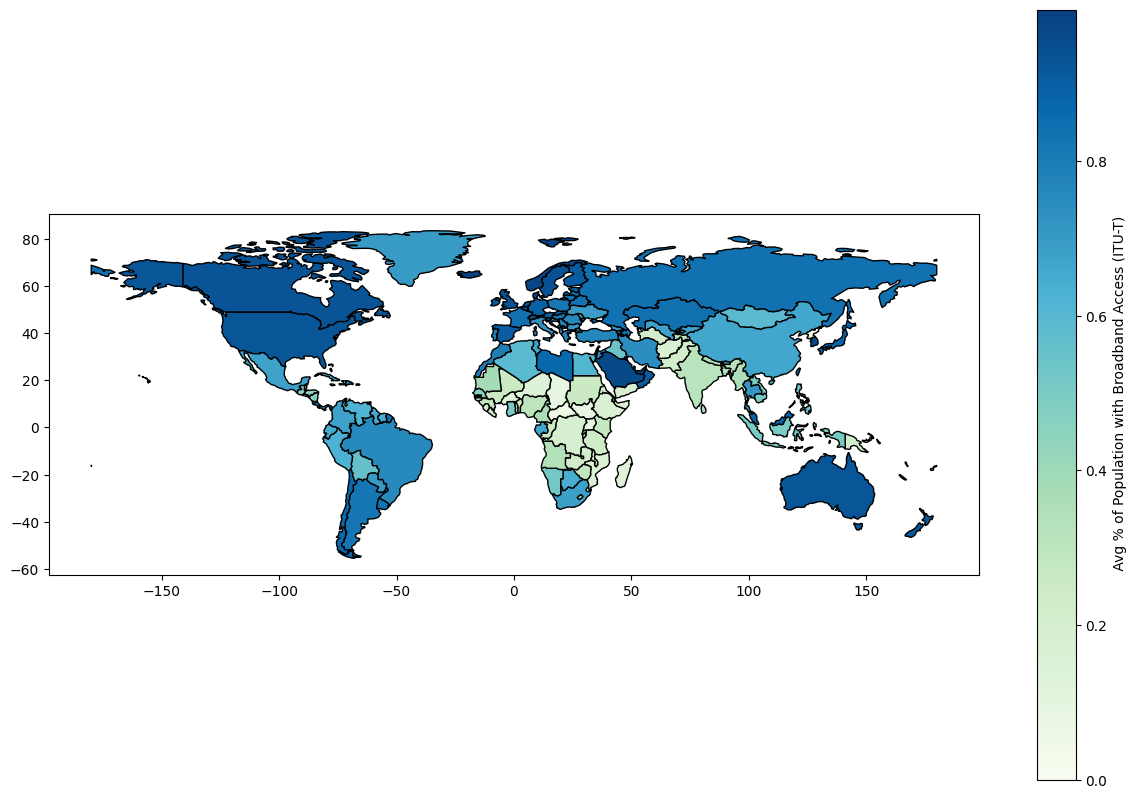

In [124]:
# load the base map into a geopandas GeoDataFrame
# Citation: https://www.analyticsvidhya.com/blog/2021/09/how-to-visualise-data-in-maps-using-geopandas/
try:
    df_worldMap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
except:
    print("\nUnable to load world map from GeoPandas\n")

df_globalConnectivity = df_worldMap.merge(df_internetUsersGlobal, how="left", left_on=["name"], right_on=["Economy"])

# save the dataframe to a csv file for inspection
df_globalConnectivity.to_csv("Global-Connectivity.csv", index=False, encoding="utf-8")

# plot the map of the earth
print("Creating choropleth map from global Internet Connectivity data")
df_globalConnectivity.plot(column="Mean",
                           cmap="GnBu",
                           edgecolor="black",
                           legend=True,
                           legend_kwds={"orientation": "vertical", "label": " Avg % of Population with Broadband Access (ITU-T)"},
                           figsize=(15,10))
plt.show()

In [125]:
# Load and process dataset for Fixed Broadband, beginning with the global dataset, then
# following with the regional datasets (Africa, Arab States, AsiaPac, Eurasia, Europe,
# and the Americas)
#
# load the fixed broadband % per-capita GNI from the ITU dataset
# Note: ITU-T csv file uses unicode encoding
# Citation: https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.read_csv.html
try:
    df_gniFixedWorld = pd.read_csv(fh_gniFixedData, encoding="utf-8")
except:
    print("\nUnable to load data from file: ", fh_gniFixedData)

df_gniWorld = df_gniFixedWorld

In [126]:
# load the mobile broadband % per-capita GNI from the ITU dataset
# Note: ITU-T csv file uses unicode encoding
# Citation: https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.read_csv.html
try:
    df_gniMobileWorld = pd.read_csv(fh_gniMobileData, encoding="utf-8")
except:
    print("\nUnable to load data from file: ", fh_gniMobileData)

In [127]:
# concatenate the GNI fixed broadband data with the GNI mobile broadband data and place in a new df
# Citation: https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat
df_gniWorld = pd.concat([df_gniFixedWorld, df_gniMobileWorld], axis=1).reindex(df_gniFixedWorld.index)
# calculate the mean for each row, ignoring missing data (NaN)
df_gniWorld["Mean"] = df_gniWorld.mean(axis=1, skipna=True)

# filter the unwanted columns in order to map to the global map
df_gniWorld = df_gniWorld.drop(columns=["fixed_2017","fixed_2018","fixed_2019","fixed_2020","fixed_2021", \
                                        "fixed_2022","fixed_2023", "mobile_2017", "mobile_2018", "mobile_2019", \
                                        "mobile_2020", "mobile_2021", "mobile_2022", "mobile_2023", "Mobile Economy"])


In [128]:
# load the base map into a geopandas GeoDataFrame
# Citation: https://www.analyticsvidhya.com/blog/2021/09/how-to-visualise-data-in-maps-using-geopandas/
try:
    df_worldGNIMap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
except:
    print("\nUnable to load world map from GeoPandas\n")

df_globalGNI = df_worldMap.merge(df_gniWorld, how="left", left_on=["name"], right_on=["Economy"])

# save the df_AfricaConnectivity dataframe for inspection
df_gniWorld.to_csv("Global-GNIperCapita.csv",index=False,encoding="utf-8")


In [129]:
df_gniWorld

Economy      Mean
0    Afghanistan  0.135833
1        Albania  0.015833
2        Algeria  0.026667
3        Andorra  0.005000
4         Angola  0.083333
..           ...       ...
194      Vanuatu  0.221818
195     Viet Nam  0.045000
196        Yemen  0.176667
197       Zambia  0.188333
198     Zimbabwe  0.142500

[199 rows x 2 columns]

Creating choropleth map from global Internet Affordability (% GNI per-capita) data


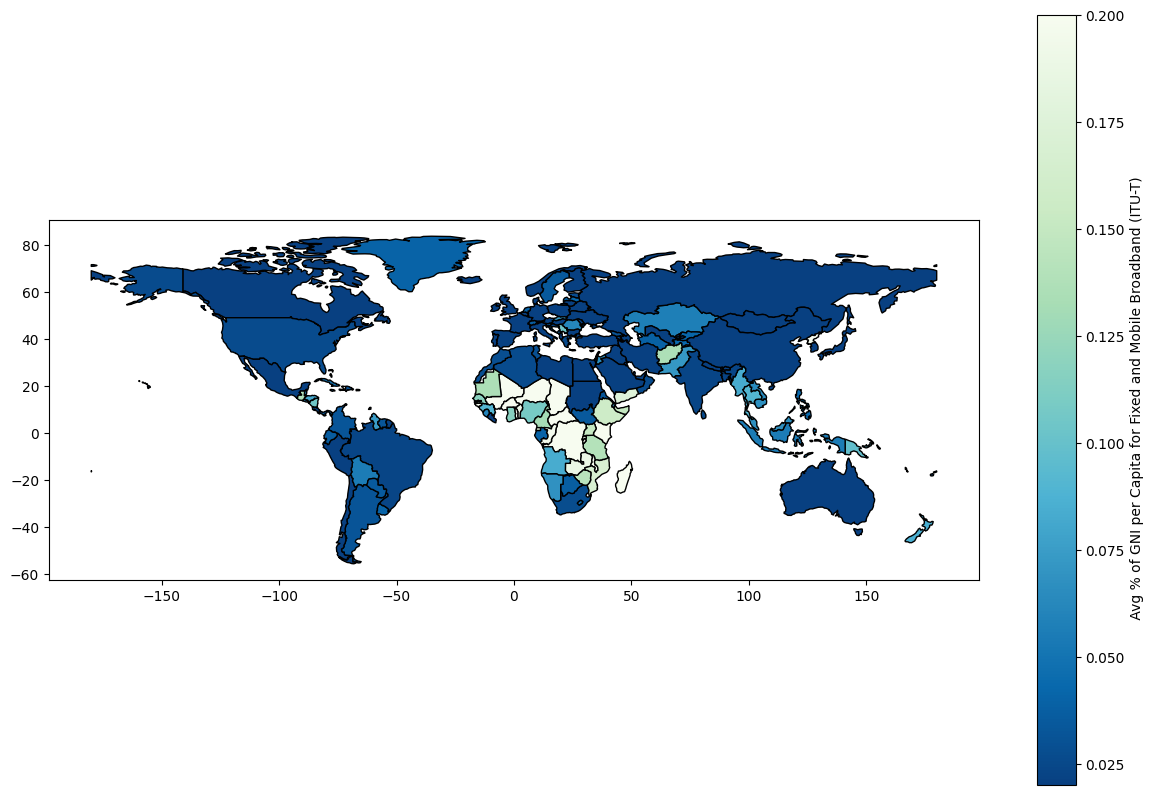

In [130]:
# plot the map of the earth
# Citation: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html
# Citation for available colormaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html
#
# NOTE: reversed the cmap of the choropleth map to better reflect how high GNI regions share the same color scheme
#       as the low-connectivity regions shown in the Internet Connectivity choropleth map
print("Creating choropleth map from global Internet Affordability (% GNI per-capita) data")

df_globalGNI.plot(column="Mean",
                  cmap="GnBu_r",
                  edgecolor="black",
                  legend=True,
                  vmin=0.020,
                  vmax=0.200,
                  legend_kwds={"label": " Avg % of GNI per Capita for Fixed and Mobile Broadband (ITU-T)"},
                  figsize=(15,10))

plt.show()

In [131]:
# Estimate Average Revenue per User (ARPU) by retrieving the GNI per capita (per country) data
# from the World Bank dataset and multiplying those values by the 2030 affordability target of
# 2 percent, established by the UN Broadband Commission
#
# For the IEEE paper, I will refine this approach, but for now I will simply display
# the GNI per capita data from the World Bank
try:
    df_gniData = pd.read_csv(fh_worldBankGNI, encoding="utf-8")
except:
    print("\nUnable to load data from file: ", fh_worldBankGNI)

# load the world population data from UN data repository
try:
    df_worldPopulation = pd.read_csv(fh_worldPopulation, encoding="ISO-8859-1")
except:
    print("\nUnable to load data from file: ", fh_worldPopulation)

df_gniData["meanGNI"] = df_gniData.mean(axis=1, skipna=True, numeric_only=True)
df_gniData["ARPU"] = (df_gniData.iloc[:,7] / MONTHS_PER_YEAR) * UN_AFFORDABILITY_TARGET

# filter the unwanted columns in order to map to the global map
df_gniData = df_gniData.drop(columns=["2017","2018","2019","2020","2021", "2022", "meanGNI"])

# print the estimated ARPU values to the console display as a vertical list of values
df_asList = df_gniData.values.tolist()
for item in df_asList:
    print(item)

#print(df_arpu.to_string()) # dump arpu dataframe to the console to inspect the ARPU values for each country


['Afghanistan', 0.8133333333333334]
['Albania', 9.033333333333333]
['Algeria', 6.455555555555556]
['Andorra', 73.97777777777777]
['Angola', 3.1611111111111114]
['Antigua and Barbuda', 28.211111111111112]
['Argentina', 18.71388888888889]
['Armenia', 7.955555555555556]
['Aruba', 48.125]
['Australia', 92.04444444444444]
['Austria', 84.13055555555557]
['Azerbaijan', 7.708333333333334]
['Bahamas', 47.45]
['Bahrain', 40.22777777777778]
['Bangladesh', 3.769444444444444]
['Barbados', 28.872222222222224]
['Belarus', 10.57777777777778]
['Belgium', 79.925]
['Belize', 9.633333333333335]
['Benin', 2.0444444444444447]
['Bermuda', 195.625]
['Bhutan', 5.19]
['Bolivia', 5.458333333333334]
['Bosnia and Herzegovina', 10.441666666666668]
['Botswana', 10.894444444444446]
['Brazil', 14.147222222222224]
['Brunei Darussalam', 50.902777777777786]
['Bulgaria', 16.55]
['Burkina Faso', 1.2722222222222224]
['Burundi', 0.38888888888888895]
['Cabo Verde', 5.897222222222223]
['Cambodia', 2.511111111111111]
['Cameroon

Creating choropleth map for calculated global GNI (per country) data from World Bank dataset


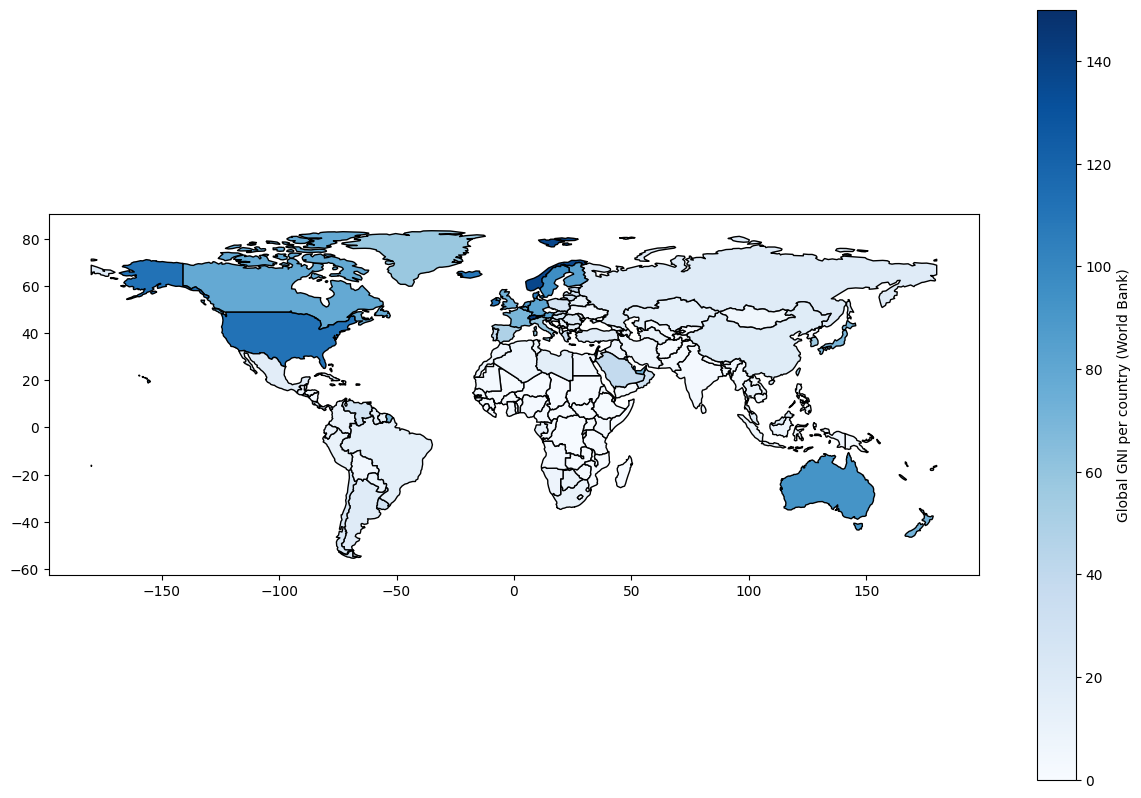

In [132]:
# plot the choropleth map illustrating global ARPU
# Citation: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html
df_globalGNI = df_worldMap.merge(df_gniData, how="left", left_on=["name"], right_on=["Country Name"])

print("Creating choropleth map for calculated global GNI (per country) data from World Bank dataset")
df_globalGNI.plot(column="ARPU",
                  cmap="Blues",
                  edgecolor="black",
                  legend=True,
                  vmin=0.0,
                  vmax=150.0,
                  legend_kwds={"label": "Global GNI per country (World Bank)"},
                  figsize=(15,10))

plt.show()

In [133]:
fh_AfricaInternetUsers = "ITU_internet-users-Africa (2018-2023).csv"

In [134]:
# load the Global Internet Users dataset from the ITU
try:
    df_rawInternetUsersAfrica = pd.read_csv(fh_AfricaInternetUsers, encoding="utf-8")
except:
    print("\nUnable to load data from file: ", fh_AfricaInternetUsers)

df_internetUsersAfrica = df_rawInternetUsersAfrica
df_internetUsersAfrica["Mean"] = df_internetUsersAfrica.mean(axis=1)
df_internetUsersAfrica = df_internetUsersAfrica.drop(columns=["2018","2019","2020","2021","2022","2023"])

Creating choropleth map from Africa Internet Connectivity data


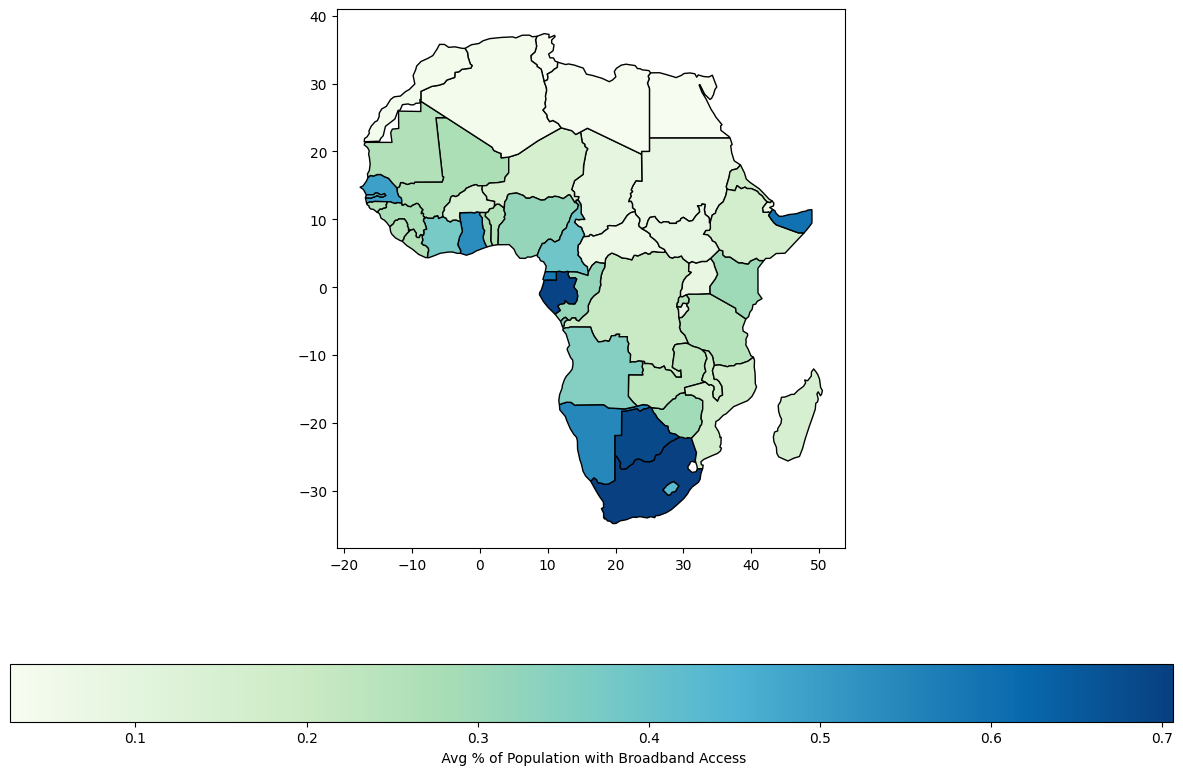

In [135]:
# load the base map into a geopandas GeoDataFrame
# Citation: https://www.analyticsvidhya.com/blog/2021/09/how-to-visualise-data-in-maps-using-geopandas/
try:
    df_worldMap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
except:
    print("\nUnable to load Africa map from GeoPandas\n")

df_africa = df_worldMap.query('continent == "Africa"')

df_AfricaConnectivity = df_africa.merge(df_internetUsersAfrica, how="left", left_on=["name"], right_on=["Economy"])

# plot the map of the earth
print("Creating choropleth map from Africa Internet Connectivity data")
df_AfricaConnectivity.plot(column="Mean",
                           cmap="GnBu",
                           edgecolor="black",
                           legend=True,
                           legend_kwds={"orientation": "horizontal", "label": " Avg % of Population with Broadband Access"},
                           figsize=(15,10))
plt.show()


In [136]:
#print(df_rawInternetUsersAfrica)

df_rawInternetUsersAfrica['2018']=df_rawInternetUsersAfrica['2018'].fillna(0.0)
df_rawInternetUsersAfrica['2019']=df_rawInternetUsersAfrica['2019'].fillna(0.0)
df_rawInternetUsersAfrica['2020']=df_rawInternetUsersAfrica['2020'].fillna(0.0)
df_rawInternetUsersAfrica['2021']=df_rawInternetUsersAfrica['2021'].fillna(0.0)
df_rawInternetUsersAfrica['2022']=df_rawInternetUsersAfrica['2022'].fillna(0.0)
df_rawInternetUsersAfrica=df_rawInternetUsersAfrica.drop('2023',axis=1)
#print(pd.isna(df_rawInternetUsersAfrica))


In [137]:
df_Africa = pd.DataFrame(df_rawInternetUsersAfrica, columns = ['Economy','2018','2019','2020','2021','2022'])

encoder = LabelEncoder()
category = df_Africa['Economy']
class_encoded = encoder.fit_transform(category)
df_Africa['Economy']=class_encoded

#Y = df_Africa['2022']
#X = df_Africa[['Economy','2018','2019','2020','2021']]

#X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)


In [138]:
# create a dataframe that sums each column of the Africa internet connectivity data
df_AggregatedAfrica = df_rawInternetUsersAfrica.mean(axis=0).to_frame().T
df_AggregatedAfrica = df_AggregatedAfrica.drop(columns=["Mean"])
df_AggregatedAfrica

2018      2019      2020      2021     2022
0  0.214906  0.250566  0.298302  0.321132  0.34566

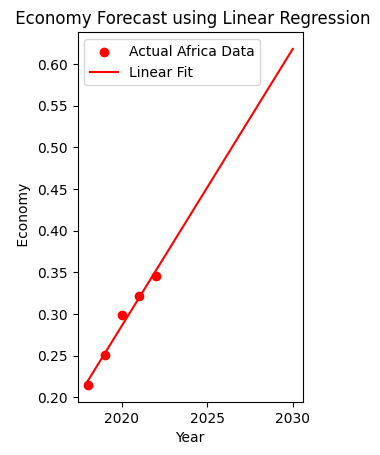

In [139]:
africa_data = df_AggregatedAfrica.loc[0].tolist()
years = np.array([2018, 2019, 2020, 2021, 2022]).reshape(-1, 1)
# create linear regression model for aggregated africa data
linear_model_africa = LinearRegression()
linear_model_africa.fit(years, africa_data)
year_2030 = np.array([[2030]])
linear_forecast_africa = linear_model_africa.predict(year_2030)

# Plot Africa data
plt.subplot(1, 2, 1)
plt.scatter(years, africa_data, color='red', label='Actual Africa Data')
plt.plot(np.append(years, 2030), np.append(linear_model_africa.predict(years), linear_forecast_africa), color='red', label='Linear Fit')
plt.xlabel('Year')
plt.ylabel(' Economy')
plt.title(' Economy Forecast using Linear Regression')
plt.legend()


In [140]:
df_rawInternetUsersAfrica

Economy  2018  2019  2020  2021  2022      Mean
0                 Algeria  0.04  0.04  0.04  0.04  0.05  0.041667
1                  Angola  0.29  0.32  0.37  0.38  0.39  0.350000
2                   Benin  0.19  0.21  0.22  0.31  0.34  0.254000
3                Botswana  0.58  0.65  0.68  0.75  0.77  0.686000
4            Burkina Faso  0.09  0.09  0.16  0.18  0.20  0.144000
5                 Burundi  0.04  0.06  0.09  0.10  0.11  0.080000
6              Cabo Verde  0.60  0.62  0.69  0.71  0.72  0.668000
7                Cameroon  0.30  0.37  0.41  0.43  0.44  0.390000
8    Central African Rep.  0.05  0.08  0.00  0.00  0.00  0.065000
9                    Chad  0.07  0.08  0.08  0.11  0.12  0.092000
10                  Congo  0.00  0.00  0.25  0.33  0.36  0.313333
11          Côte d'Ivoire  0.38  0.36  0.36  0.39  0.38  0.374000
12        Dem. Rep. Congo  0.12  0.17  0.20  0.26  0.27  0.204000
13               Djibouti  0.10  0.09  0.09  0.05  0.09  0.085000
14                  Egypt  0.01  0.03  0.03  0.03  0.03  0.026667
15             Eq. Guinea  0.00  0.49  0.55  0.61  0.67  0.580000
16                Eritrea  0.05  0.11  0.24  0.25  0.27  0.184000
17               Eswatini  0.39  0.44  0.49  0.56  0.58  0.492000
18               Ethiopia  0.16  0.16  0.16  0.17  0.19  0.168000
19                  Gabon  0.60  0.69  0.72  0.73  0.74  0.696000
20                 Gambia  0.28  0.36  0.45  0.50  0.54  0.426000
21                  Ghana  0.43  0.22  0.63  0.69  0.70  0.534000
22                 Guinea  0.22  0.23  0.29  0.31  0.34  0.278000
23          Guinea-Bissau  0.16  0.23  0.28  0.29  0.32  0.256000
24                  Kenya  0.20  0.23  0.28  0.38  0.41  0.300000
25                Lesotho  0.41  0.42  0.40  0.44  0.47  0.428000
26                Liberia  0.19  0.24  0.28  0.28  0.30  0.258000
27                  Libya  0.04  0.00  0.03  0.02  0.04  0.028000
28             Madagascar  0.09  0.12  0.16  0.18  0.21  0.152000
29                 Malawi  0.08  0.13  0.22  0.27  0.28  0.196000
30                   Mali  0.21  0.22  0.28  0.31  0.33  0.270000
31             Mauritania  0.32  0.32  0.32  0.23  0.19  0.261667
32              Mauritius  0.59  0.62  0.68  0.72  0.76  0.674000
33                Morocco  0.04  0.04  0.04  0.04  0.04  0.040000
34             Mozambique  0.11  0.15  0.18  0.20  0.21  0.170000
35                Namibia  0.43  0.50  0.58  0.61  0.62  0.548000
36                  Niger  0.00  0.17  0.14  0.15  0.17  0.157500
37                Nigeria  0.28  0.30  0.32  0.32  0.36  0.316000
38                 Rwanda  0.19  0.21  0.24  0.29  0.34  0.254000
39  Sao Tome and Principe  0.38  0.44  0.52  0.56  0.57  0.494000
40                Senegal  0.35  0.43  0.53  0.55  0.60  0.492000
41             Seychelles  0.69  0.77  0.85  0.81  0.87  0.798000
42           Sierra Leone  0.16  0.21  0.28  0.28  0.30  0.246000
43             Somaliland  0.00  0.00  0.00  0.00  0.39  0.595000
44           South Africa  0.62  0.70  0.72  0.74  0.75  0.706000
45               S. Sudan  0.05  0.07  0.09  0.10  0.12  0.086000
46                  Sudan  0.08  0.00  0.00  0.00  0.00  0.080000
47               Tanzania  0.17  0.18  0.26  0.30  0.32  0.246000
48                   Togo  0.16  0.21  0.29  0.33  0.38  0.274000
49                Tunisia  0.01  0.04  0.03  0.03  0.03  0.028333
50                 Uganda  0.00  0.00  0.07  0.10  0.00  0.085000
51                 Zambia  0.14  0.19  0.25  0.27  0.31  0.232000
52               Zimbabwe  0.25  0.27  0.29  0.33  0.33  0.294000

In [141]:
df_rawInternetUsersAfrica=df_rawInternetUsersAfrica.drop('Mean',axis=1)

In [142]:
df_rawInternetUsersAfrica.set_index('Economy', inplace=True)

In [143]:
# Function to get data for a specific African country as a list
def get_economy_data_as_list(economy_name):
    if economy_name in df_rawInternetUsersAfrica.index:
        return df_rawInternetUsersAfrica.loc[economy_name].tolist()
    else:
        return f"{economy_name} not found in the dataset."

[0.062]
RMSE of Algeria Polynomial Regression model->  0.0028284271247459394


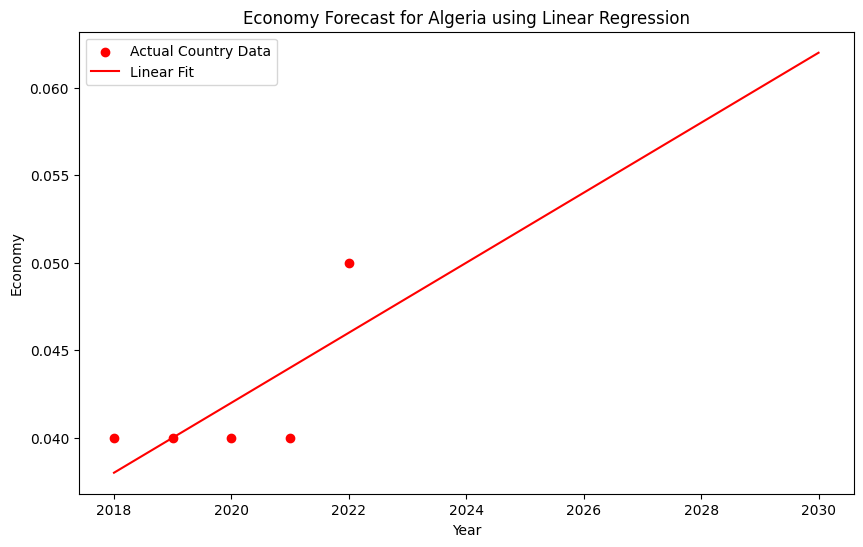

[0.61]
RMSE of Angola Polynomial Regression model->  0.011313708498984758


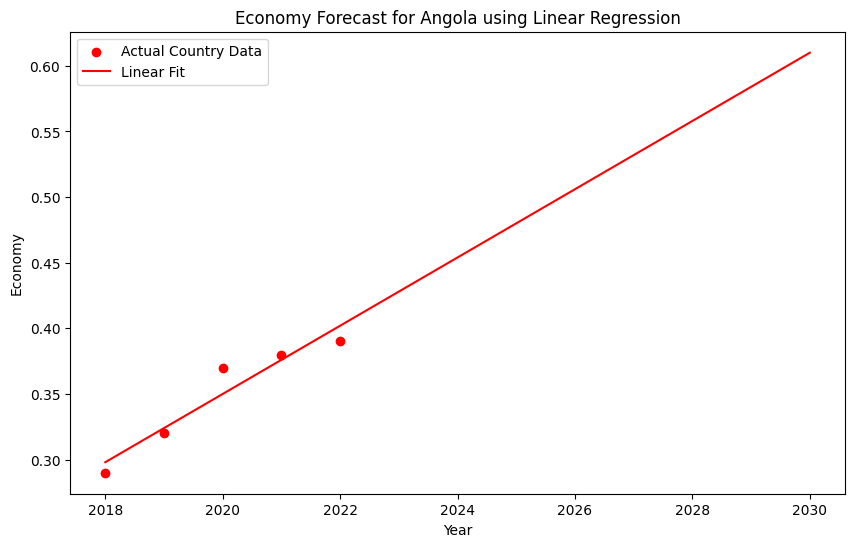

[0.654]
RMSE of Benin Polynomial Regression model->  0.01854723699099049


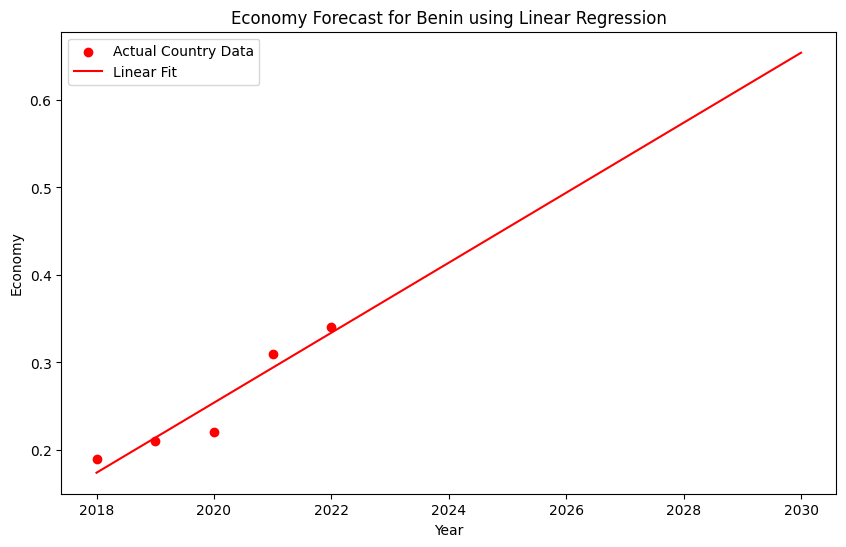

[1.166]
RMSE of Botswana Polynomial Regression model->  0.011661903789691579


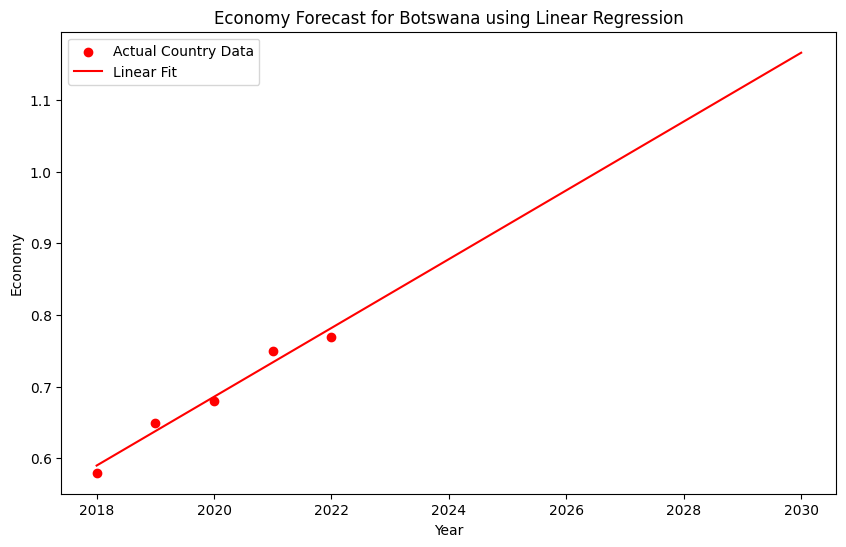

[0.454]
RMSE of Burkina Faso Polynomial Regression model->  0.013490737563232673


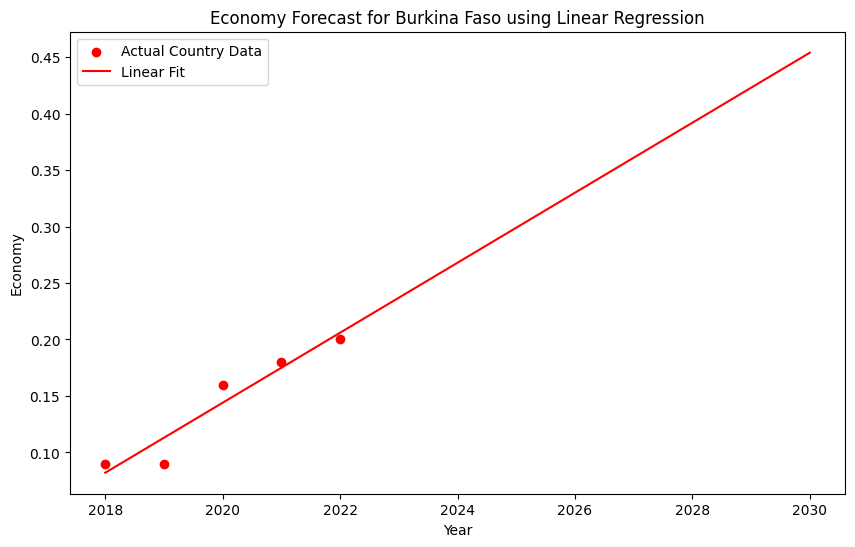

[0.26]
RMSE of Burundi Polynomial Regression model->  0.005656854249490872


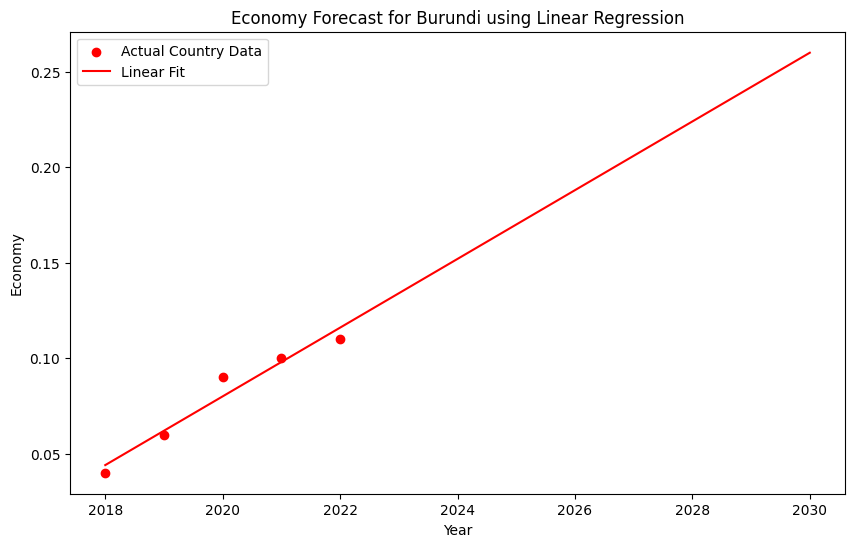

[0.998]
RMSE of Cabo Verde Polynomial Regression model->  0.014071247279473707


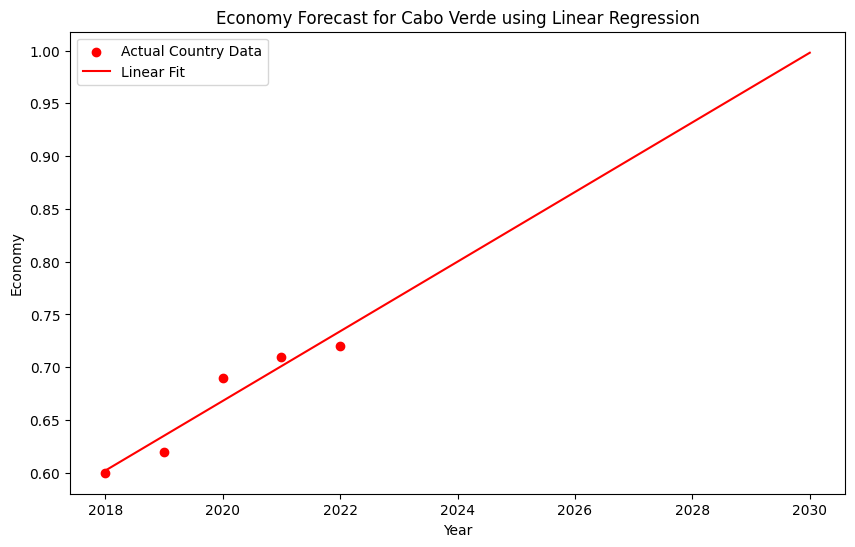

[0.73]
RMSE of Cameroon Polynomial Regression model->  0.01697056274847881


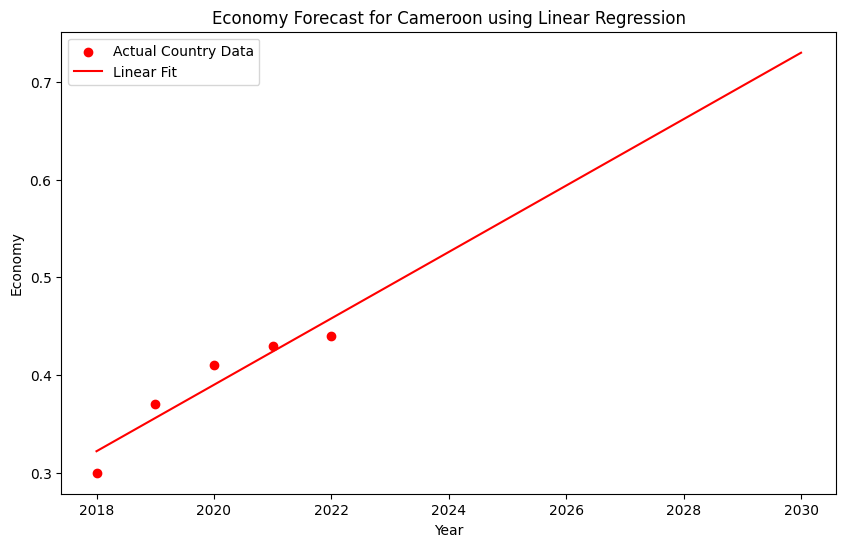

[-0.154]
RMSE of Central African Rep. Polynomial Regression model->  0.021354156504061958


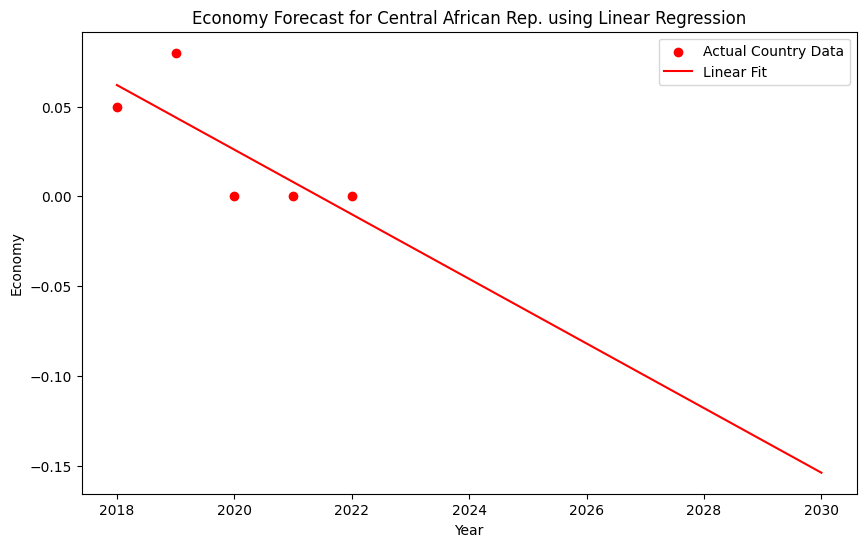

[0.222]
RMSE of Chad Polynomial Regression model->  0.0061644140029686306


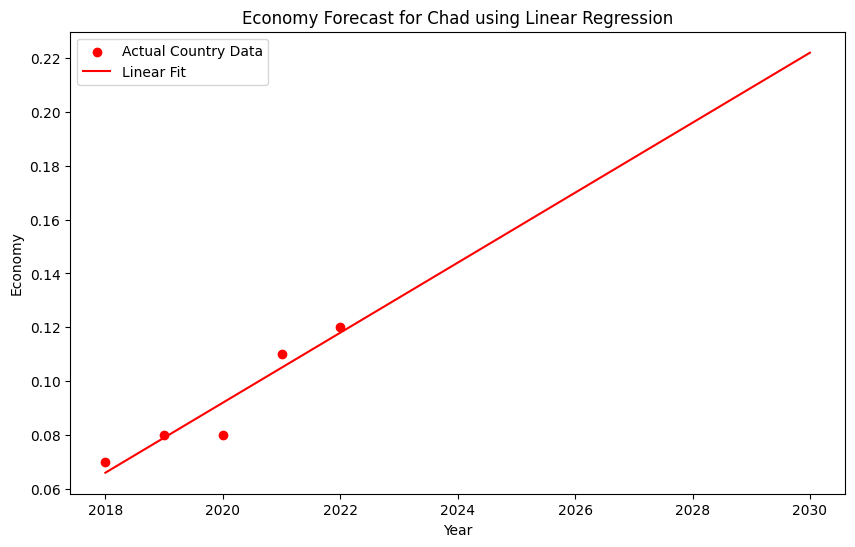

[1.238]
RMSE of Congo Polynomial Regression model->  0.052971690552602556


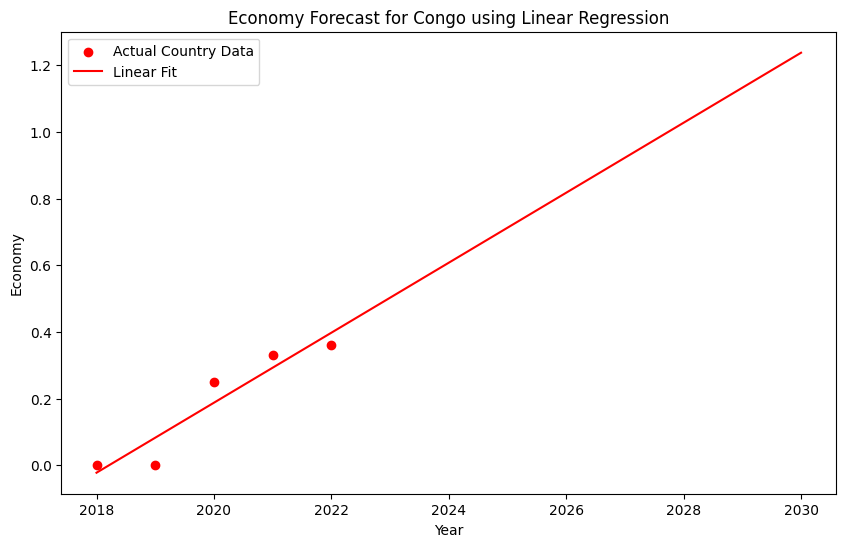

[0.404]
RMSE of Côte d'Ivoire Polynomial Regression model->  0.01122497216032204


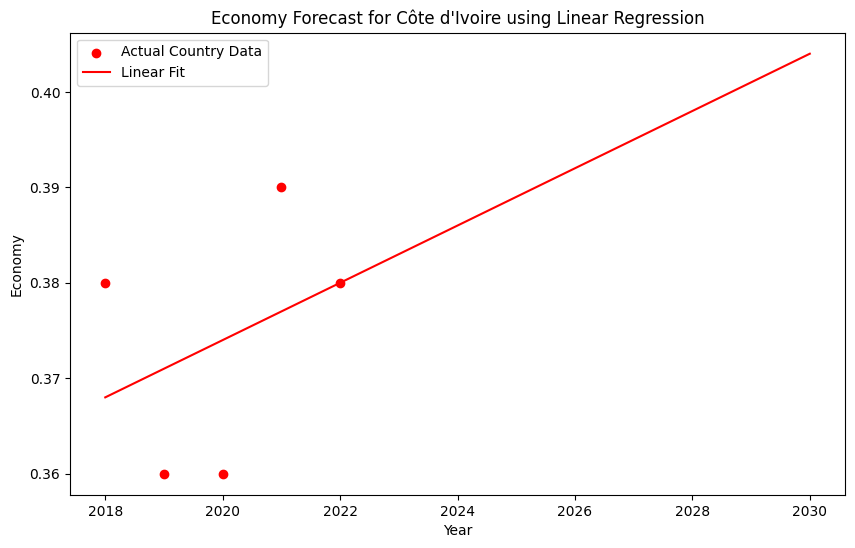

[0.594]
RMSE of Dem. Rep. Congo Polynomial Regression model->  0.010099504938362078


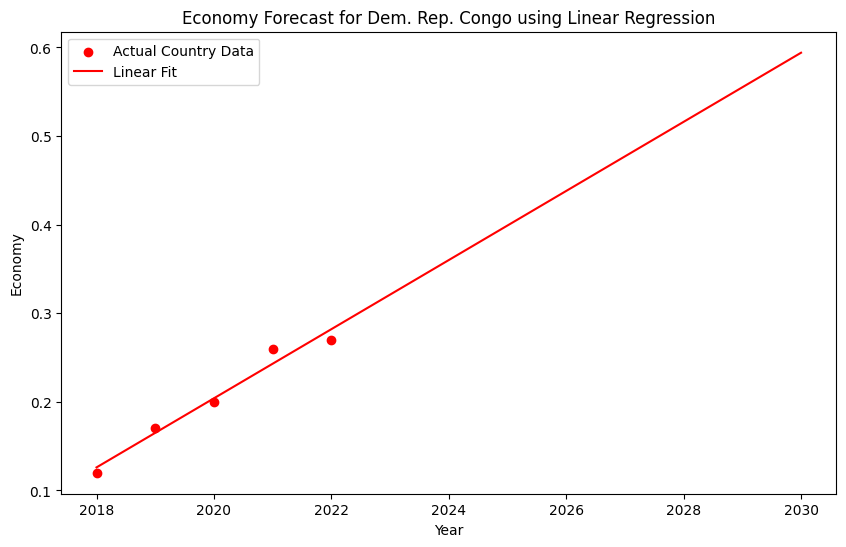

[0.024]
RMSE of Djibouti Polynomial Regression model->  0.015231546211728047


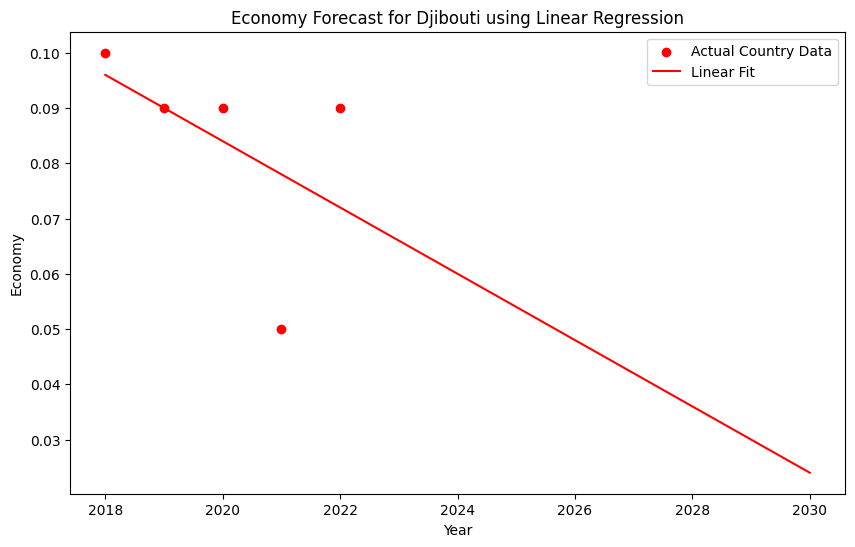

[0.066]
RMSE of Egypt Polynomial Regression model->  0.005656854249492631


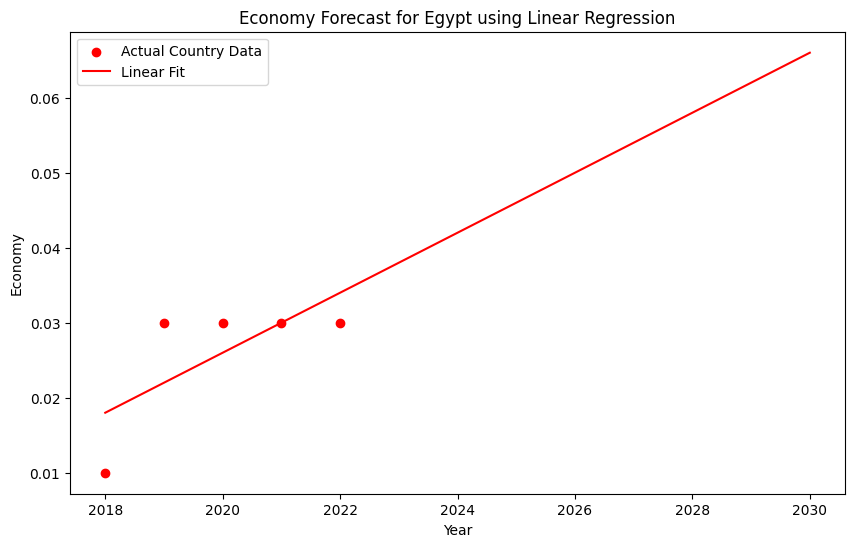

[1.924]
RMSE of Eq. Guinea Polynomial Regression model->  0.12162236636408617


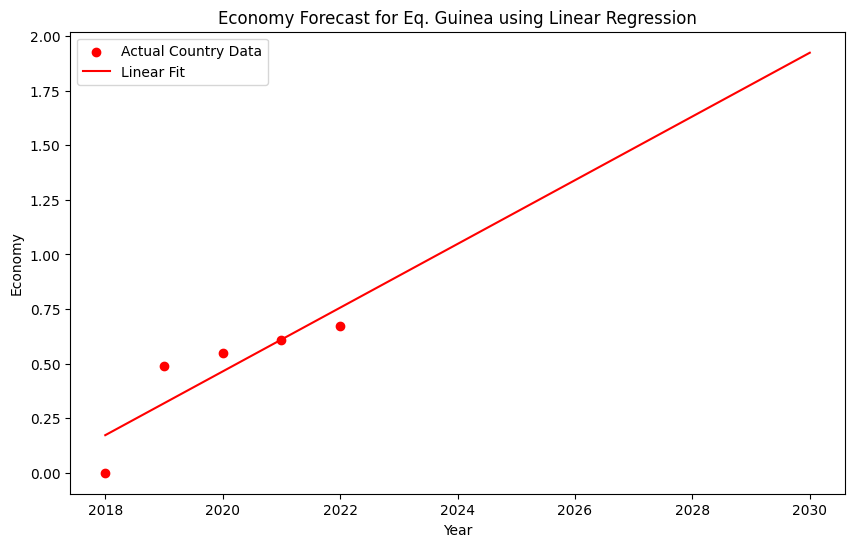

[0.764]
RMSE of Eritrea Polynomial Regression model->  0.030594117081556328


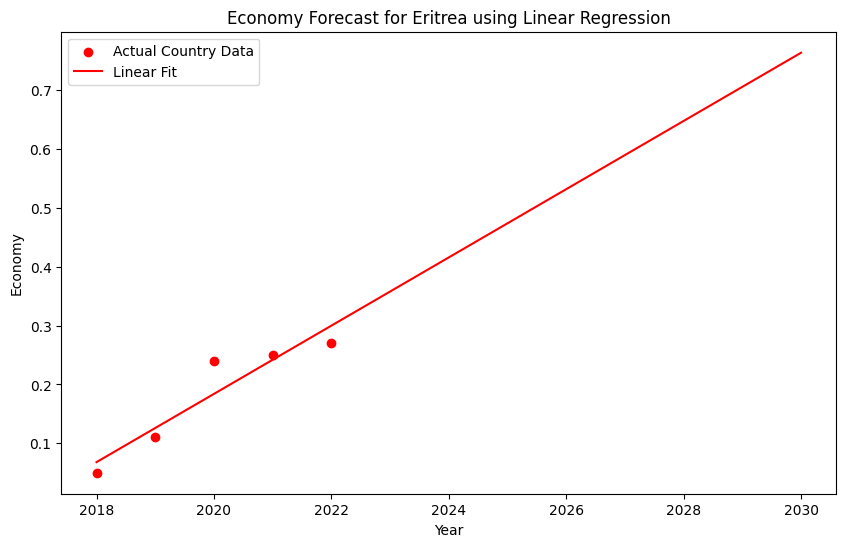

[0.992]
RMSE of Eswatini Polynomial Regression model->  0.009797958971131001


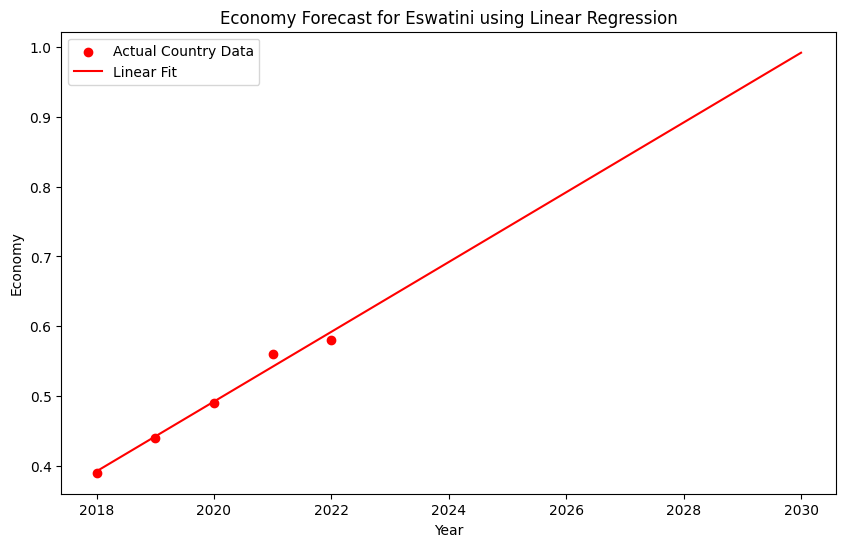

[0.238]
RMSE of Ethiopia Polynomial Regression model->  0.006164414002969321


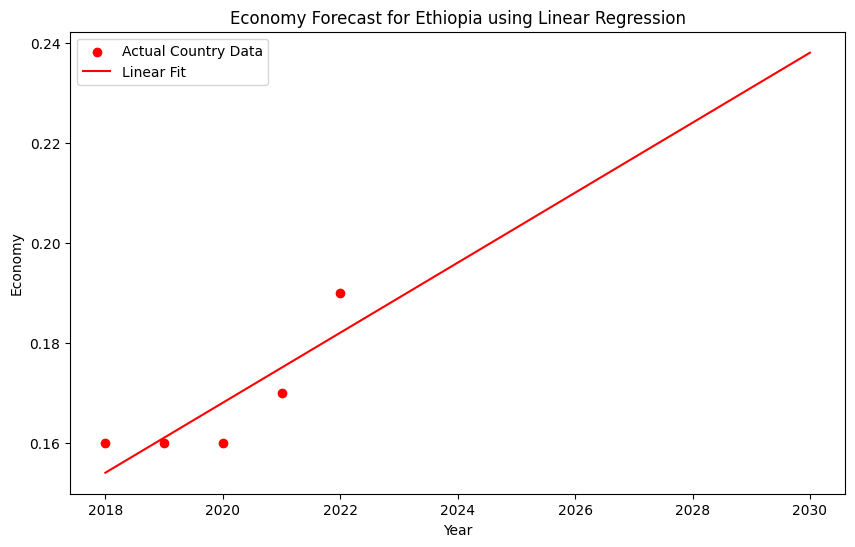

[1.016]
RMSE of Gabon Polynomial Regression model->  0.023151673805582897


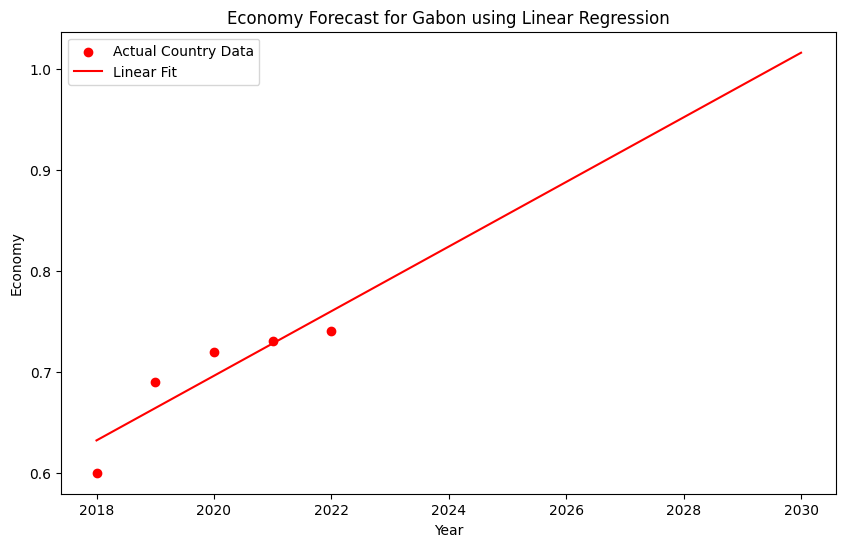

[1.086]
RMSE of Gambia Polynomial Regression model->  0.01523154621173303


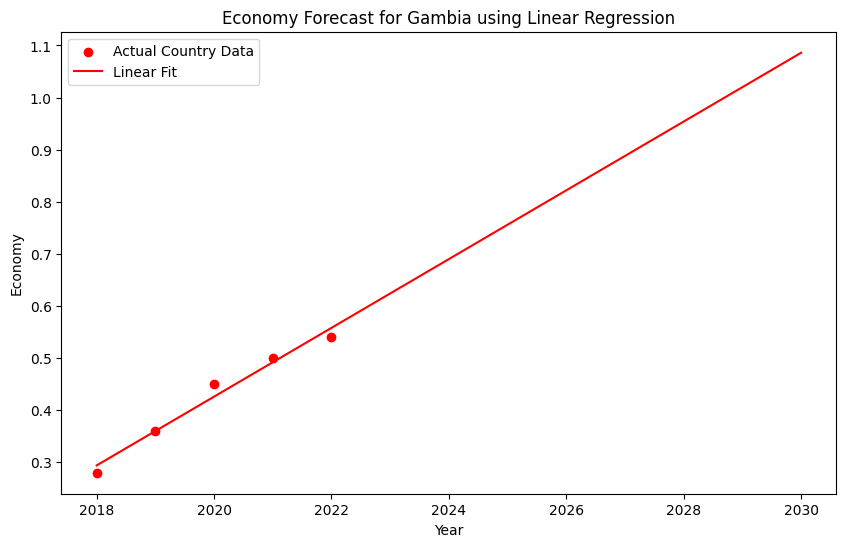

[1.544]
RMSE of Ghana Polynomial Regression model->  0.11705554237198681


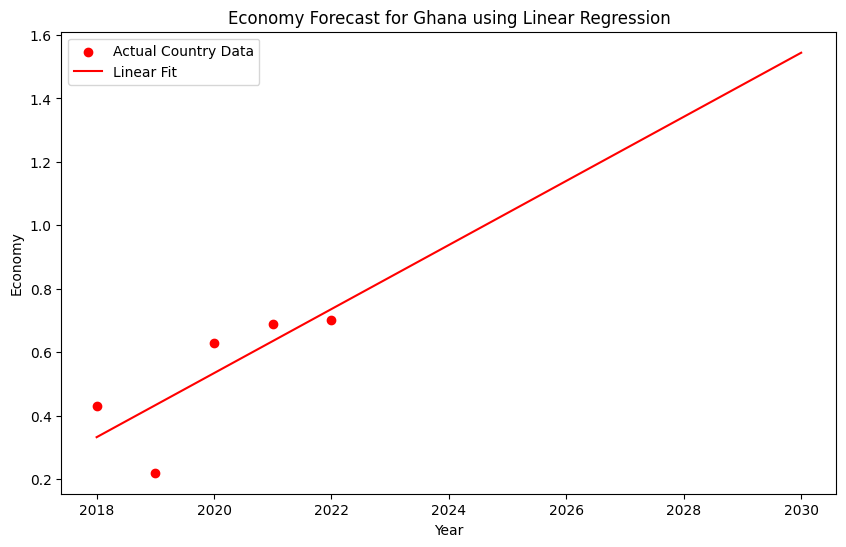

[0.598]
RMSE of Guinea Polynomial Regression model->  0.009380831519647456


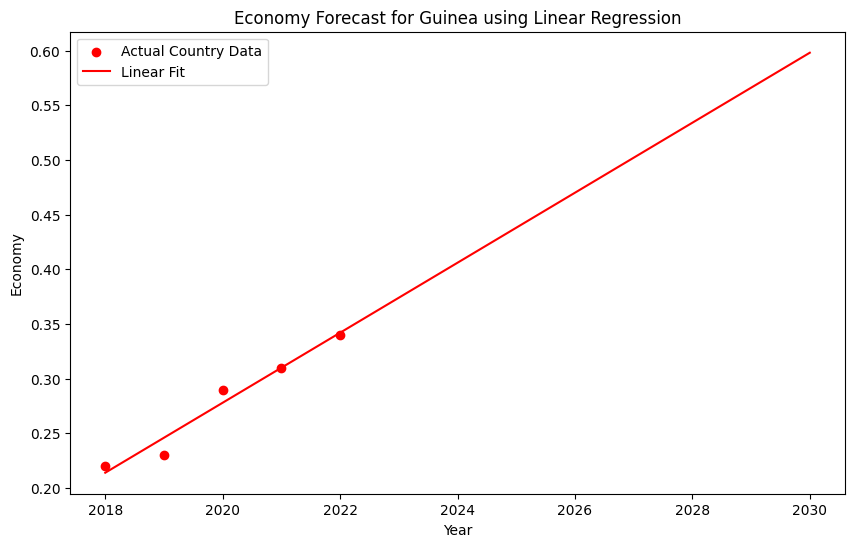

[0.636]
RMSE of Guinea-Bissau Polynomial Regression model->  0.01600000000000285


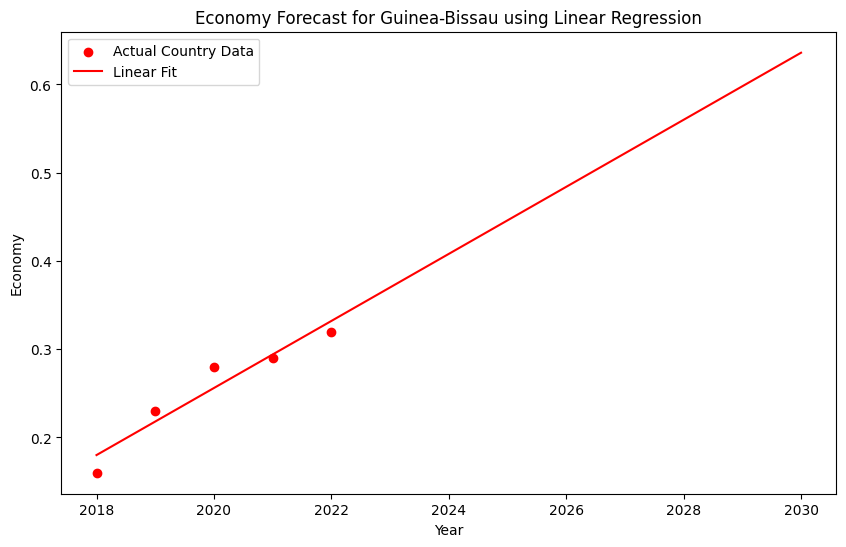

[0.87]
RMSE of Kenya Polynomial Regression model->  0.016186414056236186


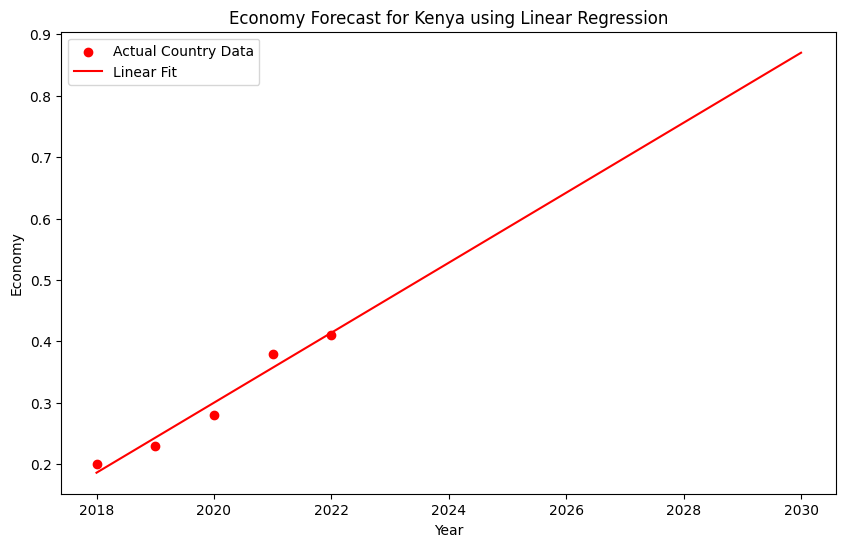

[0.568]
RMSE of Lesotho Polynomial Regression model->  0.014966629547096223


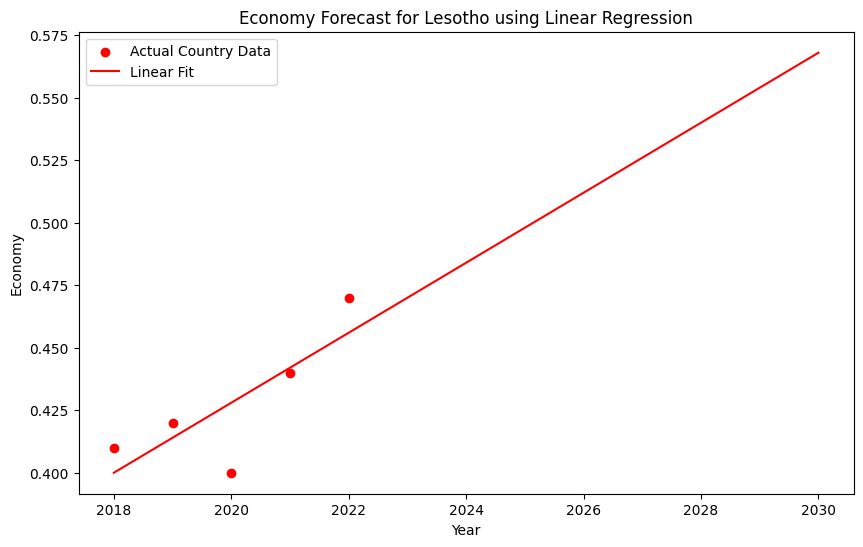

[0.518]
RMSE of Liberia Polynomial Regression model->  0.013564659966250333


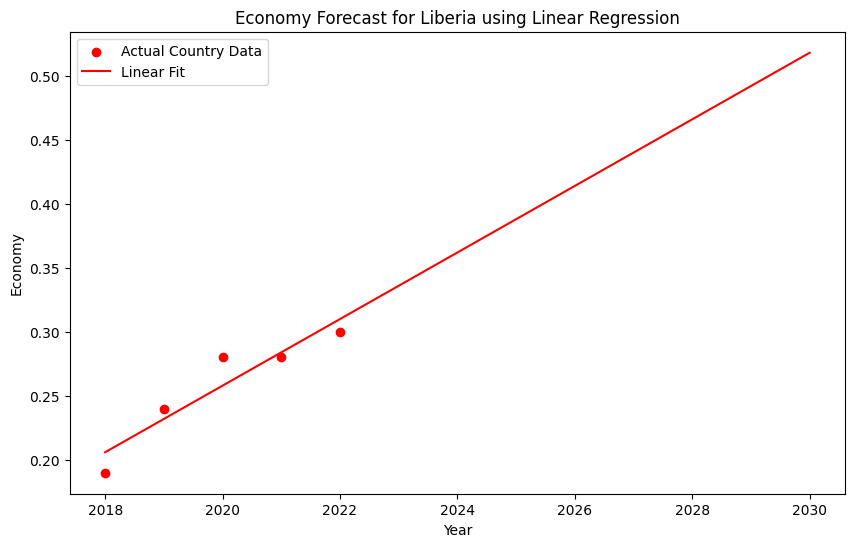

[0.046]
RMSE of Libya Polynomial Regression model->  0.014696938456698947


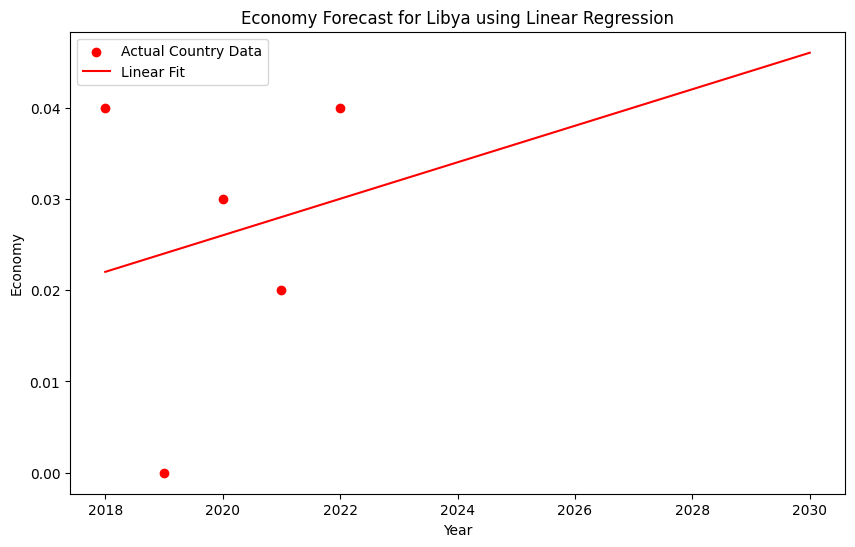

[0.452]
RMSE of Madagascar Polynomial Regression model->  0.004000000000001424


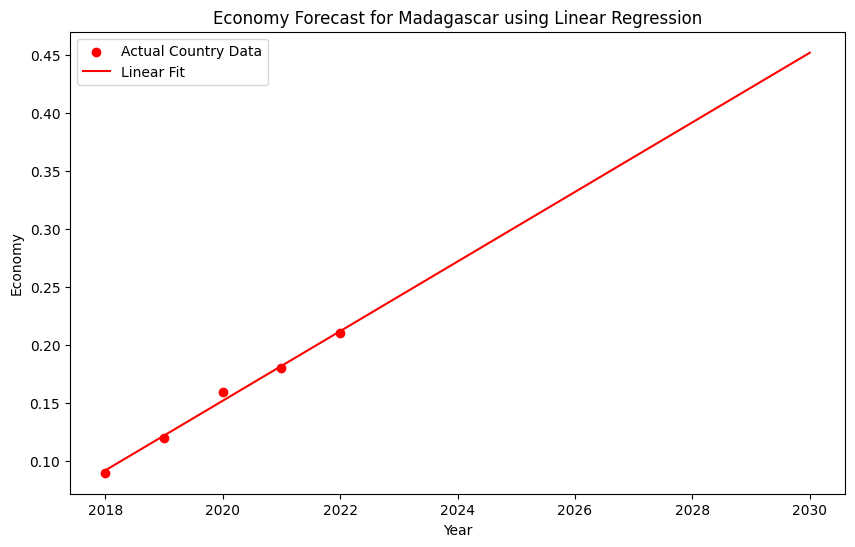

[0.736]
RMSE of Malawi Polynomial Regression model->  0.018761663039293715


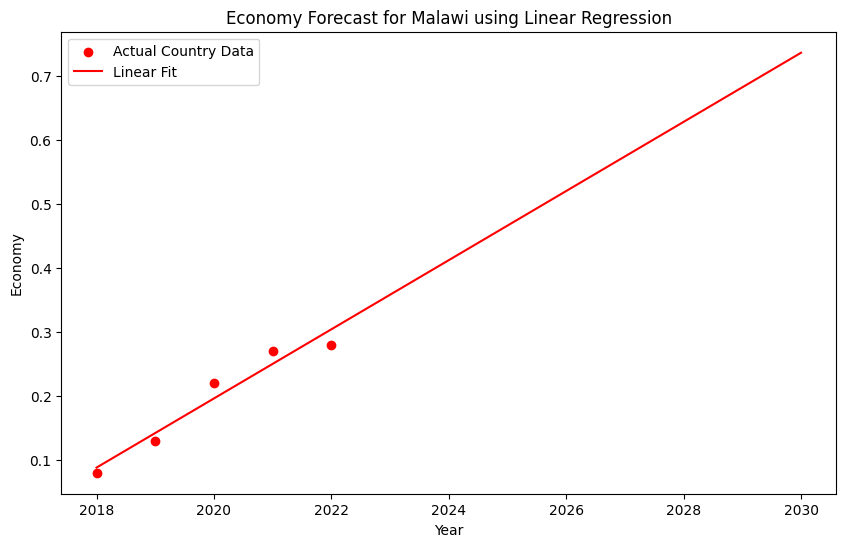

[0.6]
RMSE of Mali Polynomial Regression model->  0.010099504938365176


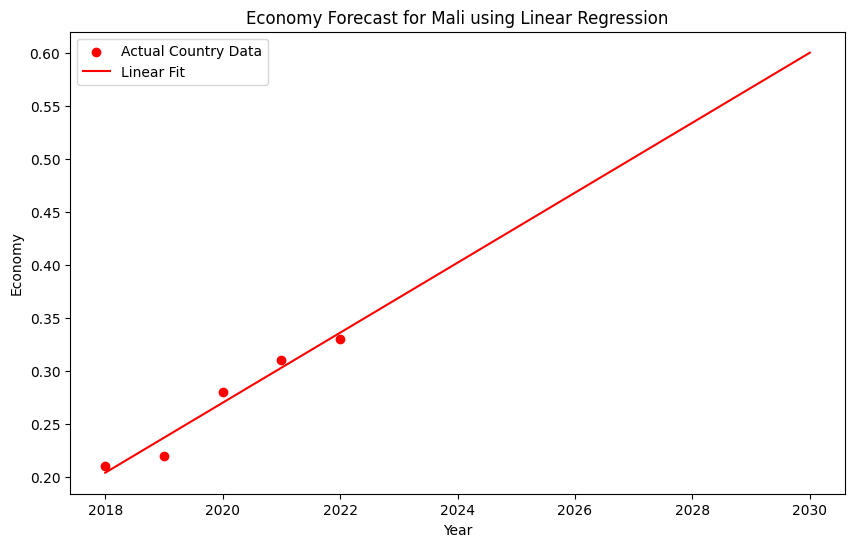

[-0.074]
RMSE of Mauritania Polynomial Regression model->  0.024779023386724636


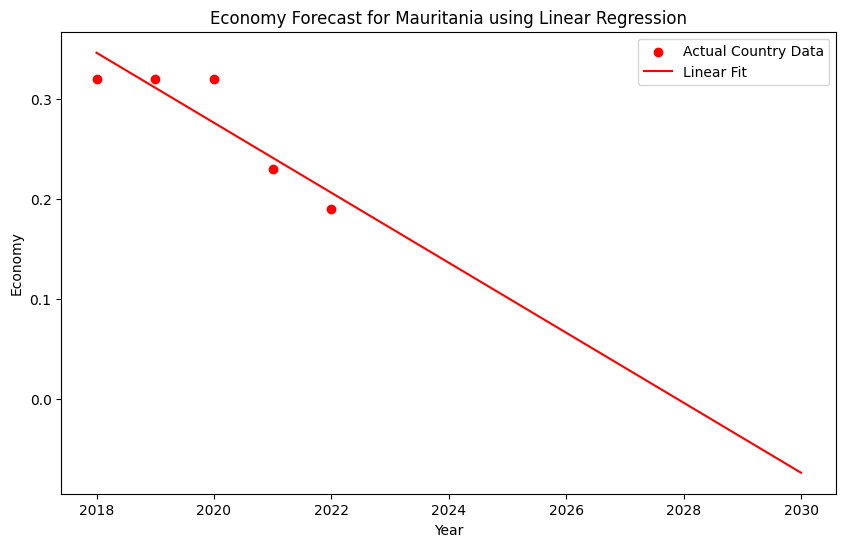

[1.114]
RMSE of Mauritius Polynomial Regression model->  0.0056568542494923844


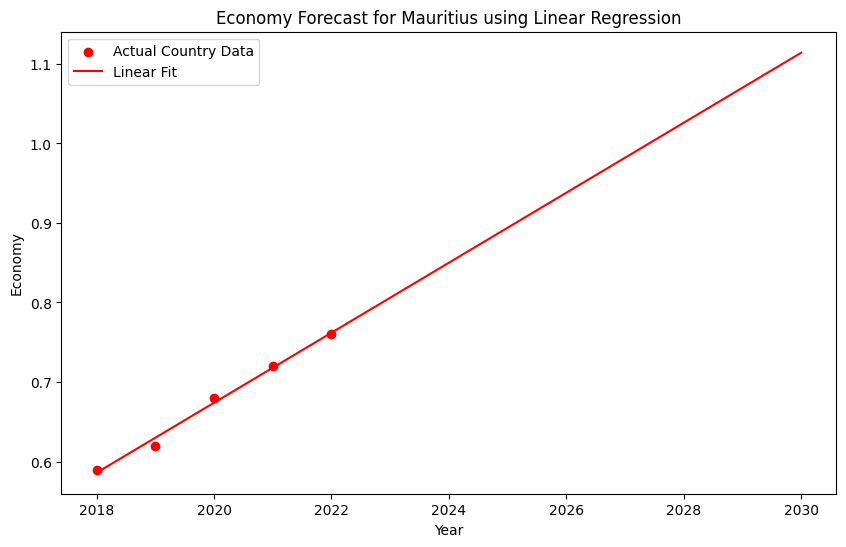

[0.04]
RMSE of Morocco Polynomial Regression model->  0.0


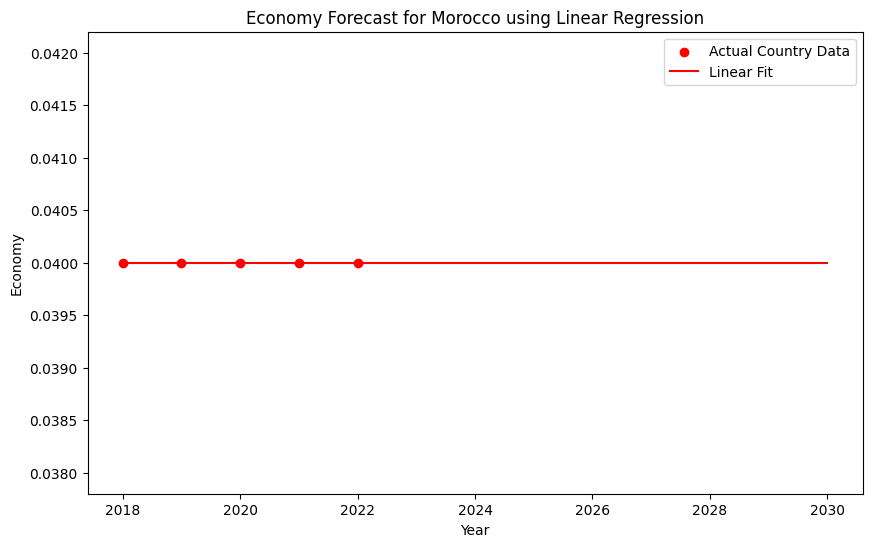

[0.42]
RMSE of Mozambique Polynomial Regression model->  0.008366600265341605


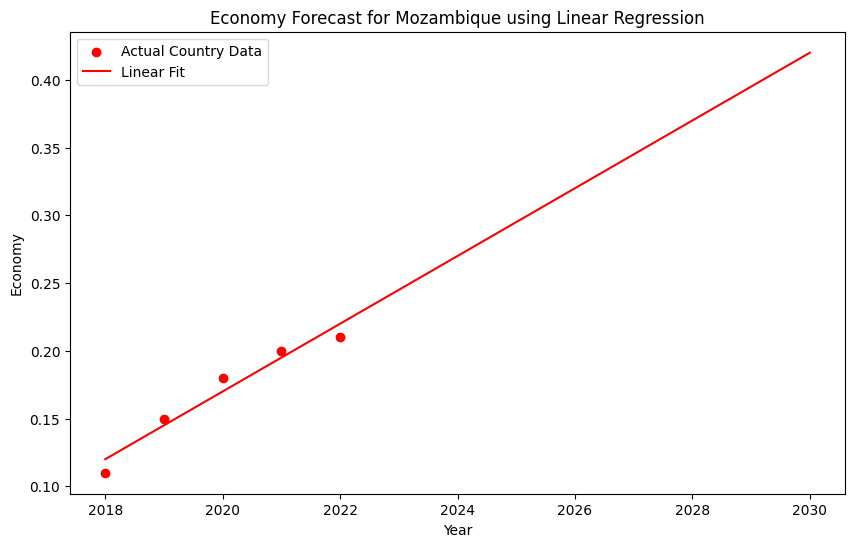

[1.038]
RMSE of Namibia Polynomial Regression model->  0.021307275752661704


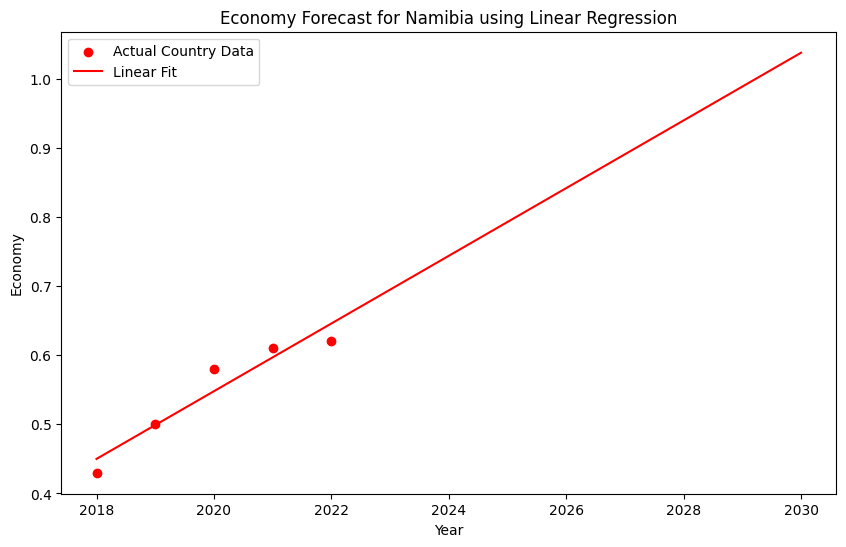

[0.446]
RMSE of Niger Polynomial Regression model->  0.04534313619501979


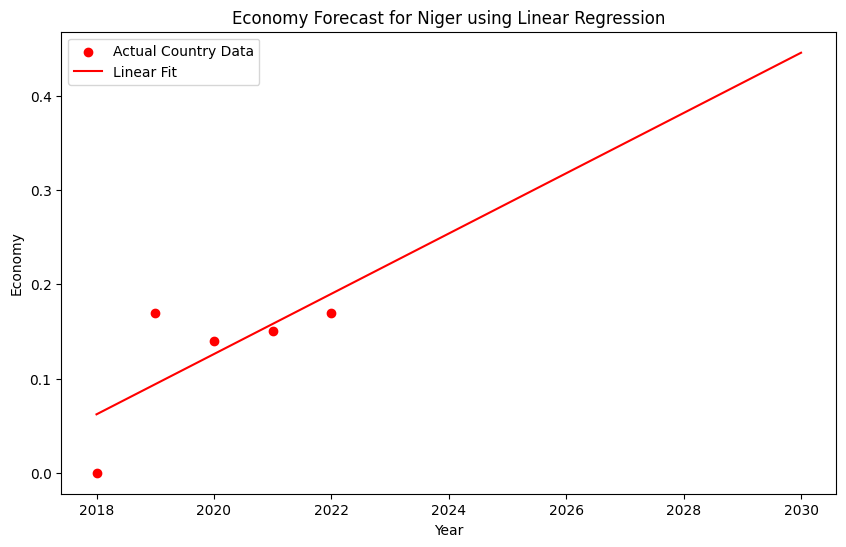

[0.496]
RMSE of Nigeria Polynomial Regression model->  0.007483314773547878


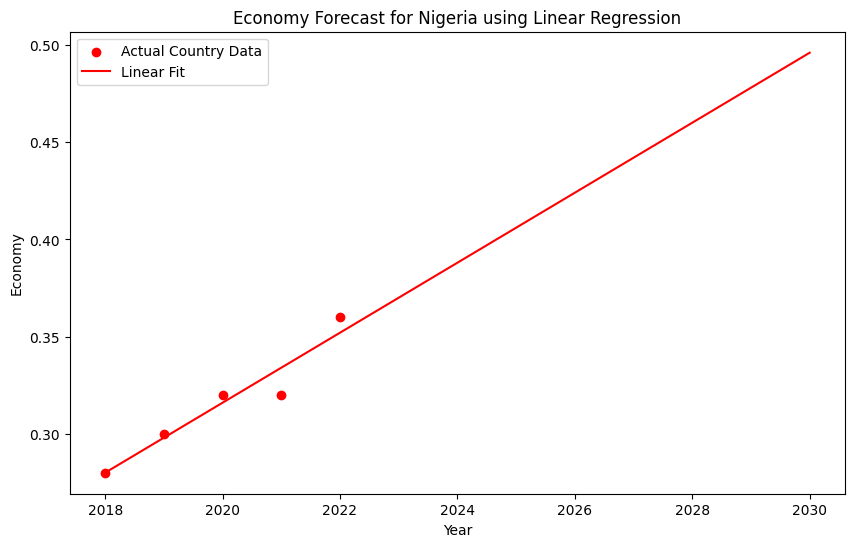

[0.634]
RMSE of Rwanda Polynomial Regression model->  0.0097979589711304


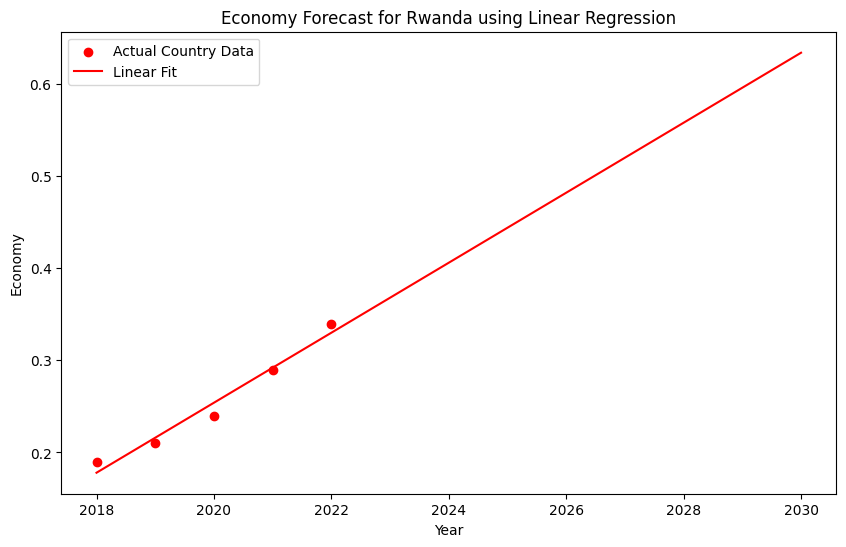

[0.994]
RMSE of Sao Tome and Principe Polynomial Regression model->  0.018547236990992658


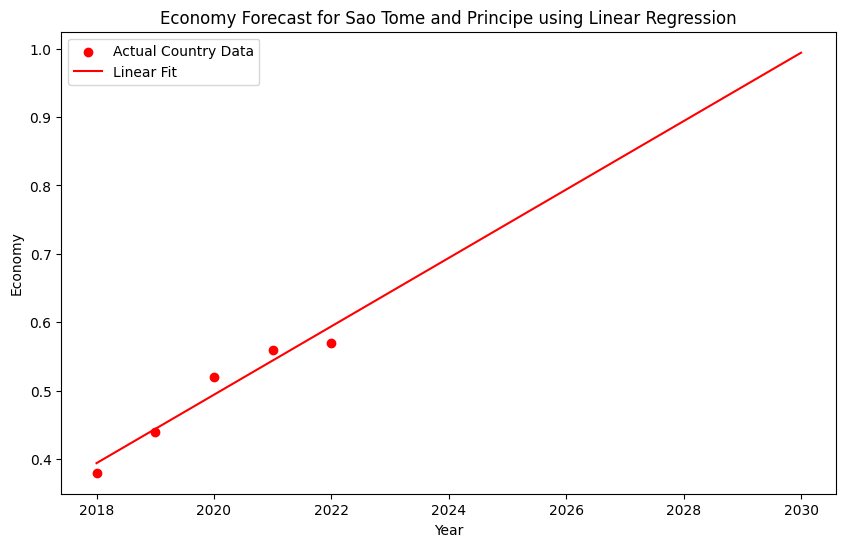

[1.112]
RMSE of Senegal Polynomial Regression model->  0.02019900987672642


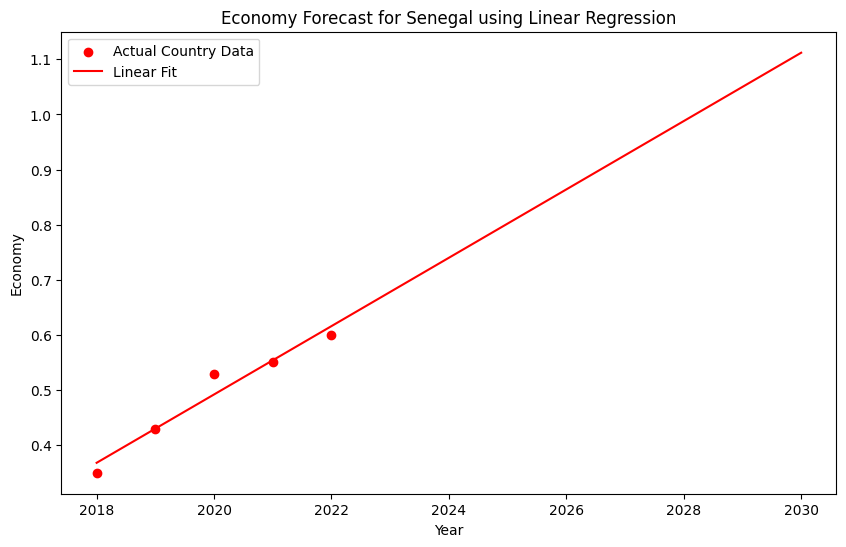

[1.198]
RMSE of Seychelles Polynomial Regression model->  0.029933259094192283


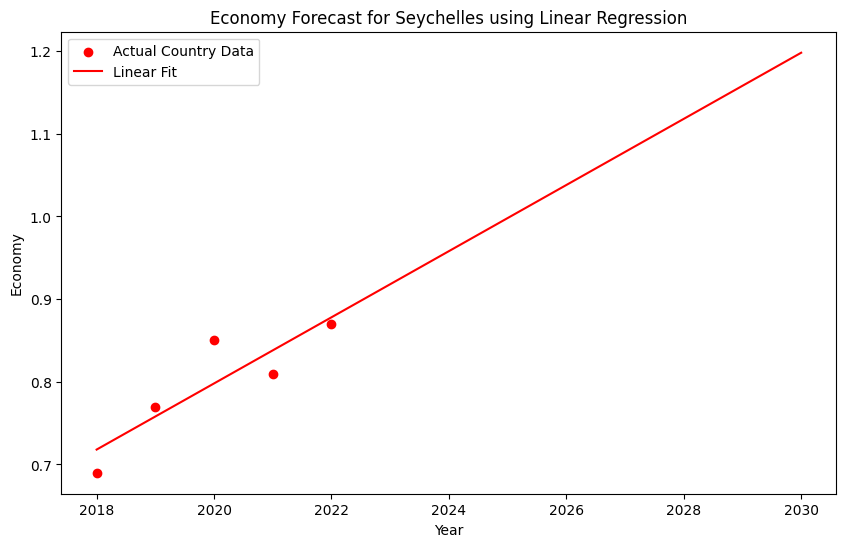

[0.596]
RMSE of Sierra Leone Polynomial Regression model->  0.018275666882499722


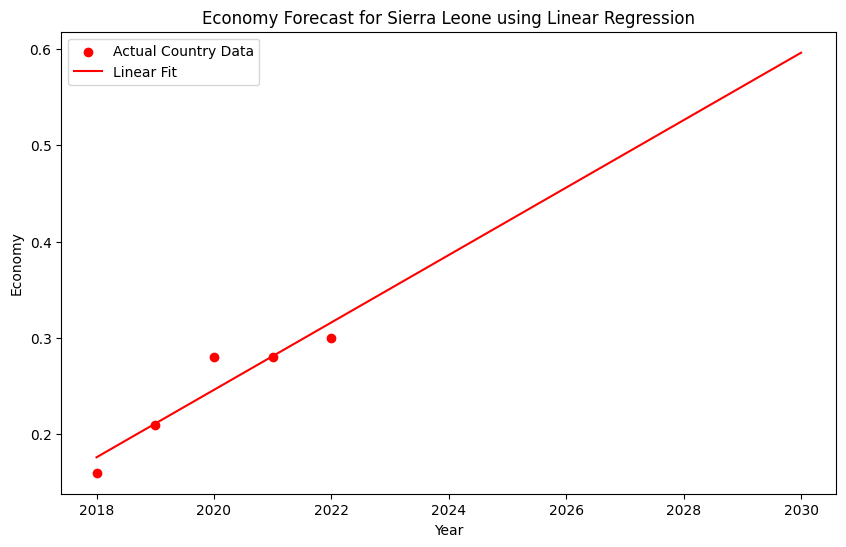

[0.858]
RMSE of Somaliland Polynomial Regression model->  0.11030865786510143


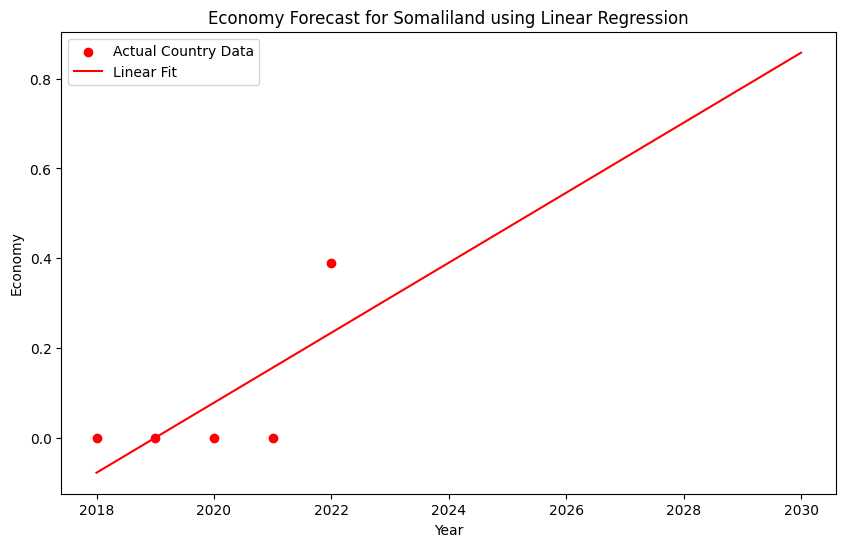

[1.006]
RMSE of South Africa Polynomial Regression model->  0.018547236990991547


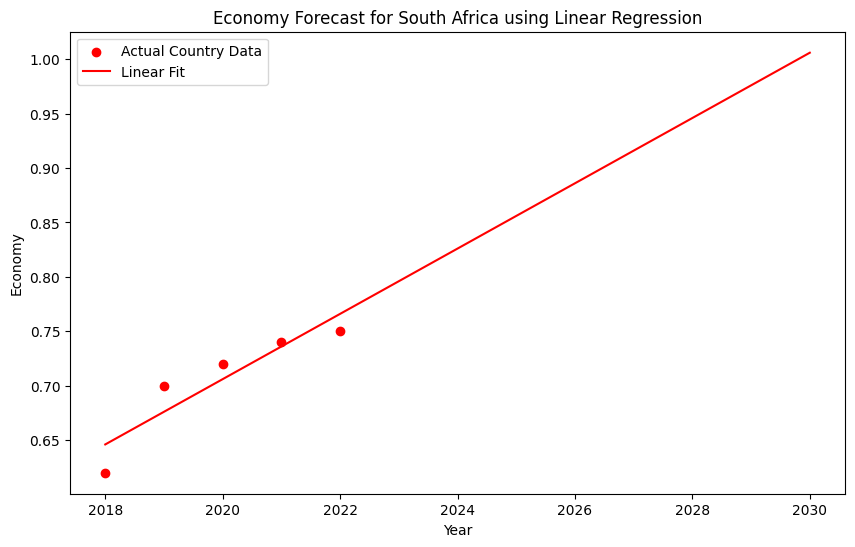

[0.256]
RMSE of S. Sudan Polynomial Regression model->  0.0024494897427825954


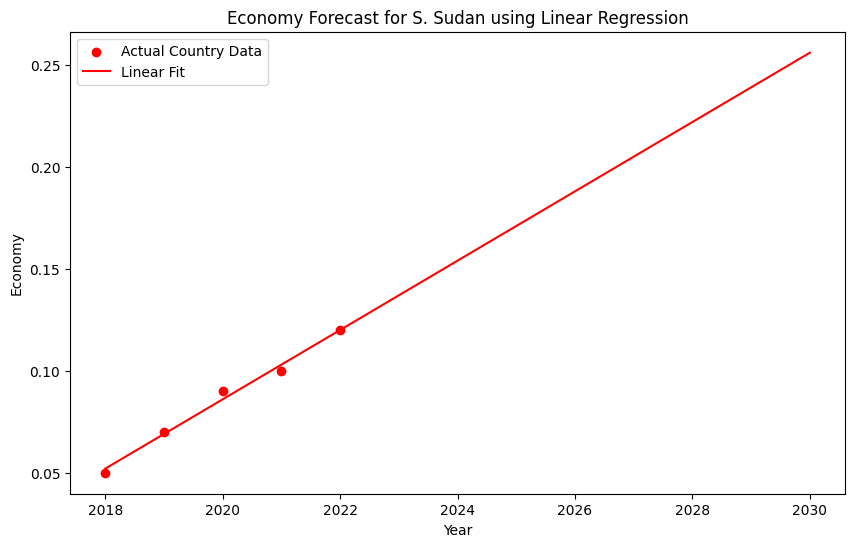

[-0.144]
RMSE of Sudan Polynomial Regression model->  0.02262741699797053


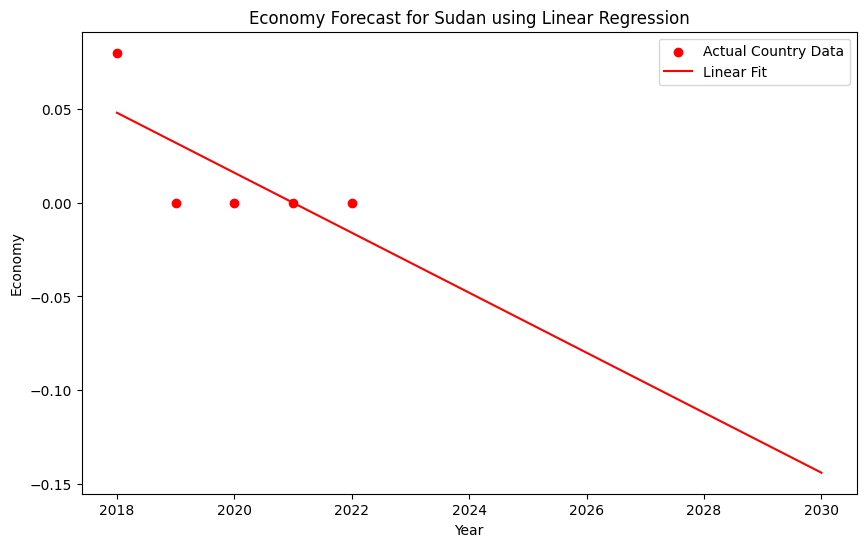

[0.666]
RMSE of Tanzania Polynomial Regression model->  0.014696938456699072


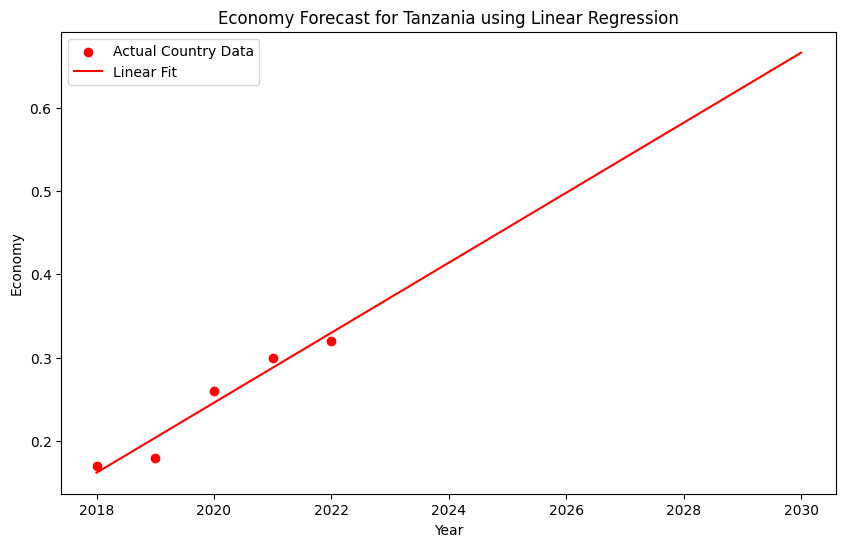

[0.834]
RMSE of Togo Polynomial Regression model->  0.008485281374237893


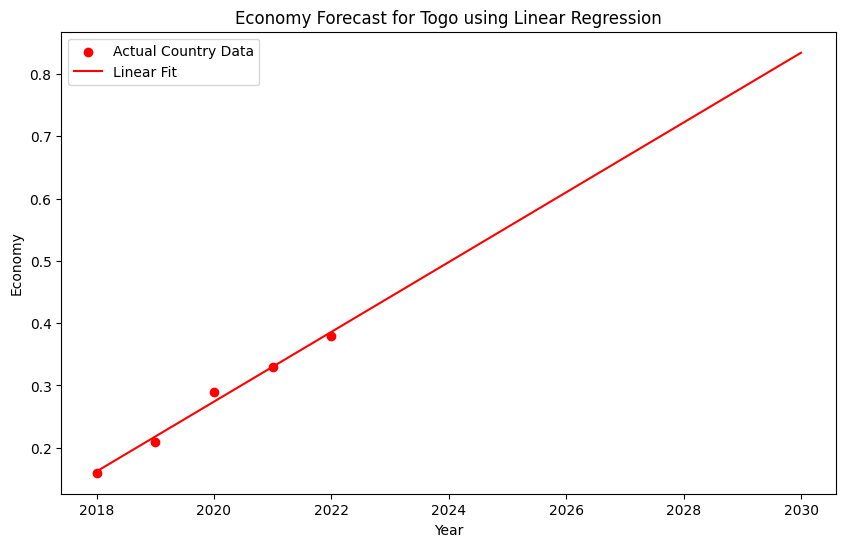

[0.058]
RMSE of Tunisia Polynomial Regression model->  0.008831760866327747


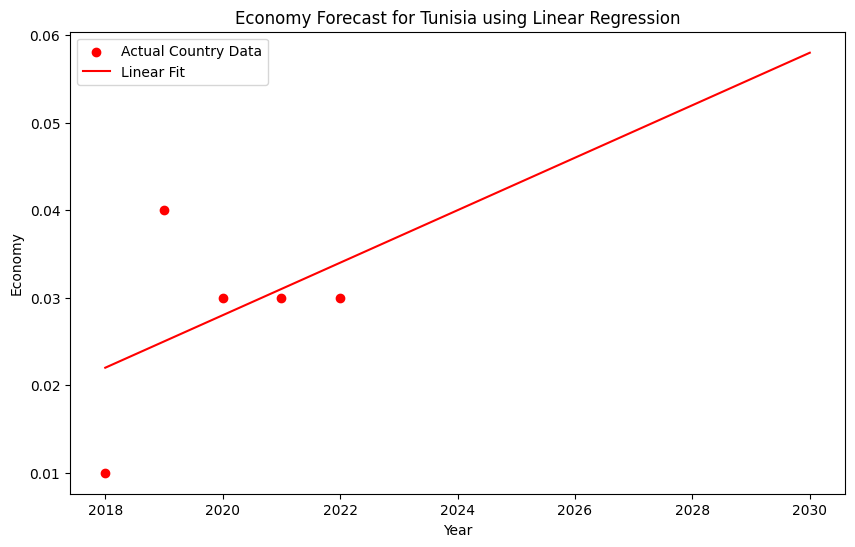

[0.134]
RMSE of Uganda Polynomial Regression model->  0.04029888335921949


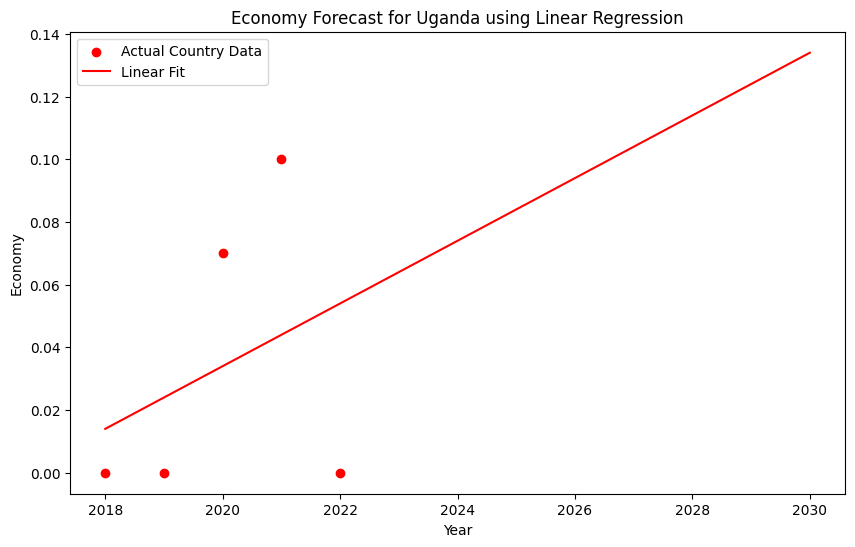

[0.652]
RMSE of Zambia Polynomial Regression model->  0.009380831519646856


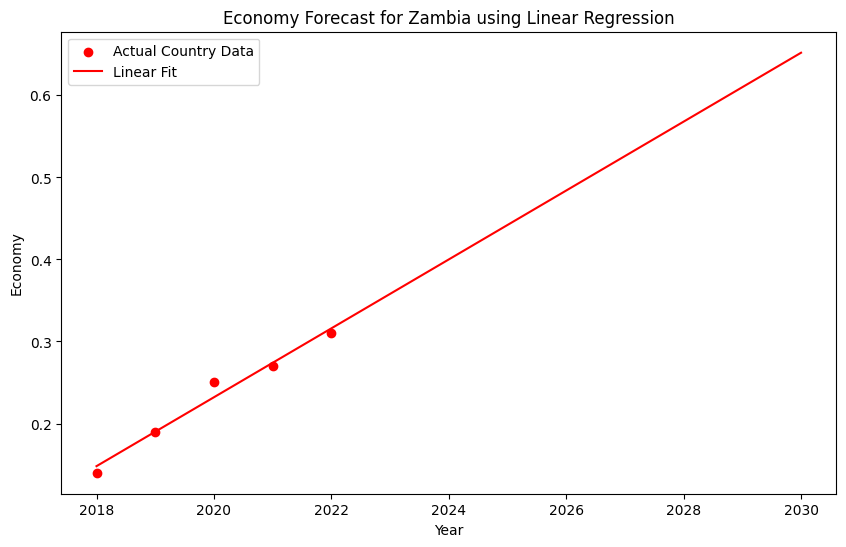

[0.514]
RMSE of Zimbabwe Polynomial Regression model->  0.007483314773547887


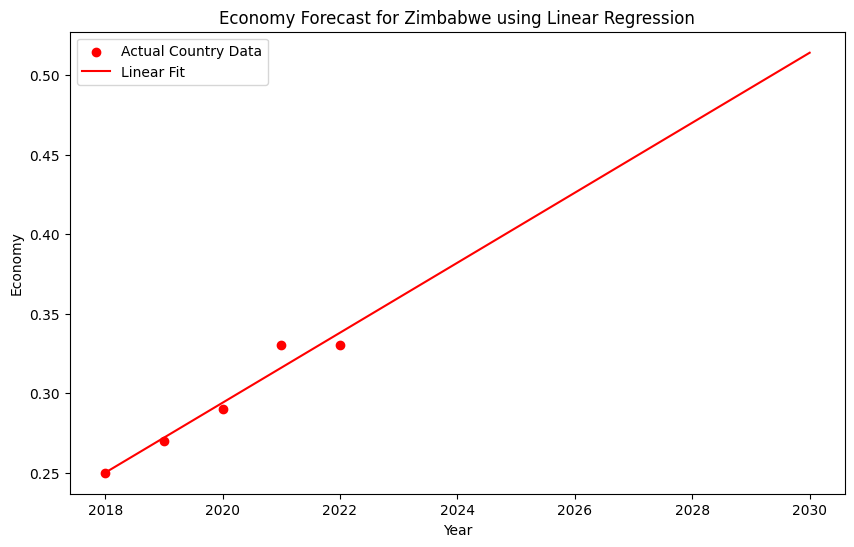

In [144]:
#LR
rmse_results = {}
df_Africa = pd.DataFrame(df_rawInternetUsersAfrica, columns = ['Economy','2018','2019','2020','2021','2022'])
countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde",
    "Cameroon", "Central African Rep.", "Chad", "Congo", "Côte d'Ivoire", "Dem. Rep. Congo",
    "Djibouti", "Egypt", "Eq. Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia",
    "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar",
    "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger",
    "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone",
    "Somaliland", "South Africa", "S. Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda",
    "Zambia", "Zimbabwe"
]
# Data
years = np.array([2018, 2019, 2020, 2021, 2022]).reshape(-1, 1)
for country in countries:
    if country in df_rawInternetUsersAfrica.index:
        country_df = df_rawInternetUsersAfrica.loc[country]
        country_data = get_economy_data_as_list(country)
        model_country = LinearRegression()
        model_country.fit(years, country_data)
        year_2030 = np.array([[2030]])
        forecast_country = model_country.predict(year_2030)
        print(forecast_country)
        rmse = sqrt(mean_squared_error(country_data,model_country.predict(years)))
        print(f'RMSE of {country} Polynomial Regression model-> ',rmse)


        
        # Create a new figure for each country
        plt.figure(figsize=(10, 6))
        
        plt.scatter(years, country_data, color='red', label='Actual Country Data')
        plt.plot(np.append(years, 2030), np.append(model_country.predict(years), forecast_country), color='red', label='Linear Fit')
        plt.xlabel('Year')
        plt.ylabel('Economy')
        plt.title(f'Economy Forecast for {country} using Linear Regression')
        plt.legend()
        
        # Show the plot
        plt.show()
        

        

RMSE of Algeria Polynomial Regression model->  0.0005346011575557211
RMSE of Angola Polynomial Regression model->  0.005345271607873201
RMSE of Benin Polynomial Regression model->  0.012294600465542819
RMSE of Botswana Polynomial Regression model->  0.009086983630886213
RMSE of Burkina Faso Polynomial Regression model->  0.009087632667284086
RMSE of Burundi Polynomial Regression model->  0.0026726492432512265
RMSE of Cabo Verde Polynomial Regression model->  0.00748694948254583
RMSE of Cameroon Polynomial Regression model->  2.0980176617728484e-05
RMSE of Central African Rep. Polynomial Regression model->  0.014432794568255155
RMSE of Chad Polynomial Regression model->  0.0048107114627953225
RMSE of Congo Polynomial Regression model->  0.02886850563504291
RMSE of Côte d'Ivoire Polynomial Regression model->  0.004276394594373022
RMSE of Dem. Rep. Congo Polynomial Regression model->  0.00694909432050298
RMSE of Djibouti Polynomial Regression model->  0.009092366036533465
RMSE of Egypt Po

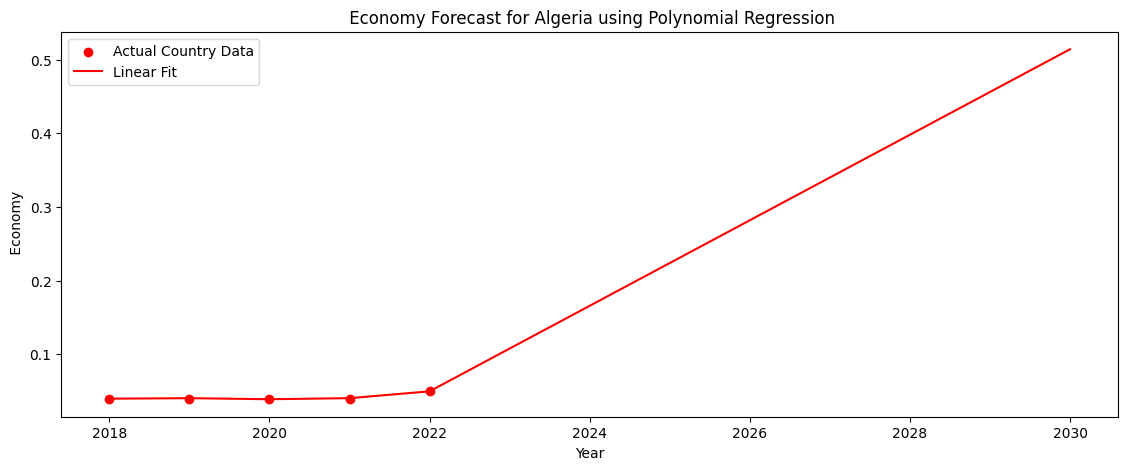

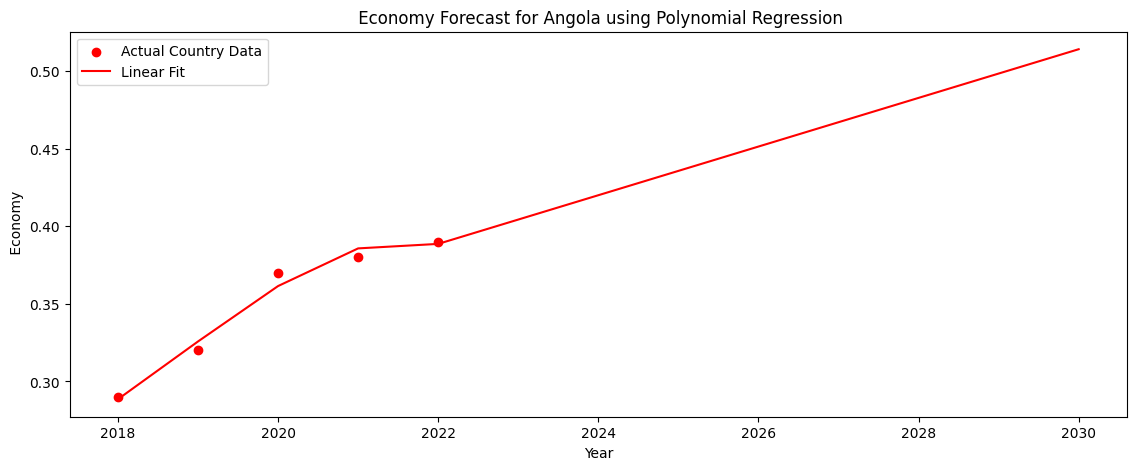

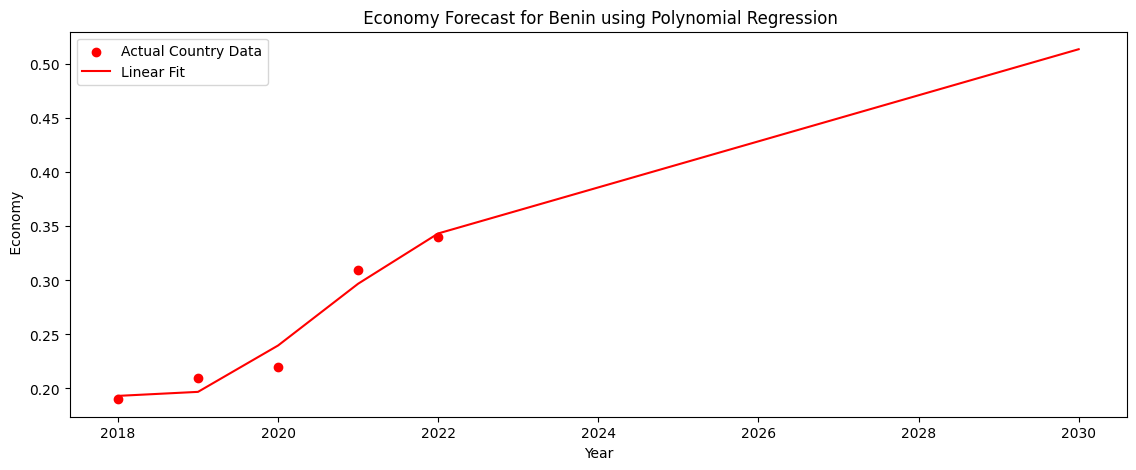

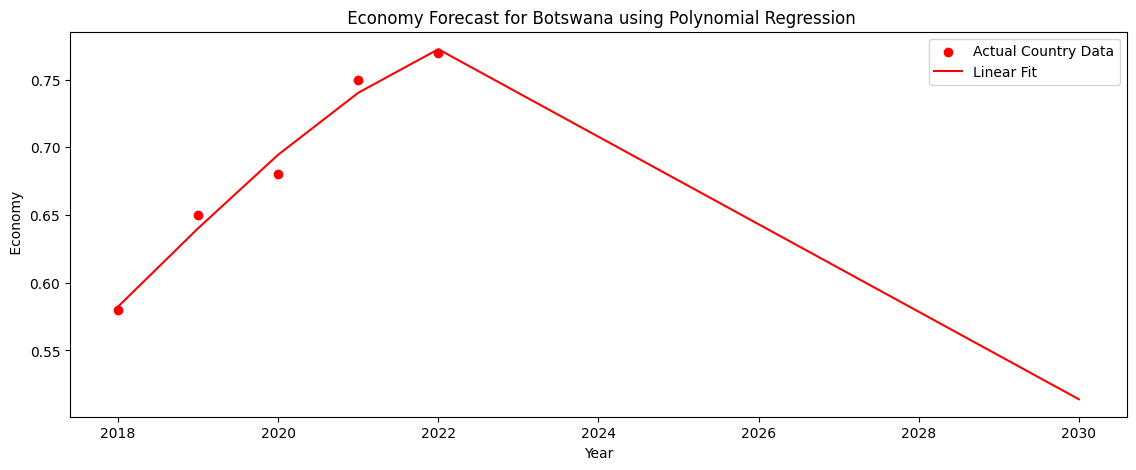

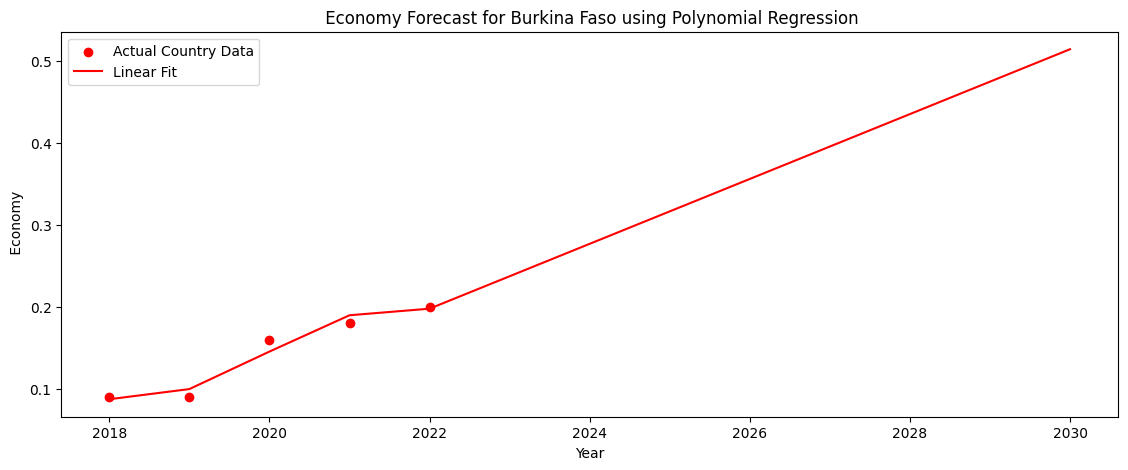

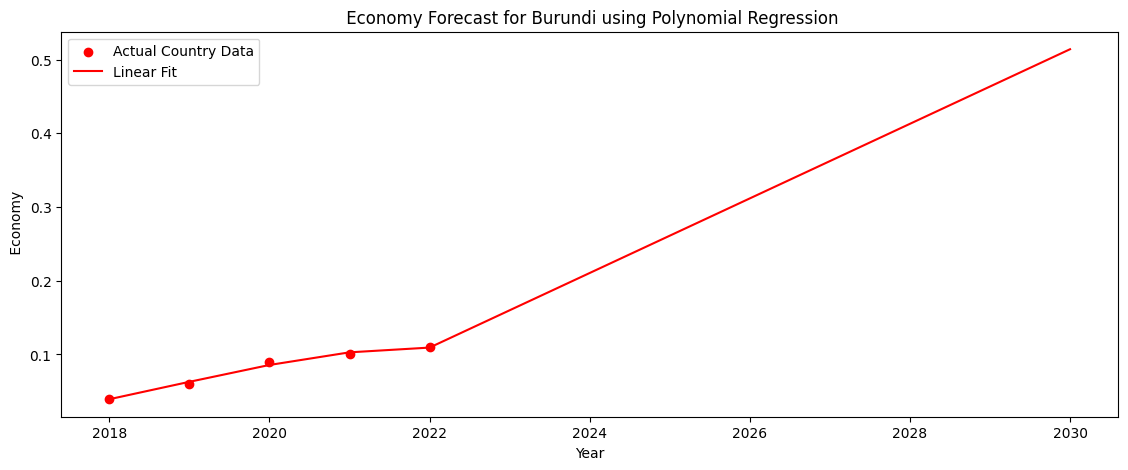

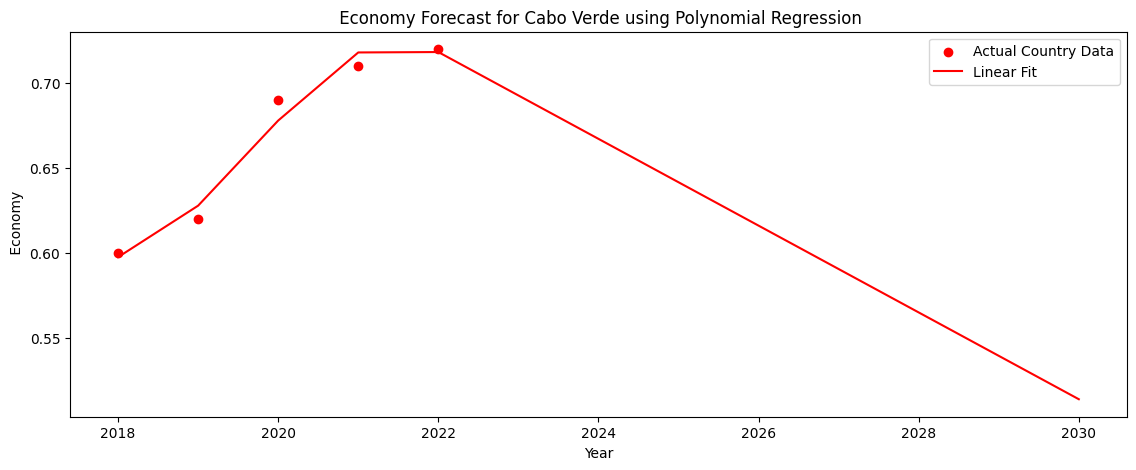

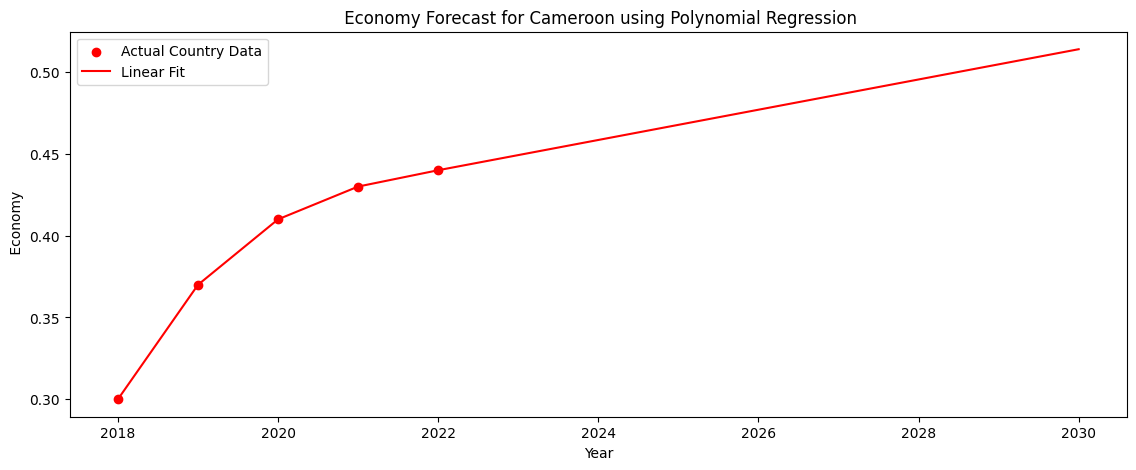

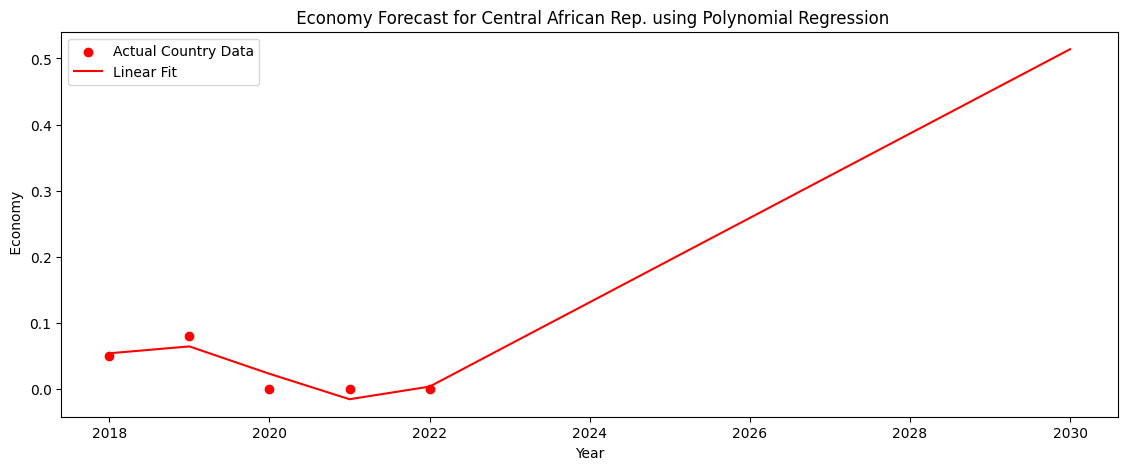

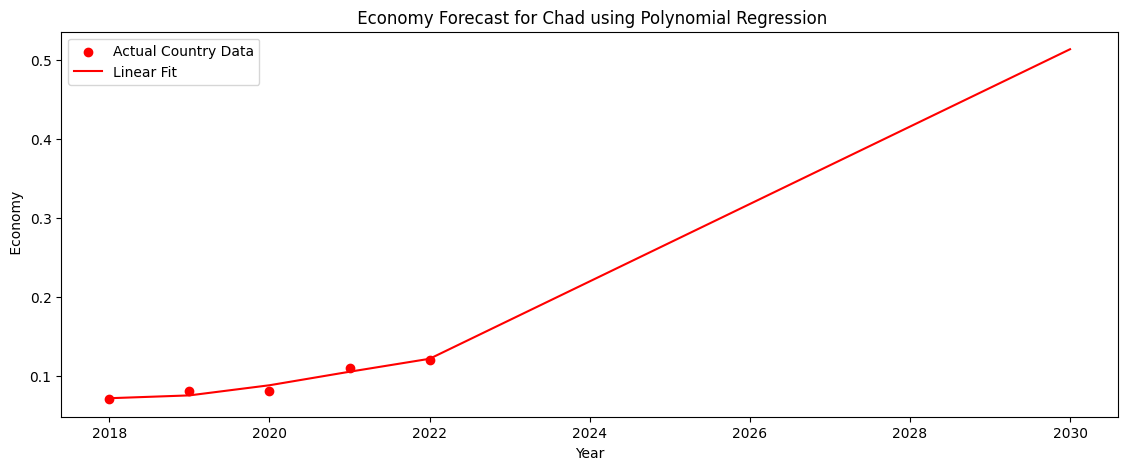

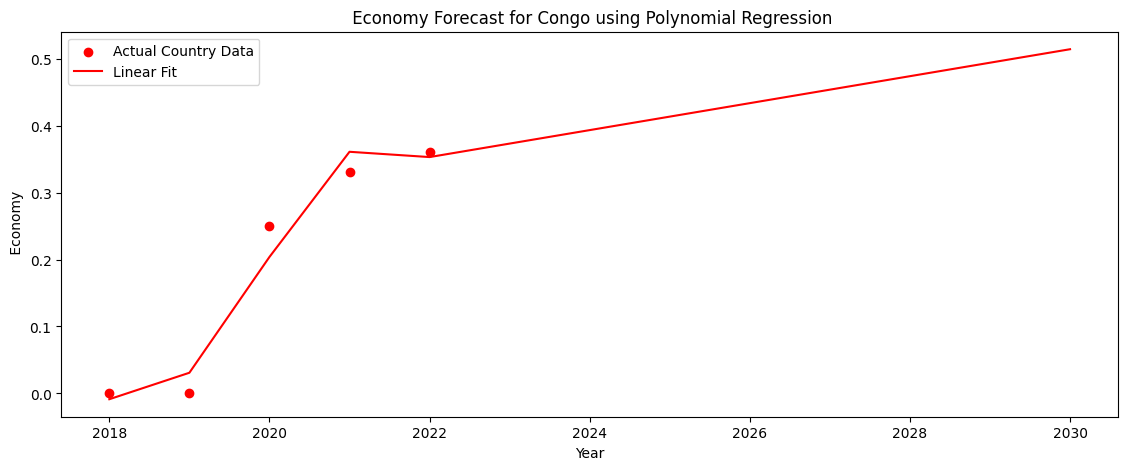

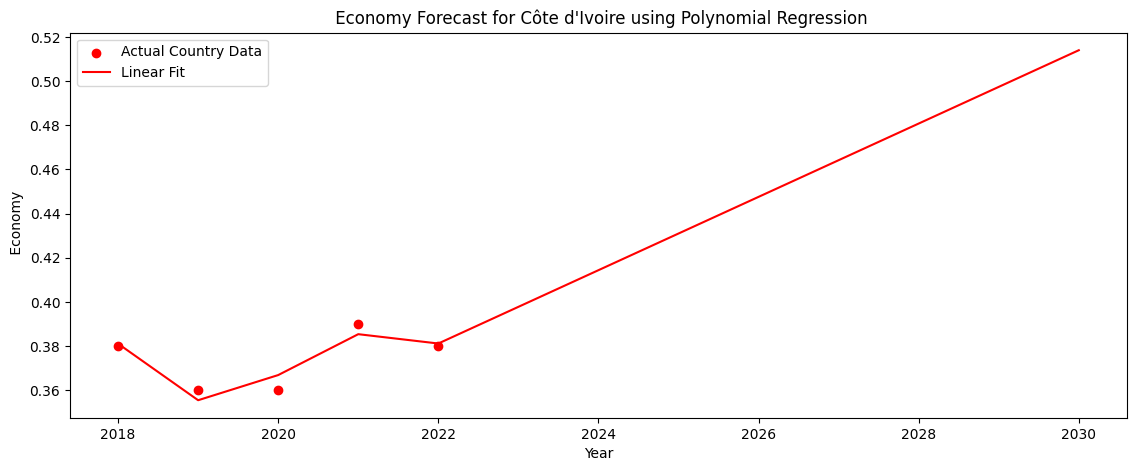

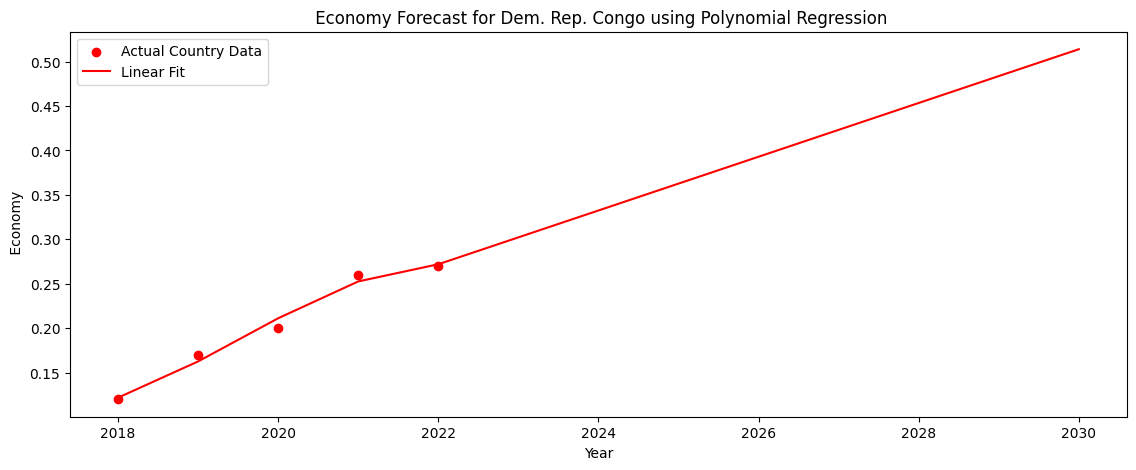

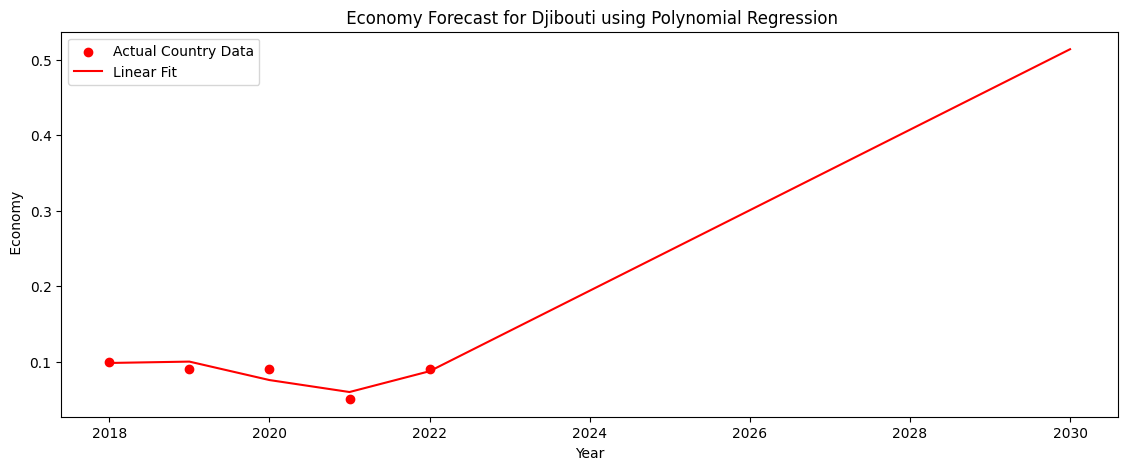

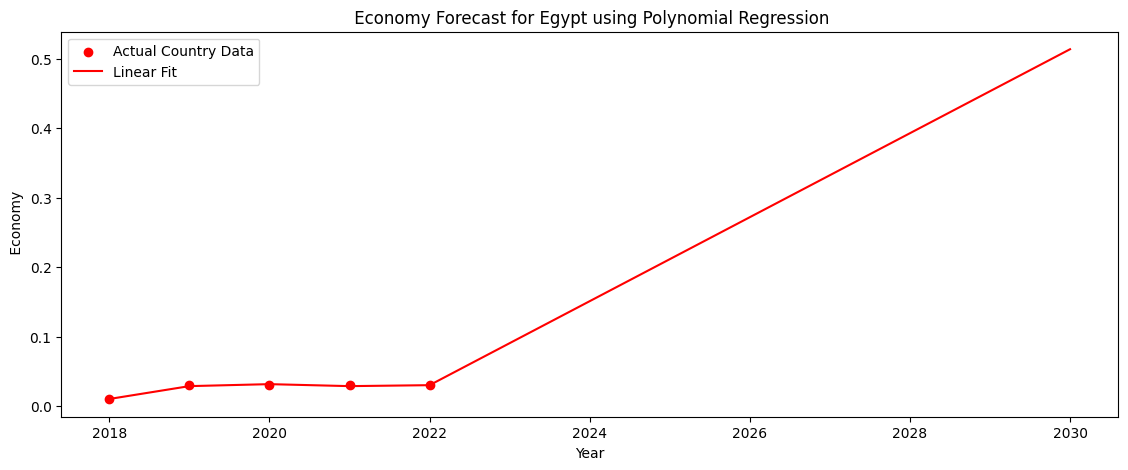

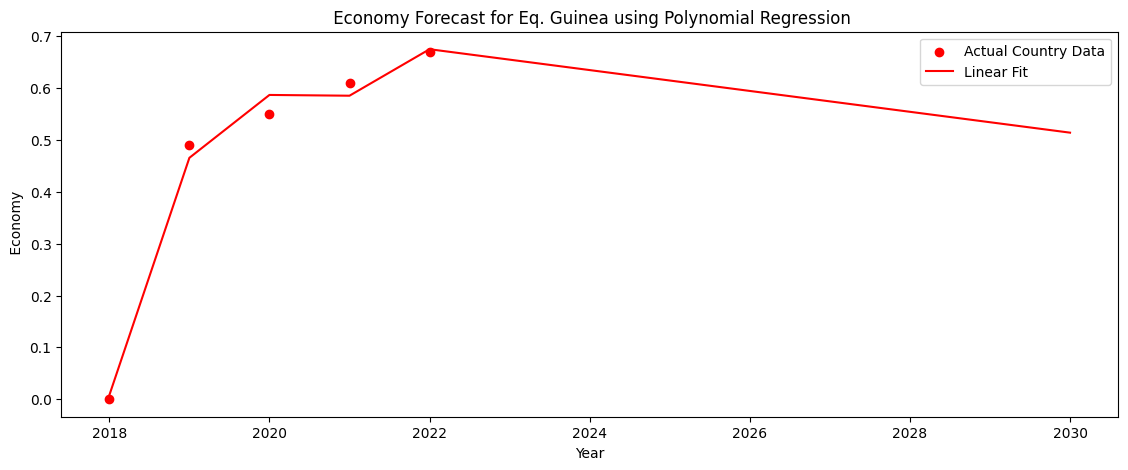

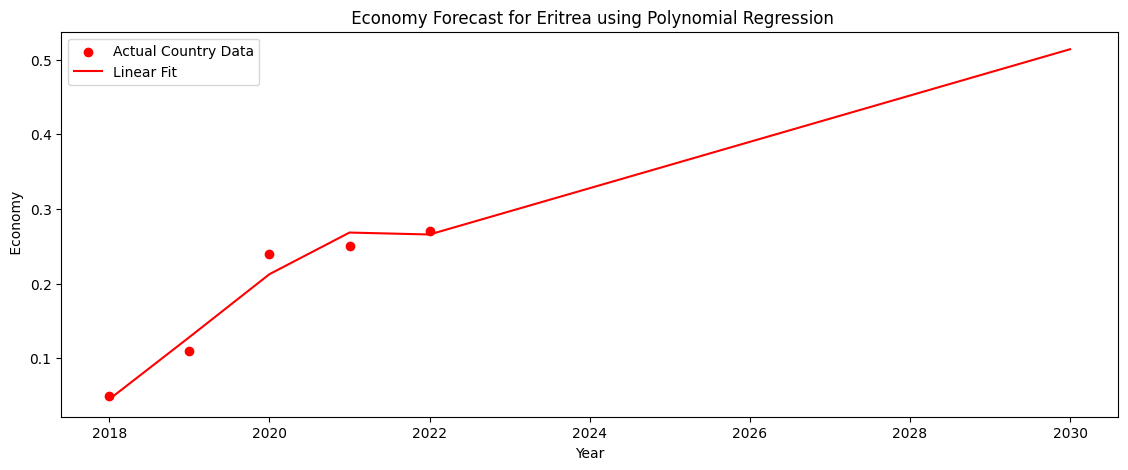

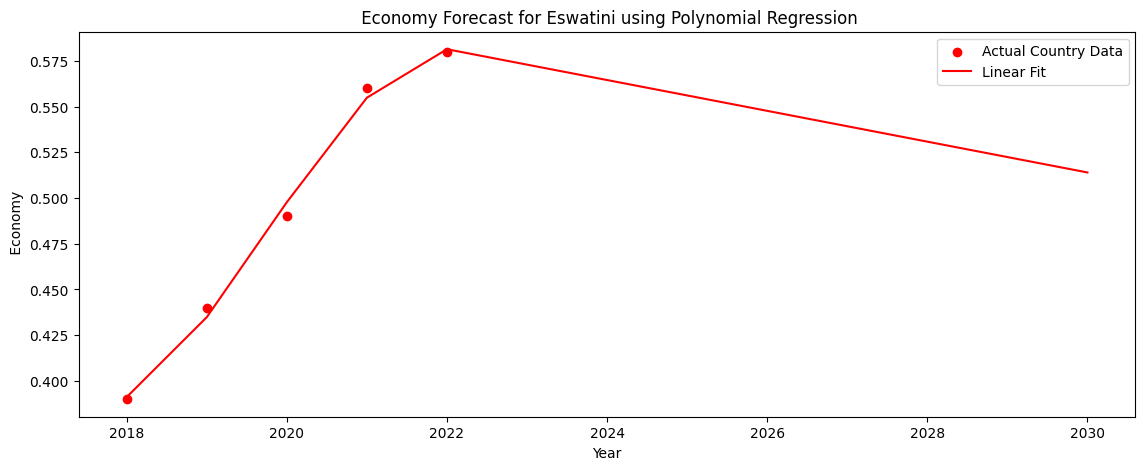

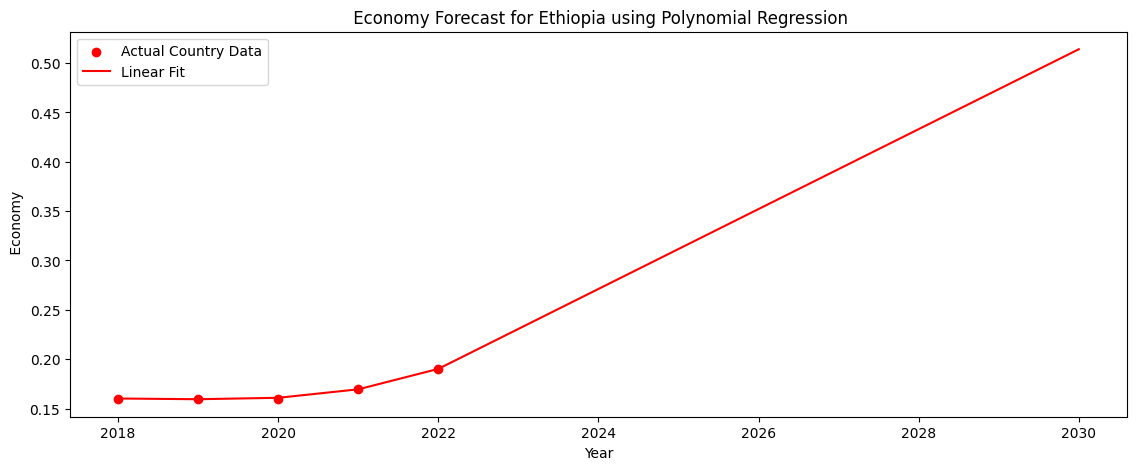

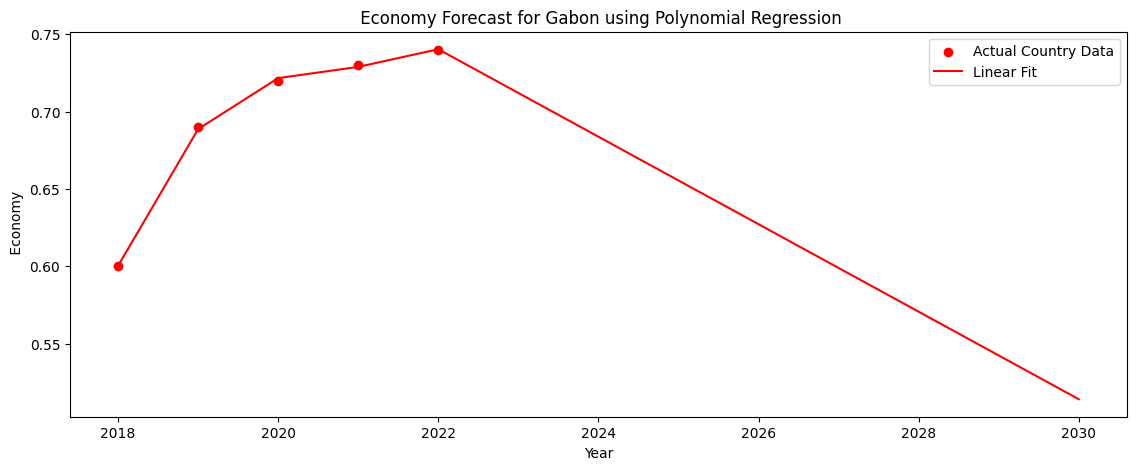

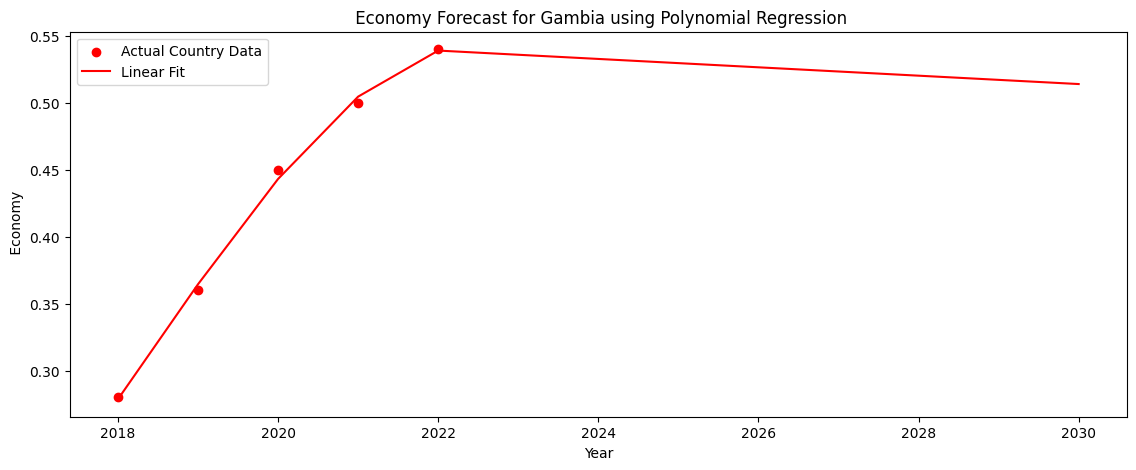

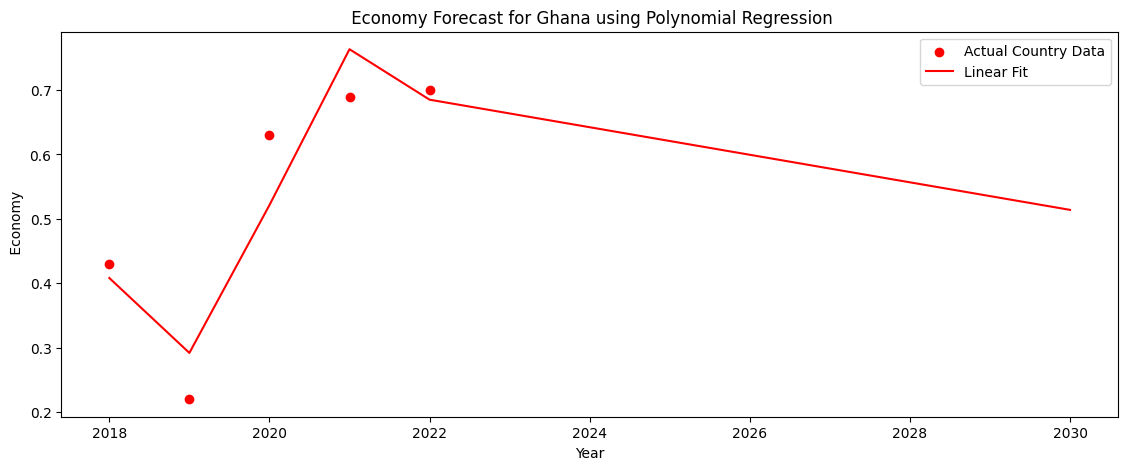

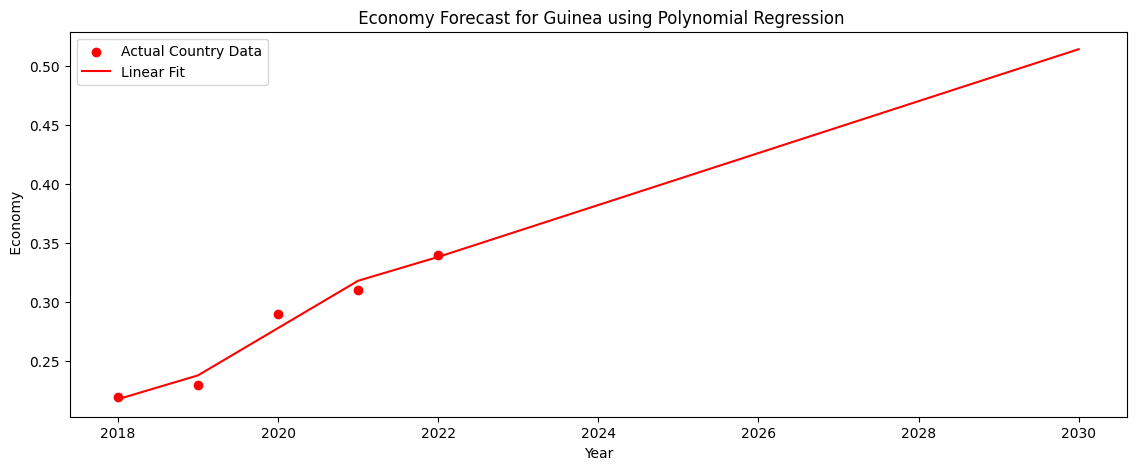

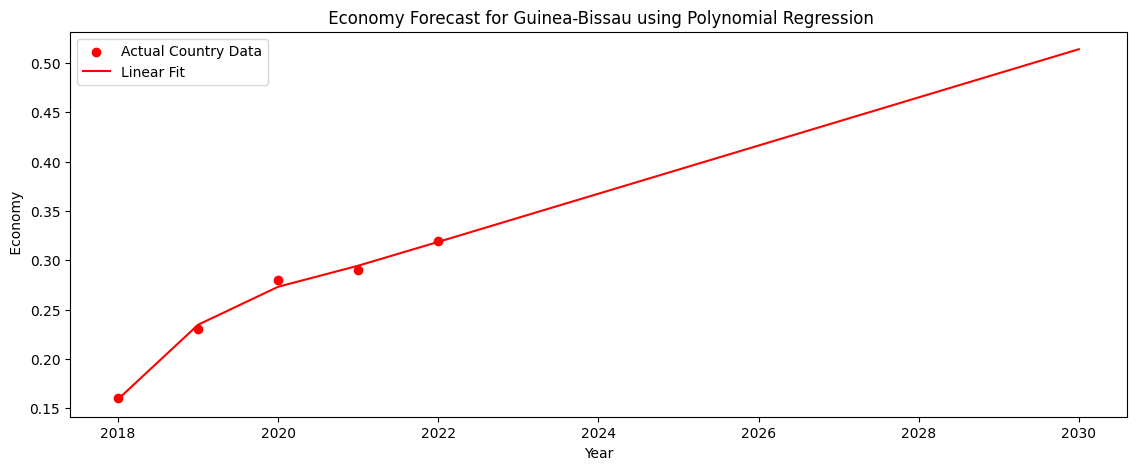

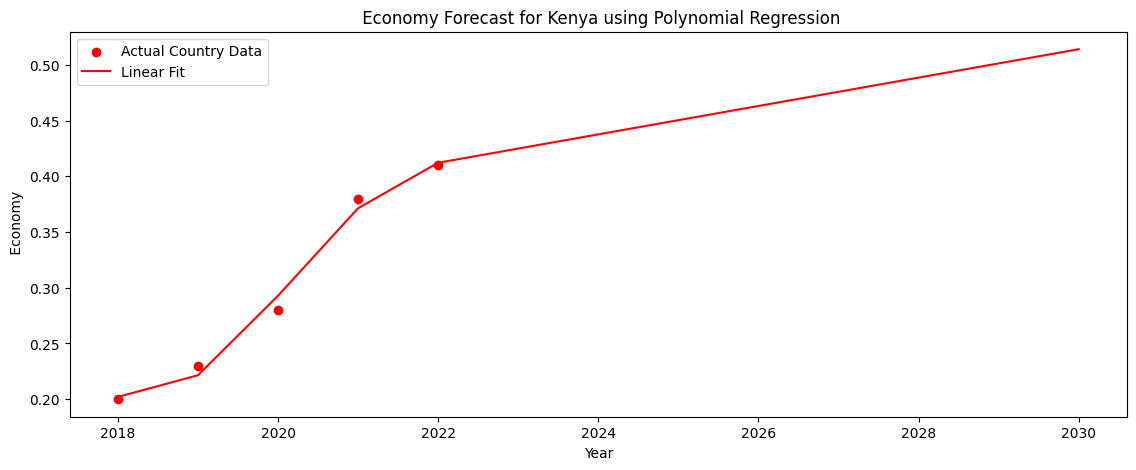

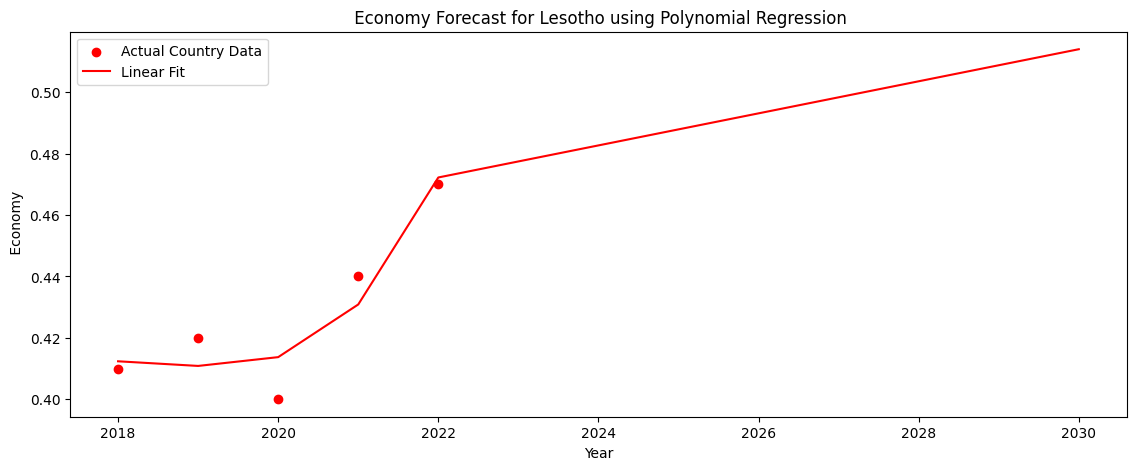

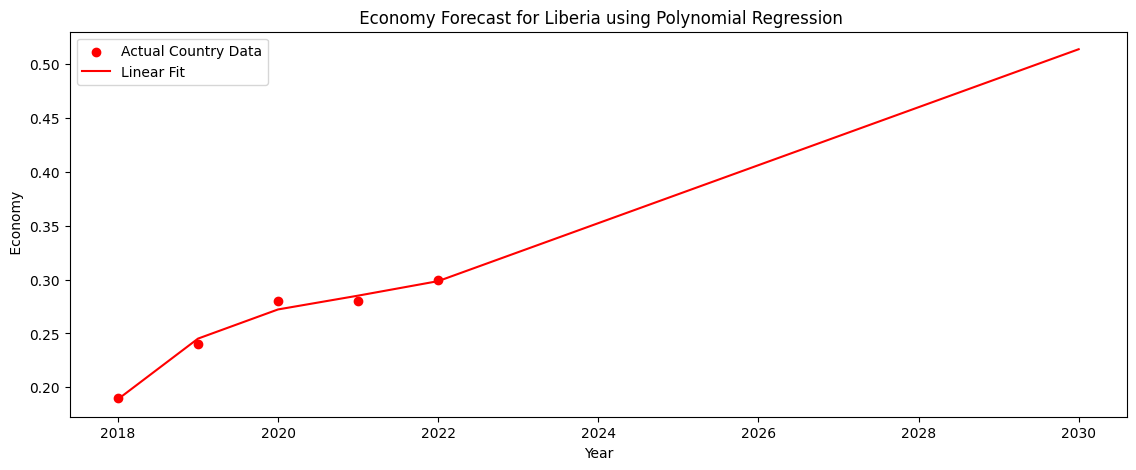

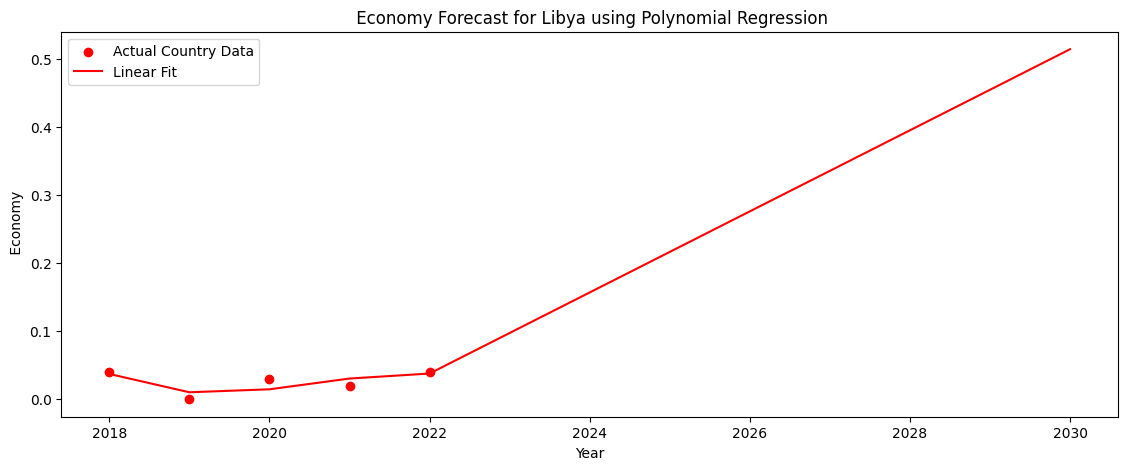

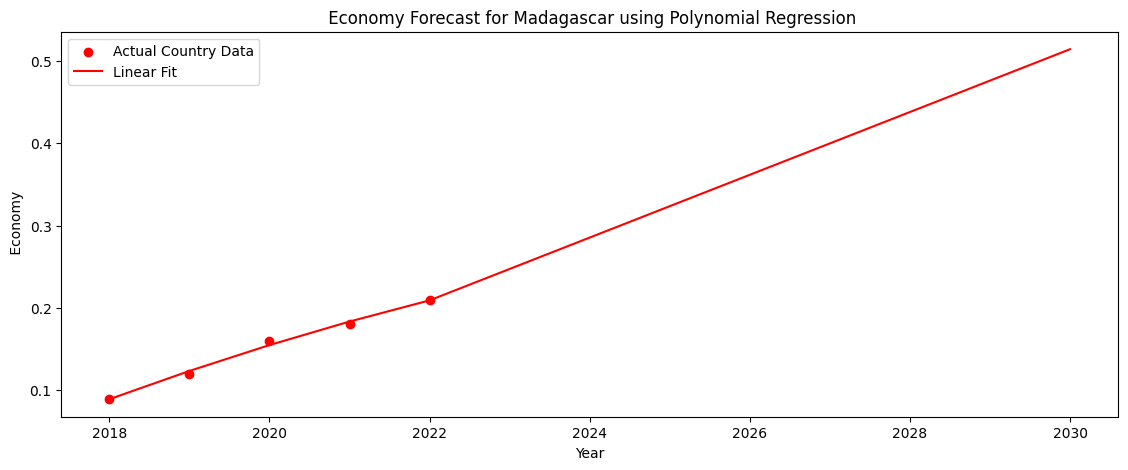

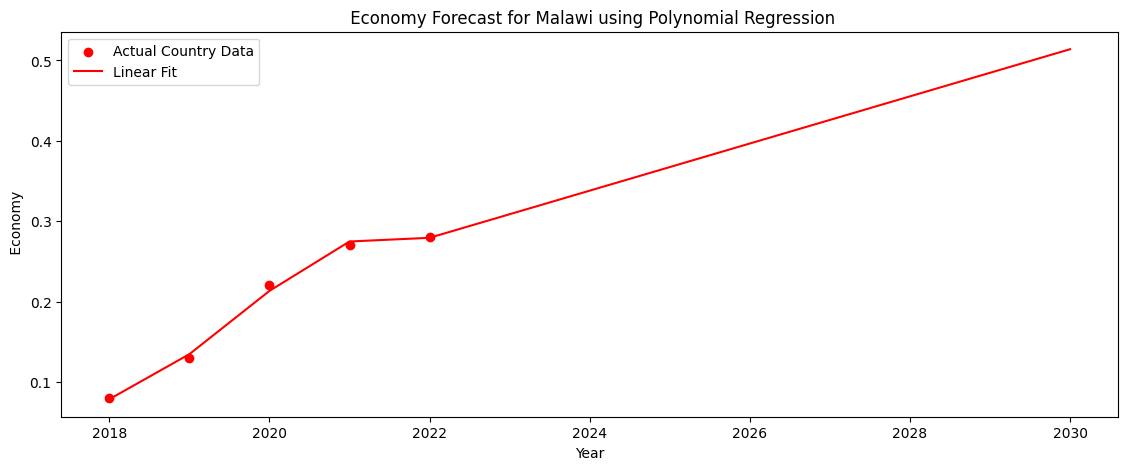

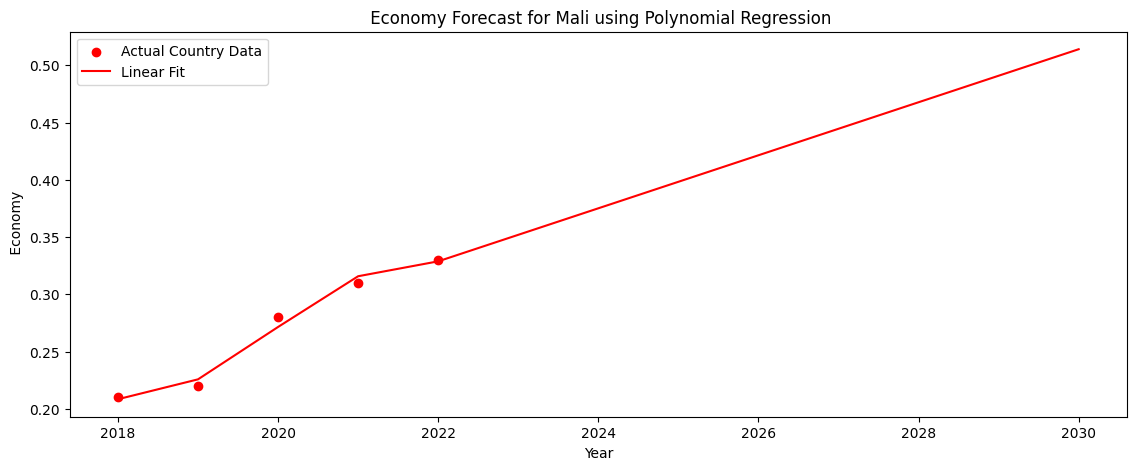

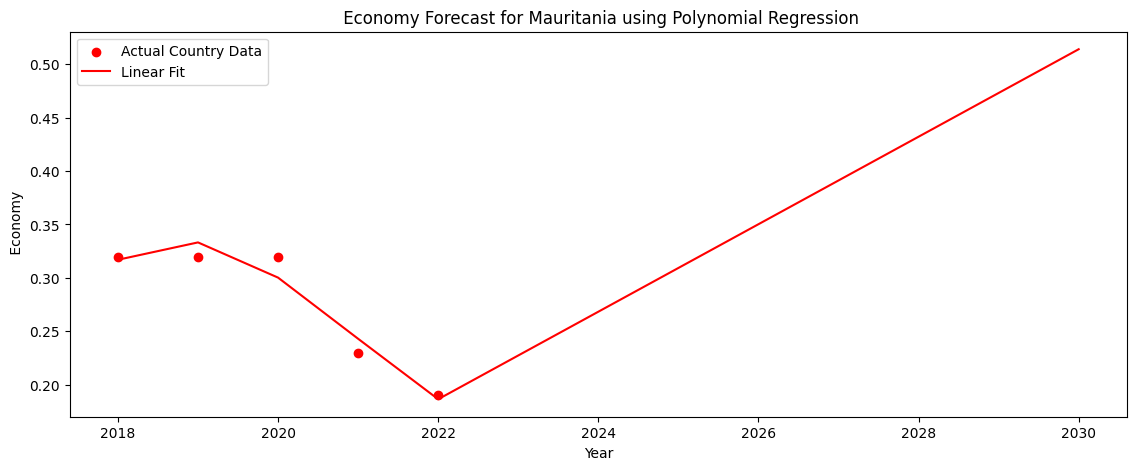

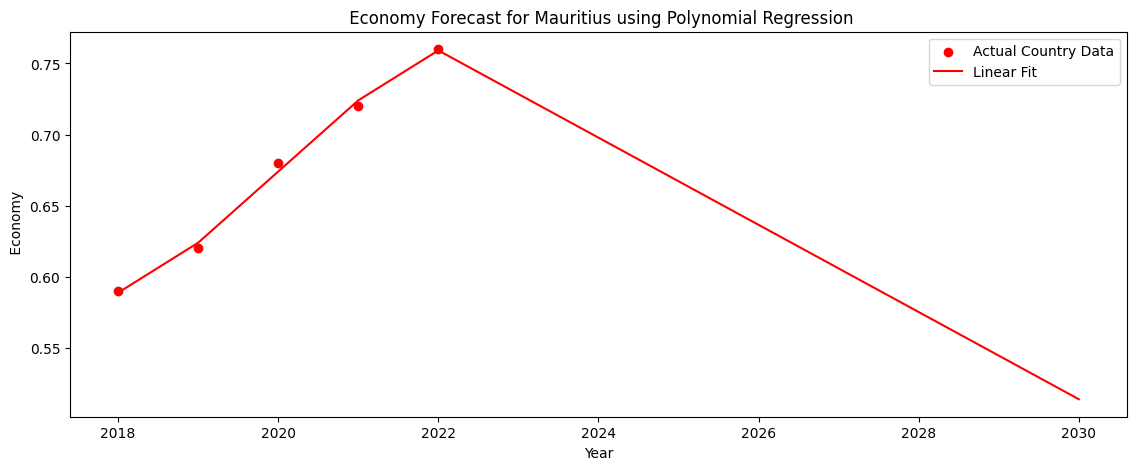

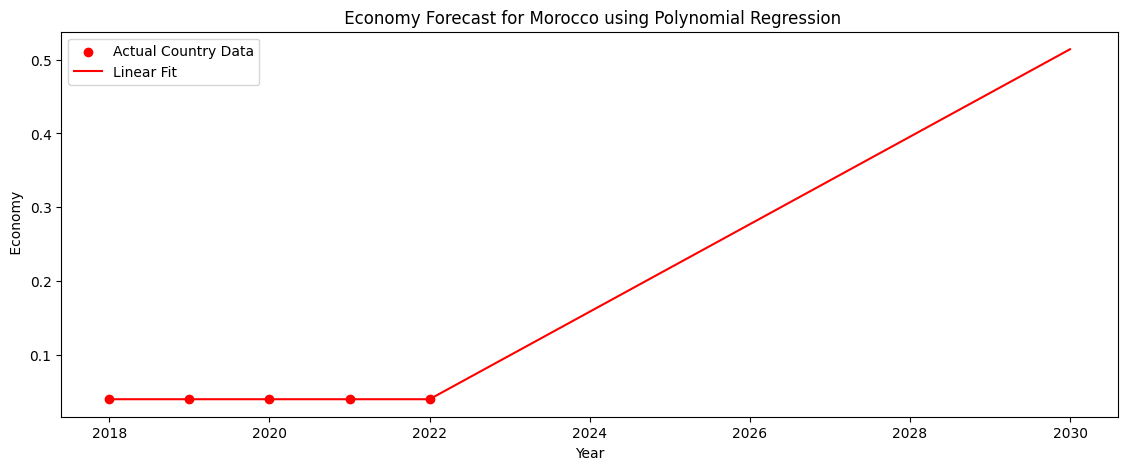

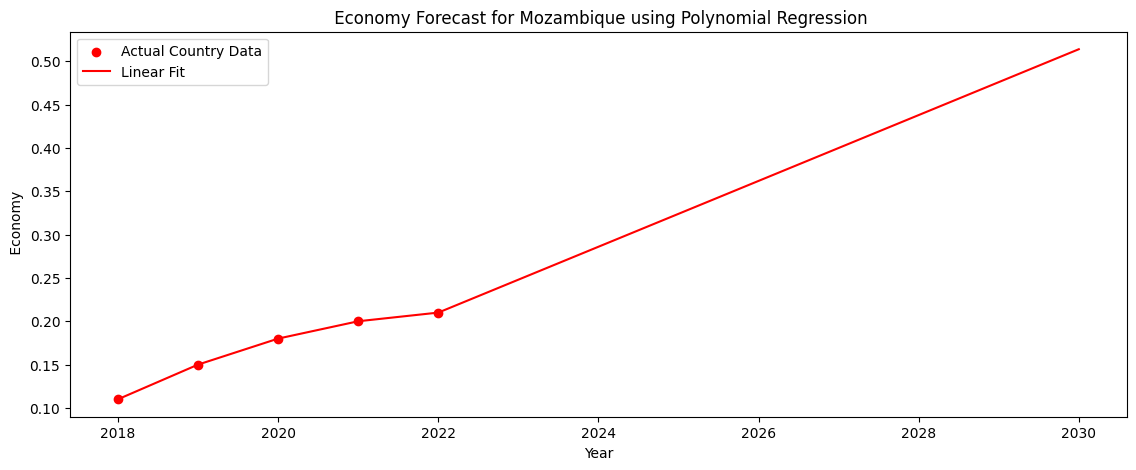

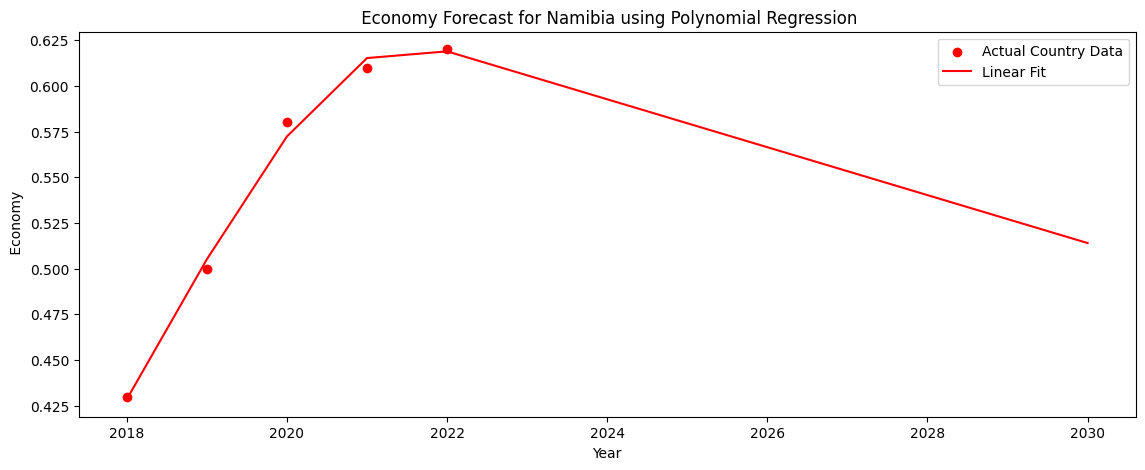

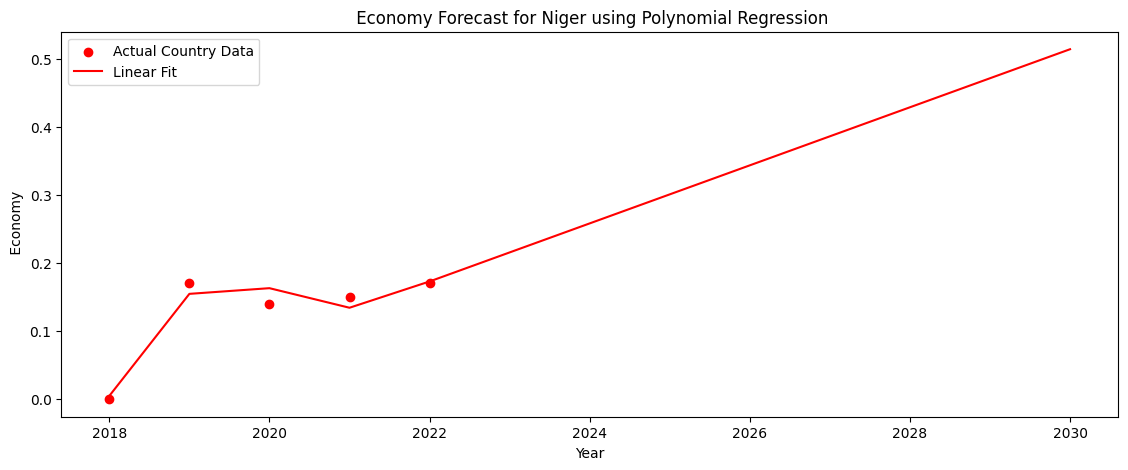

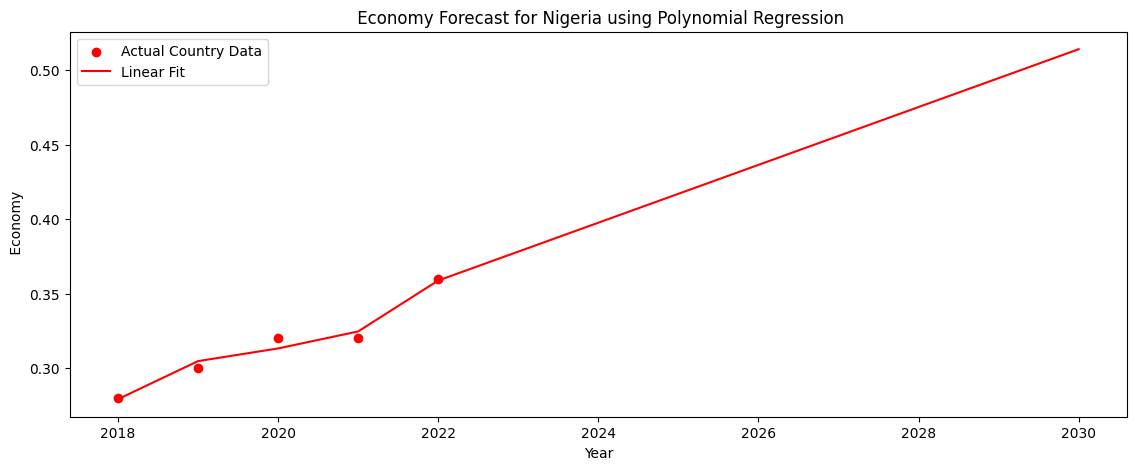

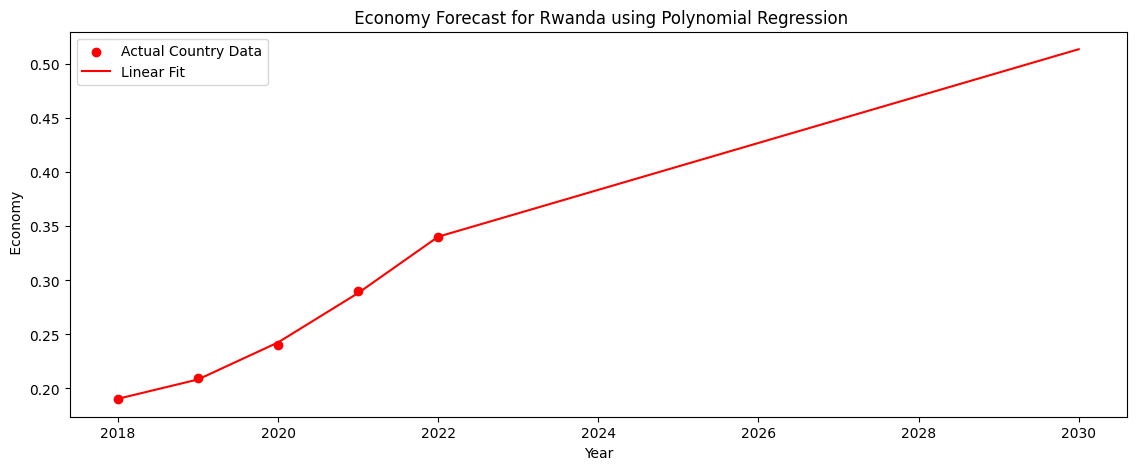

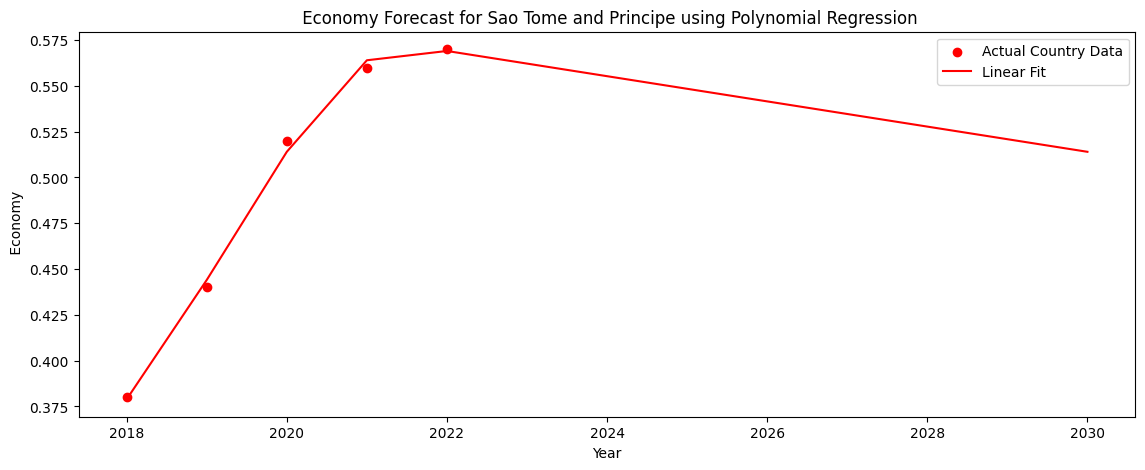

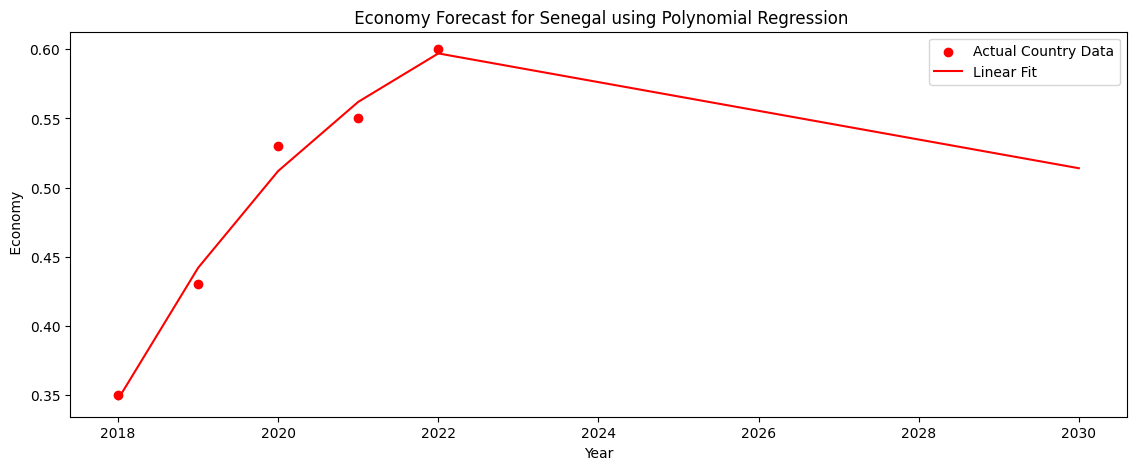

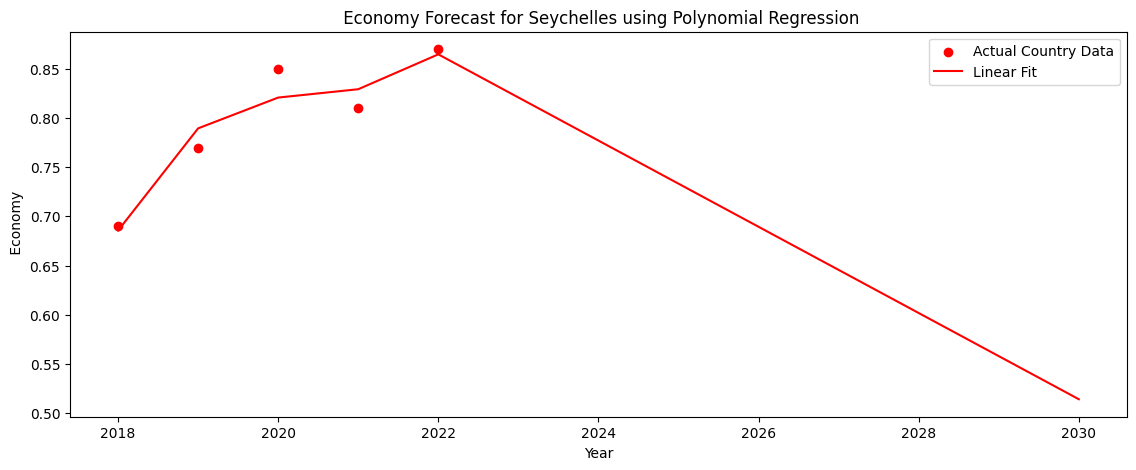

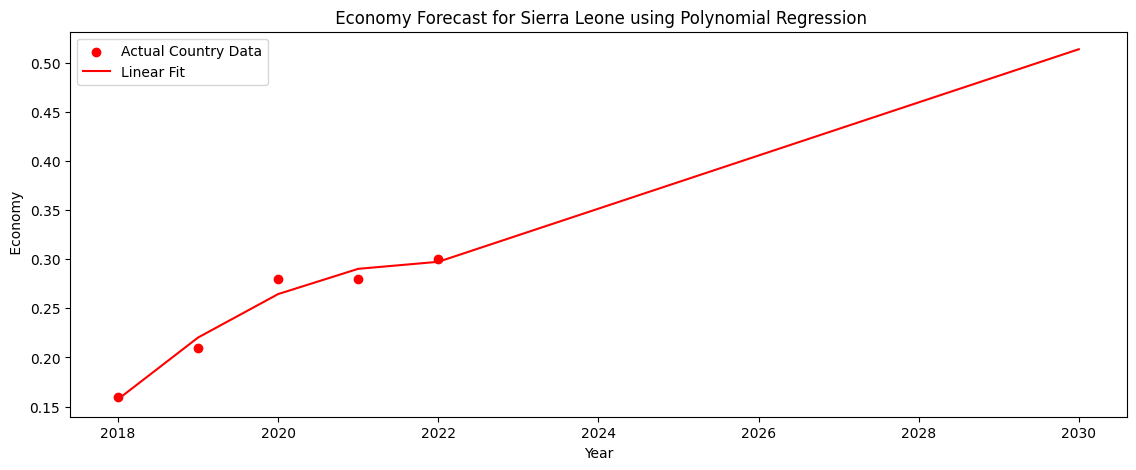

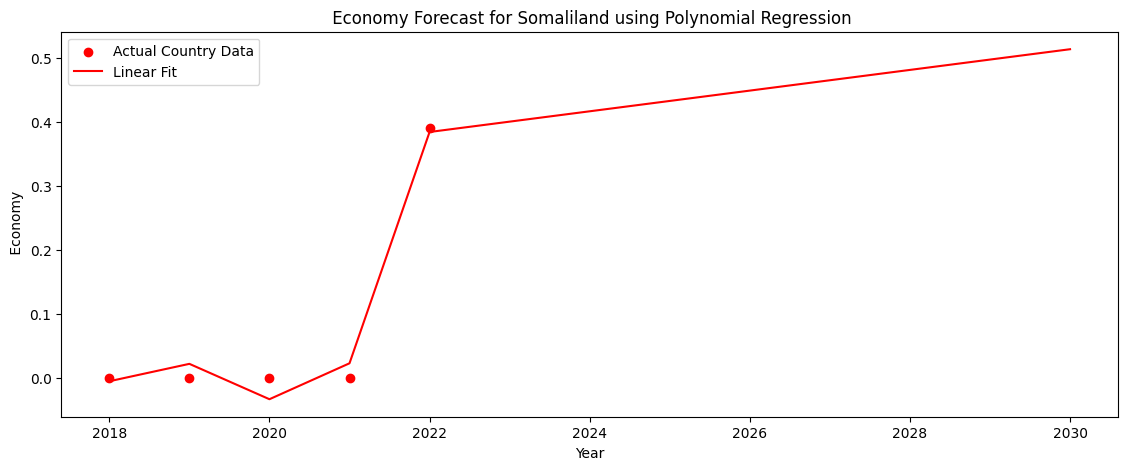

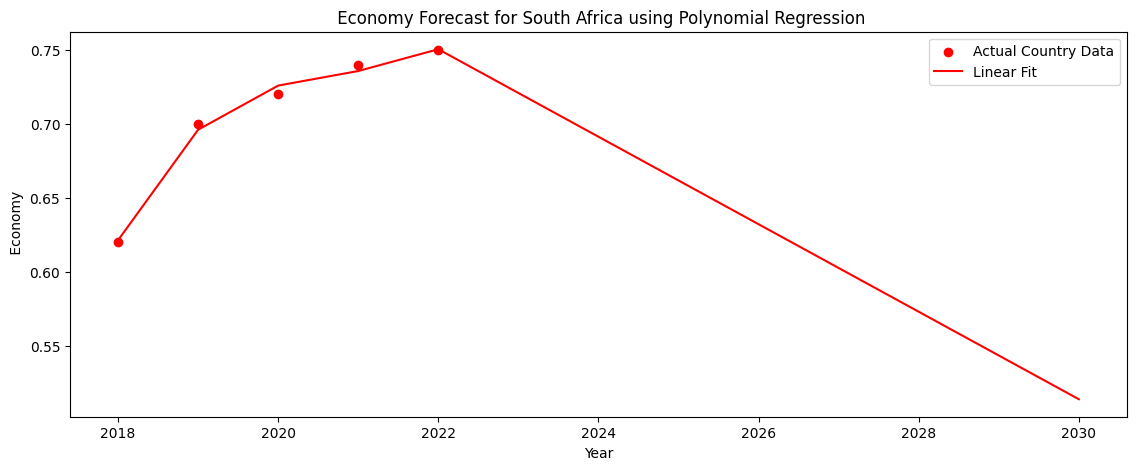

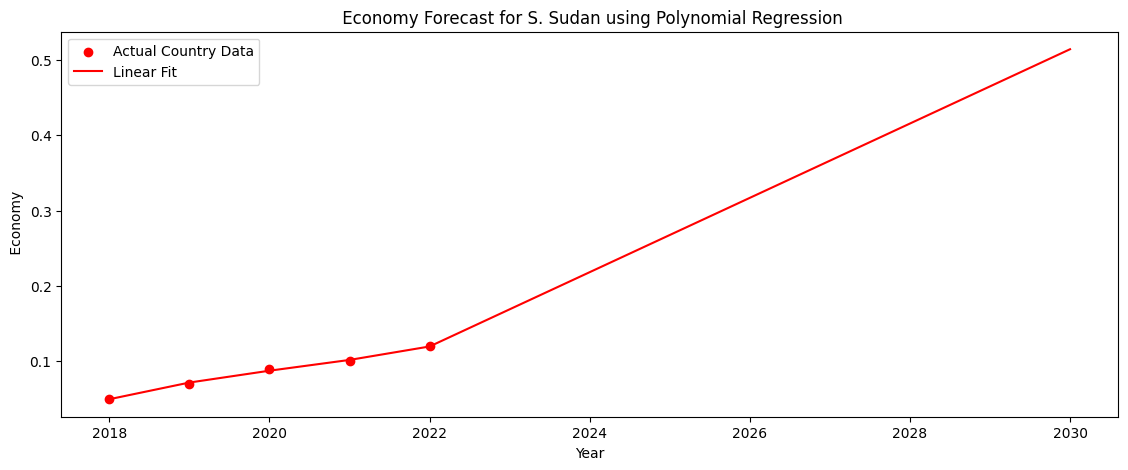

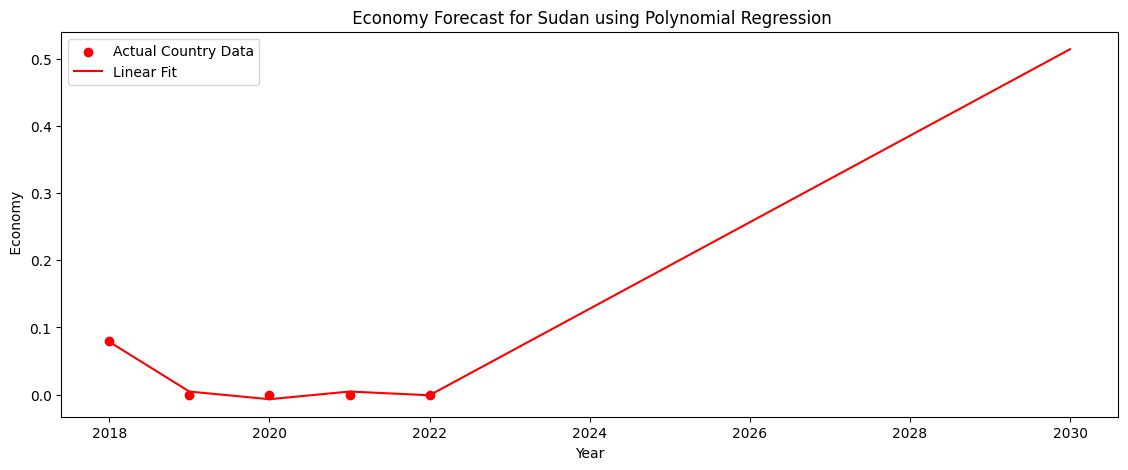

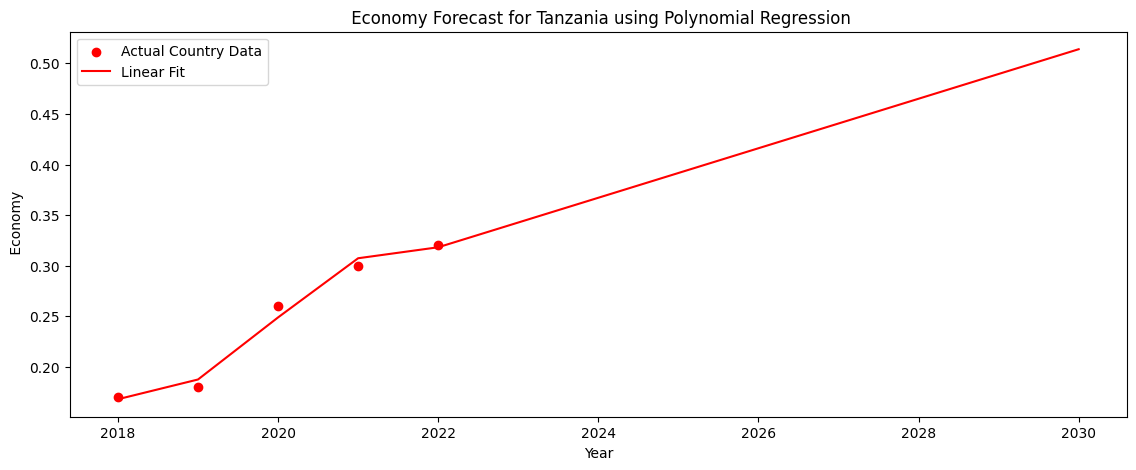

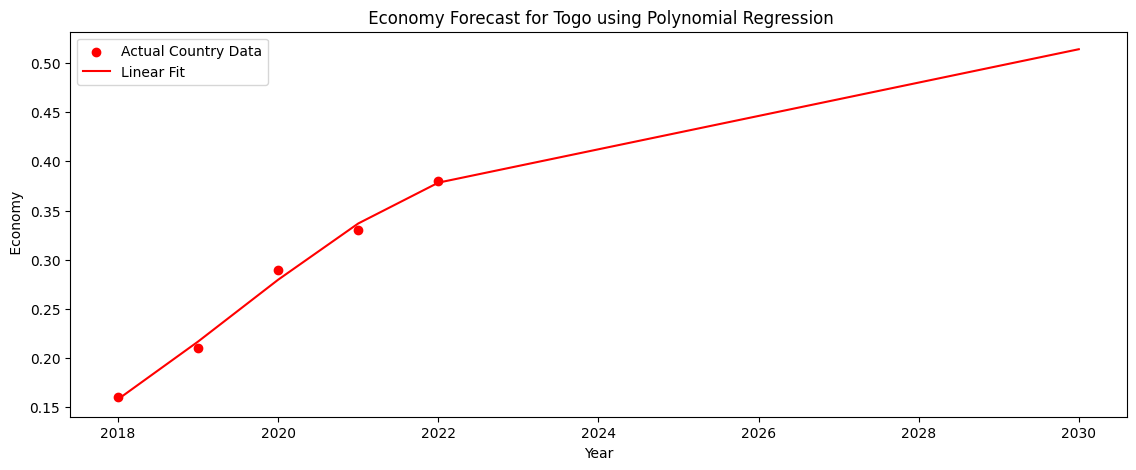

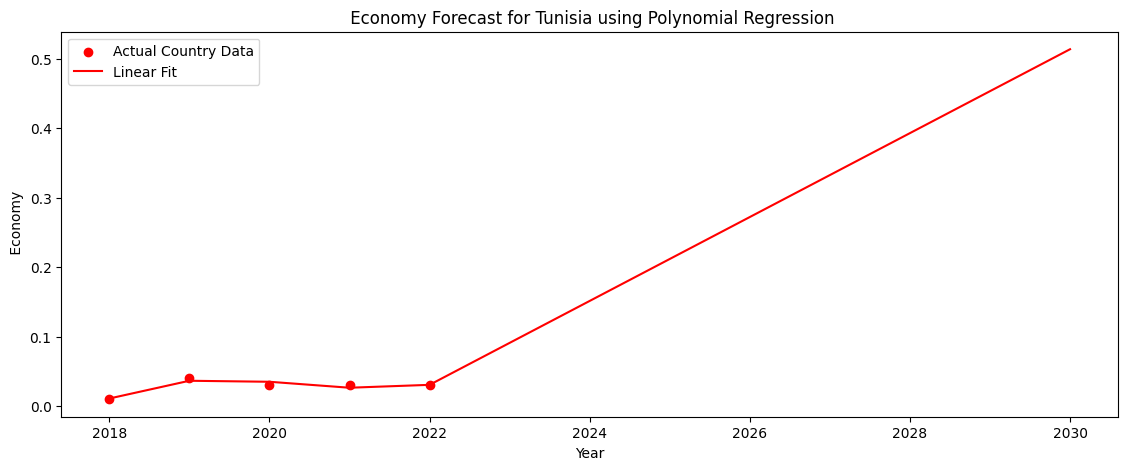

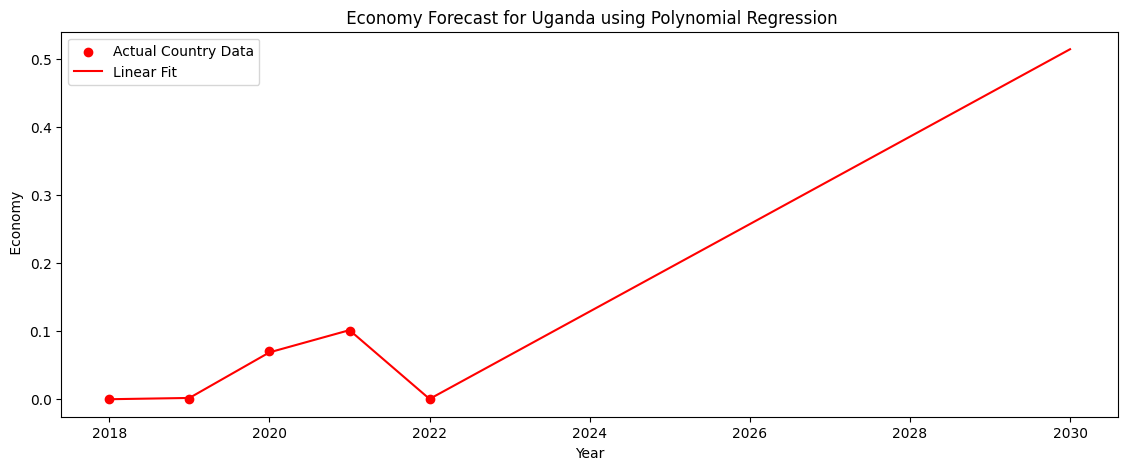

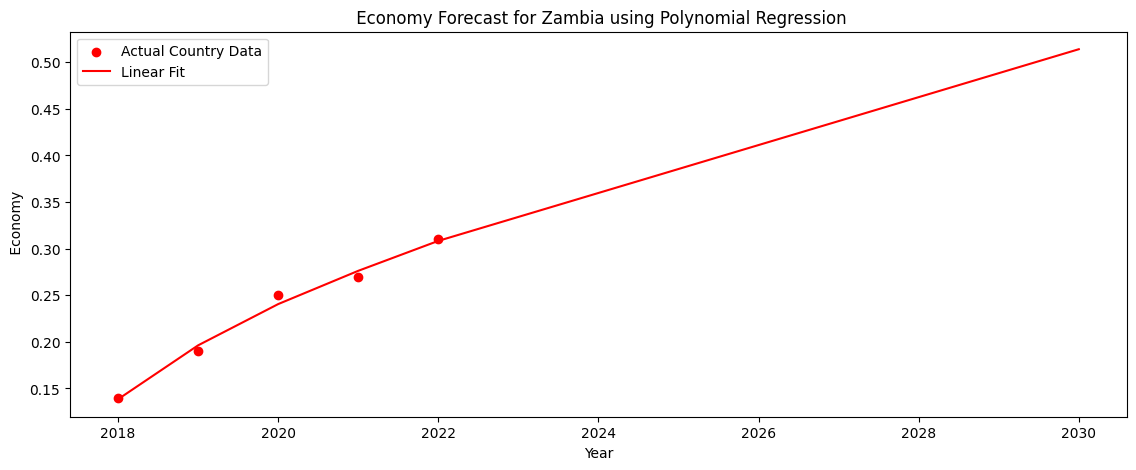

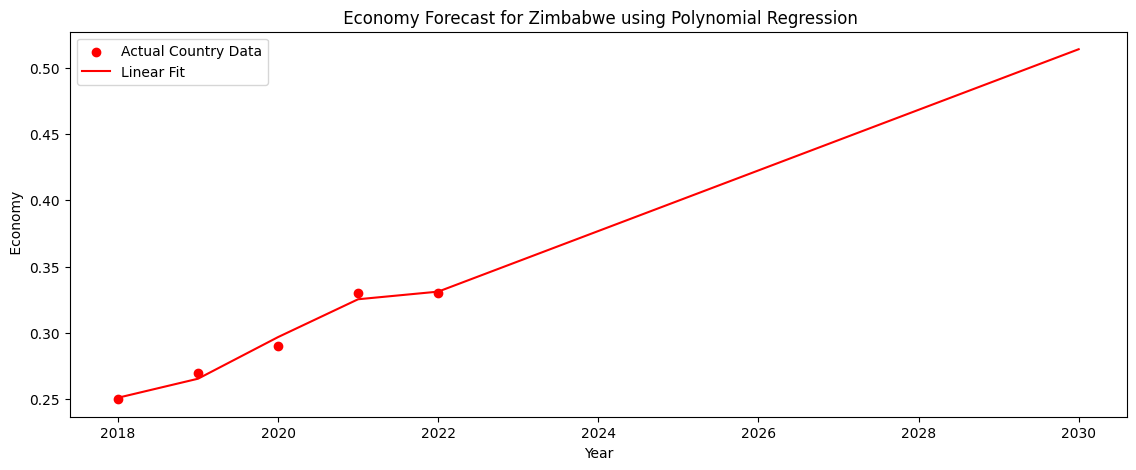

In [145]:
rmse_results = {}
df_Africa = pd.DataFrame(df_rawInternetUsersAfrica, columns = ['Economy','2018','2019','2020','2021','2022'])

# Data
years = np.array([2018, 2019, 2020, 2021, 2022]).reshape(-1, 1)
for country in countries:
    if country in df_rawInternetUsersAfrica.index:
        country_df = df_rawInternetUsersAfrica.loc[country]
        country_data = get_economy_data_as_list(country)
        
        poly_reg = PolynomialFeatures(degree = 3)
        X_poly_country = poly_reg.fit_transform(years, country_data)
        lin_reg_2 = LinearRegression()
        lin_reg_2.fit(X_poly_country, country_data)
        predictions = lin_reg_2.predict(X_poly_country) 
        rmse = sqrt(mean_squared_error(country_data,predictions))
        print(f'RMSE of {country} Polynomial Regression model-> ',rmse)

        # Plotting the data and forecast
        plt.figure(figsize=(30, 5))
        
        # Plot Angola data
        plt.subplot(1, 2, 1)
        plt.scatter(years, country_data, color='red', label='Actual Country Data')

        
        plt.plot(np.append(years, 2030), np.append(predictions, forecast_country), color='red', label='Linear Fit')
        plt.xlabel('Year')
        plt.ylabel(' Economy')
        plt.title(f' Economy Forecast for {country} using Polynomial Regression')
        plt.legend()
        


ARIMA - TIME SERIES FORECASTING

Processing Algeria...
Time Series Data:
2018    0.04
2019    0.04
2020    0.04
2021    0.04
2022    0.05
Name: Algeria, dtype: float64
Forecast for Algeria:
2023-01-01    0.05
2024-01-01    0.05
2025-01-01    0.05
2026-01-01    0.05
2027-01-01    0.05
2028-01-01    0.05
2029-01-01    0.05
2030-01-01    0.05
Freq: AS-JAN, Name: predicted_mean, dtype: float64
Processing Angola...
Time Series Data:
2018    0.29
2019    0.32
2020    0.37
2021    0.38
2022    0.39
Name: Angola, dtype: float64
Forecast for Angola:
2023-01-01    0.398565
2024-01-01    0.405251
2025-01-01    0.410471
2026-01-01    0.414545
2027-01-01    0.417725
2028-01-01    0.420208
2029-01-01    0.422145
2030-01-01    0.423658
Freq: AS-JAN, Name: predicted_mean, dtype: float64
Processing Benin...
Time Series Data:
2018    0.19
2019    0.21
2020    0.22
2021    0.31
2022    0.34
Name: Benin, dtype: float64
Forecast for Benin:
2023-01-01    0.368851
2024-01-01    0.397232
2025-01-01    0.425150
2026-01-01    0.452613
2027-01-

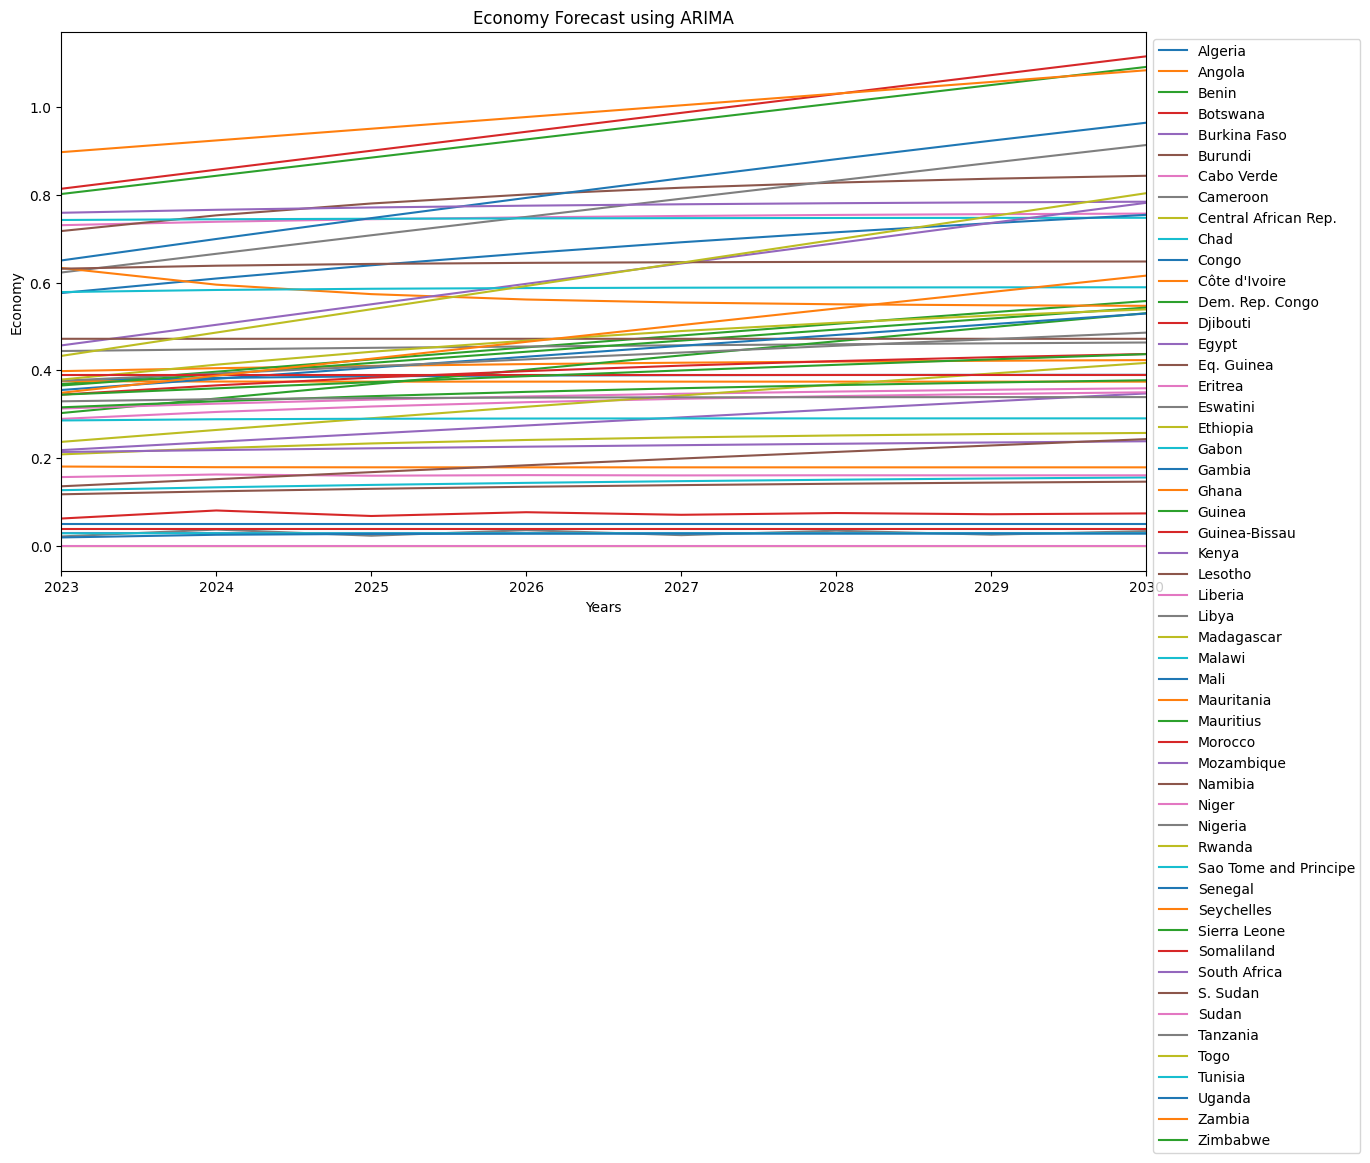

In [146]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Creating the dataframe
data=df_rawInternetUsersAfrica

# Transpose the dataframe to have years as index
df_t = data.T
#print("Transposed Data:\n", df_t)

# Function to fit ARIMA and forecast
def forecast_arima(time_series, steps):
    model = ARIMA(time_series, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecasting for each country
forecast_years = 2030 - 2022
forecast_results = {}

for country in df_t.columns:
    print(f"Processing {country}...")
    time_series = df_t[country].astype(float)
    print(f"Time Series Data:\n{time_series}")
    forecast = forecast_arima(time_series, steps=forecast_years)
    print(f"Forecast for {country}:\n{forecast}")
    forecast_results[country] = forecast

# Converting the forecast results to a dataframe
forecast_df = pd.DataFrame(forecast_results, index=range(2023, 2031))
#print("\nForecasted Data for 2030:\n", forecast_df)

print('----------------------')
forecast_df = pd.DataFrame(forecast_results)

forecast_df

forecast_df.plot(figsize=(14, 7))
plt.title('Economy Forecast using ARIMA')
plt.xlabel('Years')
plt.ylabel('Economy')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()